In [43]:
import json
with open("wikimedia.json" , 'r') as file:
        previous_json = json.load(file)

In [4]:
############# ESTE ES PARA TRANSCRIPCIONES ###############

from pyWikiCommons import pyWikiCommons
import requests
import os
from google.cloud import storage
from datetime import timedelta
import os
from tqdm import tqdm


# Esto solo sirve para .webm
def change_format(file_name):
    import subprocess
    changed_filename = os.rename(file_name, "temp.webm")
    subprocess.run(f'ffmpeg -i "temp.webm" {file_name}.mp3',shell=True)
    
def download_file(url,file_name):
    headers = {'User-Agent': 'CoolBot/0.0 (https://example.org/coolbot/; coolbot@example.org)'}
    with requests.get(url, stream=True, headers=headers) as r:
        r.raise_for_status()
        with open(file_name, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)
    return file_name

def split_with_last_dot(string):
    for character in range(len(string)-1,0,-1):
        if string[character]==".":
            left = string[:character]
            right = string[character+1:]
            return [left,right]

def upload_file_gcp(file_name, file_type):    
    # Initiate names
    project_id = 'the-peoples-speech' # Your Project ID
    bucket_name = 'wikimedia_commons' # Name of bucket
    bucket_file = f'{file_type}/{file_name}' # Location of the file on Bucket
    local_file = f'{file_name}' # Location of downloaded file on your PC

    # Set Credential
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "the-peoples-speech-ee8163e65ace.json"
    client = storage.Client(project_id)
    bucket = client.get_bucket(bucket_name)
    blob = bucket.blob(bucket_file)
    blob.upload_from_filename(local_file)
    signed_url = blob.generate_signed_url(
                    version="v4",
                    expiration=timedelta(seconds=60),
                    method="GET")
    

    
counter = 0
database = {}
for i in tqdm(range(len(previous_json))):
    link = previous_json[i]["page"]["title"]
    dots = 0
    try:
        if len(link.split("."))>2:
            left,_ = split_with_last_dot(link)
            true_link, _ = split_with_last_dot(left)


            with open(link, 'w') as f:
                f.write(previous_json[i]["text"])
            upload_file_gcp(link, "transcription")
            os.remove(link)            

            if true_link in database.keys():
                database[true_link].append(link)
            else:
                database[true_link] = [link]
                try:
                    f = open("uploaded.txt", "a")
                    f.write(f"{i},{true_link}\n")
                    f.close()
                except:
                    f = open("error.txt", "a")
                    f.write(f"{i},{true_link}\n")
                    f.close()
        else:
            print(i)
    except:
        print(i)



 14%|█▎        | 2345/17152 [33:46<3:21:17,  1.23it/s] 

2345


 14%|█▍        | 2401/17152 [34:29<3:13:17,  1.27it/s]

2401


 16%|█▌        | 2690/17152 [38:44<3:10:43,  1.26it/s] 

2690


 21%|██        | 3562/17152 [51:16<2:55:25,  1.29it/s] 

3562


 26%|██▌       | 4428/17152 [1:04:09<2:50:18,  1.25it/s]

4428


 28%|██▊       | 4826/17152 [1:10:27<2:45:19,  1.24it/s]

4826


 35%|███▍      | 5961/17152 [1:27:19<2:34:35,  1.21it/s]

5961


 35%|███▍      | 5970/17152 [1:27:27<2:58:42,  1.04it/s]

5970


 38%|███▊      | 6473/17152 [1:34:54<2:23:50,  1.24it/s]

6473


 42%|████▏     | 7244/17152 [1:45:49<2:14:06,  1.23it/s]

7244


 45%|████▌     | 7759/17152 [1:53:12<2:03:11,  1.27it/s]

7759


 49%|████▊     | 8355/17152 [2:01:28<1:54:15,  1.28it/s]

8355


 52%|█████▏    | 8961/17152 [2:10:15<1:50:09,  1.24it/s]

8961


 53%|█████▎    | 9049/17152 [2:11:38<2:27:13,  1.09s/it]

9049
9050


 53%|█████▎    | 9057/17152 [2:11:43<1:45:05,  1.28it/s]

9057
9058
9059
9060
9061
9062
9063


 54%|█████▎    | 9204/17152 [2:14:02<4:31:58,  2.05s/it]

9204


 54%|█████▍    | 9224/17152 [2:14:18<1:48:00,  1.22it/s]

9224
9225
9226
9227
9228


 54%|█████▍    | 9339/17152 [2:15:56<1:49:53,  1.18it/s]

9339


 57%|█████▋    | 9824/17152 [2:23:18<1:39:53,  1.22it/s]

9824


 67%|██████▋   | 11531/17152 [2:49:25<1:15:56,  1.23it/s]

11531


 72%|███████▏  | 12324/17152 [3:00:22<2:39:36,  1.98s/it]

12324


 72%|███████▏  | 12367/17152 [3:00:59<1:02:18,  1.28it/s]

12367


 73%|███████▎  | 12449/17152 [3:02:04<1:03:36,  1.23it/s]

12449


 75%|███████▍  | 12799/17152 [3:06:46<55:22,  1.31it/s]  

12799


 84%|████████▎ | 14343/17152 [3:28:57<38:40,  1.21it/s]  

14343


 84%|████████▍ | 14485/17152 [3:31:03<37:41,  1.18it/s]  

14485


 88%|████████▊ | 15045/17152 [3:39:41<28:46,  1.22it/s]  

15045


 93%|█████████▎| 15938/17152 [3:53:50<1:13:31,  3.63s/it]

15938


 94%|█████████▎| 16049/17152 [3:55:42<15:58,  1.15it/s]  

16049


 96%|█████████▌| 16469/17152 [4:03:16<11:16,  1.01it/s]

16469


 96%|█████████▋| 16527/17152 [4:04:04<08:34,  1.22it/s]

16527


 99%|█████████▉| 17040/17152 [4:11:49<01:46,  1.05it/s]

17040


100%|█████████▉| 17126/17152 [4:13:22<00:42,  1.64s/it]

17126


100%|██████████| 17152/17152 [4:13:47<00:00,  1.13it/s]


In [29]:
def split_with_last_dot(string):
    for character in range(len(string)-1,0,-1):
        if string[character]==".":
            left = string[:character]
            right = string[character+1:]
            return [left,right]

language_count = {}
for key in database.keys():
    for video in database[key]:
        left,_ = split_with_last_dot(video)
        _,language  = split_with_last_dot(left)
        if language not in language_count.keys():
            language_count[language]=1
        else:
            language_count[language]+=1
        

In [36]:
{k: v for k, v in sorted(language_count.items(), key=lambda item: item[1],reverse=True)}

{'en': 7337,
 'de': 989,
 'es': 884,
 'ru': 691,
 'fr': 581,
 'ar': 432,
 'nl': 410,
 'it': 300,
 'pt': 294,
 'pt-br': 227,
 'pl': 214,
 'ko': 207,
 'vi': 203,
 'ja': 197,
 'zh': 172,
 'uk': 164,
 'id': 158,
 'sv': 157,
 'zh-hant': 146,
 'nb': 146,
 'tr': 140,
 'zh-hans': 122,
 'eo': 109,
 'hu': 95,
 'cs': 93,
 'th': 92,
 'la': 81,
 'zh-cn': 74,
 'el': 74,
 'bn': 70,
 'ca': 66,
 'ro': 64,
 'he': 62,
 'eu': 61,
 'ms': 59,
 'fa': 56,
 'fi': 54,
 'en-gb': 53,
 'hi': 51,
 'zh-tw': 51,
 'bg': 49,
 'mk': 48,
 'da': 45,
 'or': 45,
 'hr': 44,
 'tl': 42,
 'sr': 40,
 'sl': 33,
 'is': 28,
 'cy': 27,
 'be': 26,
 'az': 25,
 'sk': 24,
 'gl': 23,
 'my': 23,
 'en-ca': 22,
 'et': 20,
 'bs': 20,
 'af': 19,
 'ta': 18,
 'ml': 18,
 'sr-ec': 18,
 'zh-hk': 17,
 'te': 16,
 'sr-el': 16,
 'rm': 16,
 'sh': 15,
 'sq': 15,
 'no': 14,
 'ka': 14,
 'ga': 14,
 'ms-arab': 14,
 'pa': 13,
 'zh-sg': 13,
 'de-ch': 13,
 'sc': 12,
 'ceb': 12,
 'mnw': 11,
 'lv': 10,
 'lt': 10,
 'de-formal': 10,
 'yue': 9,
 'sw': 9,
 'kk': 9,


In [65]:
save = True
def split_with_last_dot(string):
    for character in range(len(string)-1,0,-1):
        if string[character]==".":
            left = string[:character]
            right = string[character+1:]
            return [left,right]

def upload_file_gcp(file_name, file_type):    
    # Initiate names
    project_id = 'the-peoples-speech' # Your Project ID
    bucket_name = 'wikimedia_commons' # Name of bucket
    bucket_file = f'{file_type}/{file_name}' # Location of the file on Bucket
    local_file = f'{file_name}' # Location of downloaded file on your PC

    # Set Credential
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "the-peoples-speech-ee8163e65ace.json"
    client = storage.Client(project_id)
    bucket = client.get_bucket(bucket_name)
    blob = bucket.blob(bucket_file)
    blob.upload_from_filename(local_file)
    signed_url = blob.generate_signed_url(
                    version="v4",
                    expiration=timedelta(seconds=60),
                    method="GET")
        
for i in previous_json:
    title = i["page"]["title"]
    title_temp , _ = split_with_last_dot(title)
    _ , ext = split_with_last_dot(title_temp)
    if ext == "ru":
        print(i)
        if save == True:
            with open("ensayos/"+title, 'w') as f:
                f.write(i["text"])
        break

{'id': 606357577, 'timestamp': '2021-11-09T10:09:54Z', 'user': {'id': 189884, 'text': 'Pacha Tchernof'}, 'page': {'id': 8752610, 'title': 'Elephants Dream.ogv.ru.srt', 'namespace': 102, 'restrictions': []}, 'minor': True, 'comment': 'Pacha Tchernof moved page [[TimedText:Elephants Dream.ogg.ru.srt]] to [[TimedText:Elephants Dream.ogv.ru.srt]]: rename of the original file', 'text': '1\n00:00:14,958 --> 00:00:17,833\nСлева мы видим...\n\n2\n00:00:18,458 --> 00:00:20,208\nсправа мы видим...\n\n3\n00:00:20,333 --> 00:00:21,875\n...голово-клацов.\n\n4\n00:00:22,000 --> 00:00:24,583\nвсё в порядке.\nв полном порядке.\n\n5\n00:00:26,333 --> 00:00:27,333\nИмо?\n\n6\n00:00:28,833 --> 00:00:30,250\nОсторожно!\n\n7\n00:00:47,125 --> 00:00:48,250\nТы не ранен?\n\n8\n00:00:51,875 --> 00:00:53,875\nВроде нет...\nа ты?\n\n9\n00:00:55,583 --> 00:00:57,125\nЯ в порядке.\n\n10\n00:00:57,542 --> 00:01:01,625\nВставай.\nИмо, здесь не безопасно.\n\n11\n00:01:02,208 --> 00:01:03,625\nПойдём.\n\n12\n00:01:03

In [66]:
upload_file_gcp("ensayos/Elephants Dream.ogv.ru.srt", "ensayo")

In [44]:
split_with_last_dot(split_with_last_dot(previous_json[0]["page"]["title"])[0])

['Yochai Benkler - On Autonomy, Control and Cultural Experience.ogg', 'en']

In [34]:
def split_with_last_dot(string):
    for character in range(len(string)-1,0,-1):
        if string[character]==".":
            left = string[:character]
            right = string[character+1:]
            return [left,right]

language_count = {}
for key in database.keys():
    try:
        _,language  = split_with_last_dot(key)
        if language not in language_count.keys():
            language_count[language]=1
        else:
            language_count[language]+=1
    except:
        print(key)

Aaron Halfaker
Movement Strategy Global Conversations
PWR nuclear power plant animation
Star Spangled Banner instrumental


In [35]:
{k: v for k, v in sorted(language_count.items(), key=lambda item: item[1],reverse=True)}

{'webm': 6578,
 'ogg': 1382,
 'ogv': 889,
 'oga': 321,
 'wav': 219,
 'flac': 67,
 'mp3': 59,
 'mpg': 27,
 'opus': 13,
 'mid': 9,
 'OGG': 3,
 'WebM': 2,
 '0)': 1}

In [24]:
counter = 0
for i in database.keys():
    

9574

In [25]:
database.keys()

dict_keys(['Yochai Benkler - On Autonomy, Control and Cultural Experience.ogg', 'Elephants Dream.ogv', 'Folgers.ogv', 'Krazy Kat Bugologist 1916 silent.ogv', 'Elephants Dream 1024.avi.to63.5w720vbr1760soft-targetabr112.ogv', 'Elephants Dream 1024.avi.w400vbr180abr48c2two-pass.ogv', 'Mayer and Bettle 2 - Creative Commons.ogv', 'Elephants Dream (high quality).ogv', 'Reticulum Rex with subtitles - Creative Commons.ogv', 'Audacity click track one per second for eight seconds mono88khz32bitfloat.ogg', 'Cal 2flip2click8khzvbr vlc.ogv', 'Elephants Dream.ogg', 'Cal64x48check vdfr1to25len2.avi.q10fr25.ogv', 'Wanna Work Together? with subtitles - Creative Commons.ogv', 'Welcome to globallives 2.0.ogv', 'Eben Moglen - From the birth of printing to industrial culture; the root of copyright.ogv', 'Wikipedia ridotto.ogv', 'Yeager supersonic flight 1947.ogv', 'The Crab Nebula NASA.ogv', 'Tutoriel-wikt.ogv', 'Wikipedia User Name MEDIUM.ogv', 'Nice People MEDIUM.ogv', 'Edit Button.ogv', 'Great Feeling.

In [21]:
{k: v for k, v in sorted(language_count.items(), key=lambda item: item[1],reverse=True)}

{'webm': 1770,
 'ogg': 545,
 'ogv': 388,
 'oga': 44,
 'flac': 17,
 'wav': 8,
 'WebM': 2,
 'opus': 2,
 'OGG': 1}

In [61]:
%%time
import subprocess
subprocess.run(f'ffmpeg -vn -sn -i "2012 State Of The Union Address (720p).ogv" test_big_size.flac',shell=True)


CPU times: user 2.05 ms, sys: 10.1 ms, total: 12.1 ms
Wall time: 8.73 s


CompletedProcess(args='ffmpeg -vn -sn -i "20170110 President Obama Farewell Speech HD.webm" test_big_size.flac', returncode=0)

video name 1-6-17- White House Press Briefing.webm
source size = 564 mb

webm to flac 1h 24min 6s
flac size = 389 mb
convertion rate 0.11mb/s

webm to mp3 2min 40s
flac size = 72.8 mb
convertion rate 3.5mb/s

wav


In [3]:
from google.cloud import storage
import os

#env variables 
project_id = 'the-peoples-speech'
bucket_name = 'wikimedia_commons'
bucket_file = 'test/error.txt'
local_file = 'error.txt'
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "the-peoples-speech-ee8163e65ace.json"
client = storage.Client(project_id)
bucket = client.get_bucket(bucket_name)
blob = bucket.blob(bucket_file)
client = storage.Client(project_id)

# get files in bucket
files_list = [blob for blob in client.list_blobs('wikimedia_commons', prefix='raw_videos')]

# Upload audios changing format to flac

In [10]:
import pathlib
import subprocess
import os
from tqdm import tqdm
from datetime import timedelta


def download_blob(bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""

    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    downloads_folder = pathlib.Path.cwd()
    file = downloads_folder.joinpath(destination_file_name)

    blob.download_to_filename(file)

def change_format(file_name):
    subprocess.run(f'ffmpeg -vn -sn -i {file_name} temp.flac',shell=True)
    
def split_with_last_dot(string):
    for character in range(len(string)-1,0,-1):
        if string[character]==".":
            left = string[:character]
            right = string[character+1:]
            return [left,right]
        
def upload_file_gcp(file_name, file_type):    
    # Initiate names
    project_id = 'the-peoples-speech' # Your Project ID
    bucket_name = 'wikimedia_commons' # Name of bucket
    bucket_file = f'{file_type}/{file_name}' # Location of the file on Bucket
    local_file = f'temp.flac' # Location of downloaded file on your PC

    # Set Credential
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "the-peoples-speech-ee8163e65ace.json"
    client = storage.Client(project_id)
    bucket = client.get_bucket(bucket_name)
    blob = bucket.blob(bucket_file)
    blob.upload_from_filename(local_file)
    signed_url = blob.generate_signed_url(
                    version="v4",
                    expiration=timedelta(seconds=60),
                    method="GET")

for file in tqdm(files_list):
    file_name ,ext = split_with_last_dot(file.name)
    try:
        download_blob("wikimedia_commons", file.name, f"temp.{ext}")
        if ext != "flac":
            change_format(f"'temp.{ext}'")
        upload_file_gcp(f"{file_name[11:]}.flac", "reformat")
        if ext != "flac":
            os.remove(f'temp.{ext}')
        os.remove(f'temp.flac')
        f = open("reformat.txt", "a")
        f.write(f"{file_name[11:]}.flac\n")
        f.close()
    except:
        f = open("fail_reformat.txt", "a")
        f.write(f"{file.name[11:]}.flac\n")
        f.close()
        print(file.name[11:])

  1%|          | 74/9360 [25:03<187:09:11, 72.56s/it]

'Principle and Pragmatism in Developing Private Law'- 2019 Cambridge Freshfields Lecture.webm


  1%|          | 75/9360 [26:07<180:03:39, 69.81s/it]

'Racism is evil,' Trump says.webm


  1%|          | 85/9360 [30:38<32:59:18, 12.80s/it] 

(뉴스인스타) 180623 KBS '해피투게더3' 흥행 돌풍 대세녀 박경림, 제시 출근길 직캠.webm


  1%|          | 86/9360 [30:41<25:29:48,  9.90s/it]

(코보티비) '눈시울 붉힌' 서재덕의 시즌 첫 승 인터뷰.webm


  1%|▏         | 121/9360 [1:08:25<161:50:11, 63.06s/it]

0230 New Horizons 01 00 38 00-0036.webm


  1%|▏         | 122/9360 [1:09:32<164:31:22, 64.11s/it]

0231 House in the Middle The 02 41 13 20-0040.webm


  1%|▏         | 123/9360 [1:10:36<164:39:20, 64.17s/it]

03 - The Post-Soviet Years 1989 - Present 2008 (DARPA history).ogv


  1%|▏         | 124/9360 [1:11:39<163:54:11, 63.89s/it]

03 Decision to join the partisan forces (Ciril Zlobec).webm


  1%|▏         | 125/9360 [1:12:42<162:37:10, 63.39s/it]

03 Father did not agree with her decision (Alenka Gerlovic).webm


  1%|▏         | 126/9360 [1:13:44<162:09:30, 63.22s/it]

03 First contact with the Soviet resistance (Ivo Srcnik).webm


  1%|▏         | 127/9360 [1:14:47<161:15:12, 62.87s/it]

03 Hidden in an earth cellar (Romana Verdel).webm


  1%|▏         | 128/9360 [1:15:48<160:33:31, 62.61s/it]

03 Life in fear (Ana Zablatnik).webm


  1%|▏         | 129/9360 [1:16:50<160:01:03, 62.41s/it]

03 Who supported the partisans- (Lipej Kolenik).webm


  4%|▎         | 328/9360 [7:12:38<202:06:46, 80.56s/it] 

102-Road Bus, Fanhe 20190410 161336000.webm


  4%|▎         | 329/9360 [7:13:27<178:38:47, 71.21s/it]

102-Road Bus, Fanhe 20190411 162853000.webm


  4%|▎         | 330/9360 [7:14:16<161:15:08, 64.29s/it]

102-Road Bus, Fanhe 20190411 163348000.webm


  4%|▎         | 331/9360 [7:16:02<192:46:37, 76.86s/it]

102-Road Bus, Fanhe 20190505 154815 00.webm


  4%|▎         | 332/9360 [7:17:45<212:18:25, 84.66s/it]

102-Road Bus, Fanhe 20190505 161633 00.webm


  4%|▎         | 333/9360 [7:18:01<160:44:12, 64.10s/it]

102-Road Bus, Fanhe 20190508 161443.webm


  4%|▎         | 334/9360 [7:19:38<185:34:33, 74.02s/it]

102-Road Bus, Fanhe 20190513 162643 00.webm


  4%|▎         | 335/9360 [7:21:23<208:33:51, 83.19s/it]

102-Road, Fanhe 20190506 162321 00.webm


  5%|▌         | 469/9360 [12:48:18<64:26:17, 26.09s/it]  

1927. Октябрь (Эйзенштейн).webm


  6%|▌         | 528/9360 [12:59:39<30:01:45, 12.24s/it] 

2 Weeks In Italy - A Cinematic Travel Film.webm


  8%|▊         | 780/9360 [17:19:06<163:59:16, 68.81s/it] 

2012-06 Dessau Hbf→Wörlitz.ogv


  8%|▊         | 784/9360 [17:22:42<131:33:56, 55.23s/it]

2012-06 Wörlitz→Dessau Hbf.ogv


 12%|█▏        | 1083/9360 [20:39:40<55:33:51, 24.17s/it]  

2017-10-01 09-07-00 transterritoire-vtt-belfort.ogv


 12%|█▏        | 1107/9360 [21:08:33<74:29:40, 32.49s/it]  

2019-03-03 GOES 16 Lee County Alabama Tornado.webm


 12%|█▏        | 1124/9360 [21:49:39<210:43:12, 92.11s/it] 

2022 President Bidens State of the Union address at the Capitol.webm


 12%|█▏        | 1130/9360 [21:57:34<193:13:09, 84.52s/it] 

225-Road Bus, Shenyang 181855000.webm


 12%|█▏        | 1132/9360 [21:57:59<111:59:01, 49.00s/it]

244-Road Bus, Shenyang 20190427 120922.webm


 12%|█▏        | 1133/9360 [22:00:10<168:09:50, 73.59s/it]

244-Road Bus, Shenyang 20190427 120947000.webm


 12%|█▏        | 1134/9360 [22:00:23<126:10:09, 55.22s/it]

244-Road Bus, Shenyang 20190427 121416.webm


 12%|█▏        | 1135/9360 [22:00:30<93:19:07, 40.84s/it] 

244-Road Bus, Shenyang 20190427 121849.webm


 12%|█▏        | 1136/9360 [22:02:56<165:31:30, 72.46s/it]

244-Road Bus, Shenyang 20190427 121906000.webm


 12%|█▏        | 1137/9360 [22:05:15<211:08:38, 92.44s/it]

244-Road Bus, Shenyang 20190427 122232000.webm


 12%|█▏        | 1138/9360 [22:07:29<239:15:37, 104.76s/it]

244-Road Bus, Shenyang 20190427 122908000.webm


 12%|█▏        | 1139/9360 [22:09:55<267:27:25, 117.12s/it]

244-Road Bus, Shenyang 20190428 174510000.webm


 12%|█▏        | 1140/9360 [22:12:28<292:10:44, 127.96s/it]

244-Road Bus, Shenyang 20190428 175425000.webm


 12%|█▏        | 1141/9360 [22:15:06<312:39:25, 136.95s/it]

244-Road Bus, Shenyang 20190428 211655000.webm


 12%|█▏        | 1146/9360 [22:16:30<80:19:08, 35.20s/it]  

291st-remagen.webm


 12%|█▏        | 1161/9360 [22:55:12<399:02:55, 175.21s/it]

3-11-14- White House Press Briefing.webm


 12%|█▏        | 1162/9360 [22:59:56<473:25:03, 207.89s/it]

3-11-15- White House Press Briefing.webm


 12%|█▏        | 1163/9360 [23:01:29<395:13:53, 173.58s/it]

3-11-19- White House Press Briefing.webm


 12%|█▏        | 1165/9360 [23:07:53<411:29:36, 180.77s/it]

3-12-12- White House Press Briefing.webm


 12%|█▏        | 1167/9360 [23:17:14<517:21:37, 227.33s/it]

3-12-14- White House Press Briefing.webm


 13%|█▎        | 1179/9360 [24:03:43<378:55:36, 166.74s/it]

3-16-11- White House Press Briefing.webm


 13%|█▎        | 1184/9360 [24:24:56<524:17:16, 230.85s/it]

3-18-10- White House Press Briefing.webm


 13%|█▎        | 1185/9360 [24:27:25<468:40:07, 206.39s/it]

3-19-13- White House Press Briefing.webm


 13%|█▎        | 1186/9360 [24:29:35<416:42:17, 183.53s/it]

3-19-14- White House Press Briefing.webm


 13%|█▎        | 1200/9360 [25:18:40<378:25:09, 166.95s/it]

3-25-09- White House Press Briefing.webm


 13%|█▎        | 1201/9360 [25:21:14<369:40:51, 163.11s/it]

3-25-13- Press Briefing by Deputy Press Secretary Josh Earnest.webm


 13%|█▎        | 1202/9360 [25:23:28<349:38:58, 154.29s/it]

3-26-09- White House Press Briefing.webm


 13%|█▎        | 1243/9360 [28:31:20<2308:15:09, 1023.74s/it]

4 4 20 Members of the Coronavirus Task Force Hold a Press Briefing.webmhd.webm


 13%|█▎        | 1244/9360 [28:33:52<1718:26:59, 762.25s/it] 

4 5 20 Members of the Coronavirus Task Force Hold a Press Briefing.webmhd.webm


 13%|█▎        | 1259/9360 [29:25:44<489:04:13, 217.34s/it] 

4-14-10- White House Press Briefing.webm


 14%|█▍        | 1295/9360 [31:52:15<486:59:06, 217.38s/it]

4-30-14- White House Press Briefing.webm


 14%|█▍        | 1298/9360 [32:05:05<522:09:05, 233.16s/it]

4-4-12- White House Press Briefing.webm


 14%|█▍        | 1303/9360 [32:27:30<547:45:14, 244.75s/it]

4-8-13- White House Press Briefing.webm


 14%|█▍        | 1304/9360 [32:30:03<486:09:35, 217.25s/it]

4-8-14- White House Press Briefing.webm


 14%|█▍        | 1306/9360 [32:35:54<420:17:22, 187.86s/it]

4-9-09- White House Press Briefing.webm


 14%|█▍        | 1310/9360 [32:44:24<271:55:03, 121.60s/it]

4. Dimension einer Mandelbrot-Menge aus Quaternionen 20191213 5K.webm


 14%|█▍        | 1337/9360 [33:42:50<547:15:52, 245.56s/it]

5-12-16- White House Press Briefing.webm


 14%|█▍        | 1338/9360 [33:44:51<463:48:58, 208.14s/it]

5-13-09- White House Press Briefing.webm


 14%|█▍        | 1339/9360 [33:46:57<408:37:09, 183.40s/it]

5-13-14- White House Press Briefing.webm


 14%|█▍        | 1340/9360 [33:50:52<443:20:25, 199.01s/it]

5-13-15- White House Press Briefing.webm


 14%|█▍        | 1342/9360 [34:00:32<541:37:24, 243.18s/it]

5-14-13- White House Press Briefing.webm


 15%|█▌        | 1424/9360 [39:10:46<457:58:20, 207.75s/it]

6-17-09- White House Press Briefing.webm


 15%|█▌        | 1427/9360 [39:19:45<415:46:21, 188.68s/it]

6-18-14- White House Press Briefing.webm


 15%|█▌        | 1428/9360 [39:23:49<452:26:44, 205.35s/it]

6-18-18- White House Press Briefing.webm


 15%|█▌        | 1429/9360 [39:26:30<423:00:01, 192.01s/it]

6-19-09- White House Press Briefing.webm


 15%|█▌        | 1430/9360 [39:28:43<384:21:58, 174.49s/it]

6-2-09- White House Press Briefing.webm


 15%|█▌        | 1431/9360 [39:30:58<357:49:10, 162.46s/it]

6-2-14- White House Press Briefing.webm


 15%|█▌        | 1432/9360 [39:35:06<414:05:54, 188.04s/it]

6-2-15- White House Press Briefing.webm


 15%|█▌        | 1433/9360 [39:37:48<397:00:19, 180.30s/it]

6-20-14- White House Press Briefing.webm


 15%|█▌        | 1434/9360 [39:39:31<346:12:32, 157.25s/it]

6-21-12- White House Press Briefing.webm


 15%|█▌        | 1435/9360 [39:41:45<330:18:26, 150.04s/it]

6-22-09- White House Press Briefing.webm


 15%|█▌        | 1436/9360 [39:43:16<291:30:11, 132.43s/it]

6-22-10- White House Press Briefing.webm


 15%|█▌        | 1437/9360 [39:46:18<324:33:42, 147.47s/it]

6-22-15- White House Press Briefing.webm


 15%|█▌        | 1438/9360 [39:48:08<299:18:24, 136.01s/it]

6-22-16- White House Press Briefing.webm


 15%|█▌        | 1439/9360 [39:50:12<291:34:34, 132.52s/it]

6-23-09- White House Press Briefing with President Obama.webm


 15%|█▌        | 1440/9360 [39:52:36<299:15:16, 136.02s/it]

6-23-14- White House Press Briefing.webm


 15%|█▌        | 1447/9360 [40:26:39<605:42:53, 275.57s/it]

6-25-15- White House Press Briefing.webm


 15%|█▌        | 1448/9360 [40:28:14<486:07:32, 221.19s/it]

6-26-09- White House Press Briefing.webm


 16%|█▌        | 1451/9360 [40:41:25<522:03:59, 237.63s/it]

6-28-16- White House Press Briefing.webm


 16%|█▌        | 1452/9360 [40:42:47<419:25:17, 190.94s/it]

6-29-10- White House Press Briefing.webm


 16%|█▌        | 1460/9360 [46:59:55<14061:19:07, 6407.69s/it]

6-4-12- White House Press Briefing.webm


 16%|█▌        | 1469/9360 [48:17:44<2556:57:37, 1166.53s/it] 

6-9-09- White House Press Briefing.webm


 16%|█▌        | 1470/9360 [48:19:17<1850:17:19, 844.24s/it] 

6-9-10- White House Press Briefing.webm


 16%|█▌        | 1471/9360 [48:21:50<1395:58:39, 637.03s/it]

6-9-14- White House Press Briefing.webm


 16%|█▌        | 1472/9360 [48:25:52<1135:44:08, 518.34s/it]

6-9-15- White House Press Briefing.webm


 16%|█▌        | 1473/9360 [48:28:42<906:39:34, 413.84s/it] 

6-9-16- White House Press Briefing.webm


 16%|█▌        | 1474/9360 [48:30:06<689:43:40, 314.86s/it]

6. Responsabilidade Objetiva e Direito de Regresso.webm


 16%|█▌        | 1475/9360 [48:31:09<524:12:44, 239.34s/it]

6.002x-S6V2-MIT-edX-Nonlinear-Element-Video.webm


 16%|█▌        | 1476/9360 [48:32:22<415:06:22, 189.55s/it]

6021 Science and Superstition 00 45 46 21.webm


 16%|█▌        | 1477/9360 [48:33:40<341:54:55, 156.15s/it]

6037 Atomic Alert Elementary version 00 38 27 15.webm


 16%|█▌        | 1478/9360 [48:34:57<289:40:49, 132.31s/it]

7 - 1 - Lecture 5.1 Loops and Iteration (21 12).webm


 16%|█▌        | 1479/9360 [48:36:13<252:31:35, 115.35s/it]

7 - 2 - Lecture 5.2 Loop Idioms (15 05).webm


 16%|█▌        | 1480/9360 [48:37:18<219:57:46, 100.49s/it]

7 - 3 - Lecture 5.3 Largest and Smallest (10 16).webm


 16%|█▌        | 1481/9360 [48:38:23<196:20:22, 89.71s/it] 

7 - 4 - Worked Exercise 5.1 (14 39).webm


 16%|█▌        | 1482/9360 [48:40:17<212:18:32, 97.02s/it]

7-1-09- White House Press Briefing.webm


 16%|█▌        | 1483/9360 [48:41:56<213:29:28, 97.57s/it]

7-1-10- White House Press Briefing.webm


 16%|█▌        | 1484/9360 [48:44:28<249:24:27, 114.00s/it]

7-1-14- White House Press Briefing.webm


 16%|█▌        | 1485/9360 [48:47:03<276:00:58, 126.18s/it]

7-1-16- White House Press Briefing.webm


 16%|█▌        | 1486/9360 [48:50:40<335:36:29, 153.44s/it]

7-10-15- White House Press Briefing.webm


 16%|█▌        | 1487/9360 [48:52:09<292:59:39, 133.97s/it]

7-11-12- White House Press Briefing.webm


 16%|█▌        | 1488/9360 [48:54:46<308:28:23, 141.07s/it]

7-11-14- White House Press Briefing.webm


 16%|█▌        | 1489/9360 [48:57:28<321:48:14, 147.19s/it]

7-11-16- White House Press Briefing.webm


 16%|█▌        | 1490/9360 [48:59:03<287:51:35, 131.68s/it]

7-12-10- White House Press Briefing.webm


 16%|█▌        | 1491/9360 [49:00:46<268:54:53, 123.03s/it]

7-12-11- White House Press Briefing.webm


 16%|█▌        | 1492/9360 [49:02:21<250:45:49, 114.74s/it]

7-12-12- White House Press Briefing.webm


 16%|█▌        | 1493/9360 [49:05:37<303:50:14, 139.04s/it]

7-12-13- White House Press Briefing.webm


 16%|█▌        | 1494/9360 [49:07:59<305:31:56, 139.83s/it]

7-13-09- White House Press Briefing.webm


 16%|█▌        | 1495/9360 [49:09:32<274:43:37, 125.75s/it]

7-13-10- White House Press Briefing.webm


 16%|█▌        | 1496/9360 [49:11:17<261:38:22, 119.77s/it]

7-13-11- White House Press Briefing.webm


 16%|█▌        | 1497/9360 [49:14:50<322:06:48, 147.48s/it]

7-13-15- White House Press Briefing.webm


 16%|█▌        | 1498/9360 [49:17:56<347:31:46, 159.13s/it]

7-13-16- White House Press Briefing.webm


 16%|█▌        | 1499/9360 [49:19:35<308:01:29, 141.06s/it]

7-14-10- White House Press Briefing.webm


 16%|█▌        | 1500/9360 [49:21:16<281:49:20, 129.08s/it]

7-14-11- White House Press Briefing.webm


 16%|█▌        | 1501/9360 [49:23:42<293:05:26, 134.26s/it]

7-14-14- White House Press Briefing.webm


 16%|█▌        | 1502/9360 [49:26:34<317:25:32, 145.42s/it]

7-14-16- White House Press Briefing.webm


 16%|█▌        | 1503/9360 [49:29:00<317:40:50, 145.56s/it]

7-15-14- White House Press Briefing.webm


 16%|█▌        | 1504/9360 [49:31:28<319:14:27, 146.29s/it]

7-15-16- White House Press Briefing.webm


 16%|█▌        | 1505/9360 [49:34:40<349:35:27, 160.22s/it]

7-16-13- White House Press Briefing.webm


 16%|█▌        | 1506/9360 [49:37:02<337:17:58, 154.61s/it]

7-16-14- White House Press Briefing.webm


 16%|█▌        | 1507/9360 [49:40:10<359:18:22, 164.71s/it]

7-17-13- White House Press Briefing.webm


 16%|█▌        | 1508/9360 [49:44:09<408:03:59, 187.09s/it]

7-17-15- White House Press Briefing.webm


 16%|█▌        | 1509/9360 [49:45:49<350:44:11, 160.83s/it]

7-18-12- White House Press Briefing.webm


 16%|█▌        | 1510/9360 [49:48:30<350:43:41, 160.84s/it]

7-18-16- White House Press Briefing.webm


 16%|█▌        | 1511/9360 [49:50:11<311:36:16, 142.92s/it]

7-19-10- White House Press Briefing.webm


 16%|█▌        | 1512/9360 [49:52:24<305:03:33, 139.94s/it]

7-19-16- White House Press Briefing.webm


 16%|█▌        | 1513/9360 [49:54:18<287:57:01, 132.10s/it]

7-2-09- White House Press Briefing.webm


 16%|█▌        | 1514/9360 [49:56:32<289:23:25, 132.78s/it]

7-2-14- White House Press Briefing.webm


 16%|█▌        | 1515/9360 [49:58:39<285:24:58, 130.97s/it]

7-20-09- White House Press Briefing.webm


 16%|█▌        | 1516/9360 [50:01:40<317:50:54, 145.88s/it]

7-20-15- White House Press Briefing.webm


 16%|█▌        | 1517/9360 [50:04:11<321:30:55, 147.58s/it]

7-20-16- White House Press Briefing.webm


 16%|█▌        | 1518/9360 [50:06:08<301:39:13, 138.48s/it]

7-21-09- White House Press Briefing.webm


 16%|█▌        | 1519/9360 [50:07:54<280:11:32, 128.64s/it]

7-21-10- White House Press Briefing.webm


 16%|█▌        | 1520/9360 [50:10:38<303:30:39, 139.37s/it]

7-21-14- White House Press Briefing.webm


 16%|█▋        | 1521/9360 [50:13:10<311:09:56, 142.90s/it]

7-21-16- White House Press Briefing.webm


 16%|█▋        | 1522/9360 [50:14:46<280:52:53, 129.01s/it]

7-22-10- White House Press Briefing.webm


 16%|█▋        | 1523/9360 [50:18:04<325:55:39, 149.72s/it]

7-22-13- White House Press Briefing.webm


 16%|█▋        | 1524/9360 [50:20:09<309:34:58, 142.23s/it]

7-22-14- White House Press Briefing.webm


 16%|█▋        | 1525/9360 [50:25:26<423:47:54, 194.73s/it]

7-22-15- White House Press Briefing.webm


 16%|█▋        | 1526/9360 [50:28:36<420:51:57, 193.40s/it]

7-23-13- White House Press Briefing.webm


 16%|█▋        | 1527/9360 [50:32:47<458:22:49, 210.67s/it]

7-23-15- White House Press Briefing.webm


 16%|█▋        | 1528/9360 [50:34:59<406:42:25, 186.94s/it]

7-24-09- White House Press Briefing.webm


 16%|█▋        | 1529/9360 [50:37:41<390:06:24, 179.34s/it]

7-25-14- White House Press Briefing.webm


 16%|█▋        | 1530/9360 [50:40:27<381:33:21, 175.43s/it]

7-25-16- White House Press Briefing.webm


 16%|█▋        | 1531/9360 [50:42:12<335:48:21, 154.41s/it]

7-26-10- White House Press Briefing.webm


 16%|█▋        | 1532/9360 [50:43:55<301:48:44, 138.80s/it]

7-26-12- White House Press Briefing.webm


 16%|█▋        | 1533/9360 [50:46:13<301:31:04, 138.68s/it]

7-26-16- White House Press Briefing.webm


 16%|█▋        | 1534/9360 [50:48:24<296:25:51, 136.36s/it]

7-27-09- White House Press Briefing.webm


 16%|█▋        | 1535/9360 [50:50:02<271:08:39, 124.74s/it]

7-27-10- White House Press Briefing.webm


 16%|█▋        | 1536/9360 [50:51:36<251:20:09, 115.65s/it]

7-27-12- White House Press Briefing.webm


 16%|█▋        | 1537/9360 [50:53:41<257:34:07, 118.53s/it]

7-28-09- White House Press Briefing.webm


 16%|█▋        | 1538/9360 [50:55:54<266:41:57, 122.75s/it]

7-28-14- White House Press Briefing.webm


 16%|█▋        | 1539/9360 [50:58:12<276:57:30, 127.48s/it]

7-28-16- White House Press Briefing.webm


 16%|█▋        | 1540/9360 [51:00:09<269:35:23, 124.11s/it]

7-29-10- White House Press Briefing.webm


 16%|█▋        | 1541/9360 [51:02:21<274:51:23, 126.55s/it]

7-29-14- White House Press Briefing.webm


 16%|█▋        | 1542/9360 [51:06:01<335:46:03, 154.61s/it]

7-29-15- White House Press Briefing by Deputy Press Secretary Eric Schultz.webm


 16%|█▋        | 1543/9360 [51:08:28<330:51:18, 152.37s/it]

7-29-16- White House Press Briefing.webm


 16%|█▋        | 1544/9360 [51:11:18<341:58:40, 157.51s/it]

7-3-14- White House Press Briefing.webm


 17%|█▋        | 1545/9360 [51:13:45<335:34:32, 154.58s/it]

7-30-09- White House Press Briefing.webm


 17%|█▋        | 1546/9360 [51:15:24<298:46:06, 137.65s/it]

7-31-12- White House Press Briefing.webm


 17%|█▋        | 1547/9360 [51:18:37<334:54:33, 154.32s/it]

7-31-13- White House Press Briefing.webm


 17%|█▋        | 1548/9360 [51:20:50<321:18:37, 148.07s/it]

7-31-14- White House Press Briefing.webm


 17%|█▋        | 1549/9360 [51:25:39<413:08:44, 190.41s/it]

7-31-15- White House Press Briefing.webm


 17%|█▋        | 1550/9360 [51:27:11<348:38:51, 160.71s/it]

7-5-11- White House Press Briefing.webm


 17%|█▋        | 1551/9360 [51:31:11<400:27:41, 184.62s/it]

7-6-15- White House Press Briefing.webm


 17%|█▋        | 1552/9360 [51:34:03<392:01:13, 180.75s/it]

7-6-16- White House Press Briefing.webm


 17%|█▋        | 1553/9360 [51:35:41<338:13:38, 155.96s/it]

7-7-10- White House Press Briefing.webm


 17%|█▋        | 1554/9360 [51:37:39<313:16:08, 144.47s/it]

7-7-11- White House Press Briefing.webm


 17%|█▋        | 1555/9360 [51:40:20<324:12:32, 149.54s/it]

7-7-14- White House Press Briefing.webm


 17%|█▋        | 1556/9360 [51:45:05<411:56:57, 190.03s/it]

7-7-15- White House Press Briefing.webm


 17%|█▋        | 1557/9360 [51:46:43<352:29:03, 162.62s/it]

7-8-11- White House Press Briefing.webm


 17%|█▋        | 1558/9360 [51:49:12<343:39:01, 158.57s/it]

7-8-14- White House Press Briefing.webm


 17%|█▋        | 1559/9360 [51:53:13<396:39:34, 183.05s/it]

7-8-15- White House Press Briefing.webm


 17%|█▋        | 1560/9360 [51:54:58<345:57:43, 159.67s/it]

7-9-12- White House Press Briefing.webm


 17%|█▋        | 1561/9360 [51:59:12<407:30:52, 188.11s/it]

7-9-15- White House Press Briefing.webm


 17%|█▋        | 1562/9360 [52:00:35<339:19:21, 156.65s/it]

8 - 1 - Chapter 6 - Strings (27 57).webm


 17%|█▋        | 1563/9360 [52:02:31<312:49:51, 144.44s/it]

8-1-11- White House Press Briefing.webm


 17%|█▋        | 1564/9360 [52:04:49<308:36:58, 142.51s/it]

8-1-18- White House Press Briefing.webm


 17%|█▋        | 1565/9360 [52:06:32<282:21:48, 130.41s/it]

8-10-11- White House Press Briefing.webm


 17%|█▋        | 1566/9360 [52:08:28<273:33:49, 126.36s/it]

8-10-12- White House Press Briefing.webm


 17%|█▋        | 1567/9360 [52:10:40<276:33:30, 127.76s/it]

8-11-10- White House Press Briefing.webm


 17%|█▋        | 1568/9360 [52:13:13<292:58:05, 135.35s/it]

8-12-09- White House Press Briefing.webm


 17%|█▋        | 1569/9360 [52:15:14<283:59:31, 131.22s/it]

8-13-09- White House Press Briefing.webm


 17%|█▋        | 1570/9360 [52:17:02<268:57:17, 124.29s/it]

8-13-10- White House Press Briefing.webm


 17%|█▋        | 1571/9360 [52:19:22<278:46:24, 128.85s/it]

8-14-18- White House Press Briefing.webm


 17%|█▋        | 1572/9360 [52:21:10<265:10:23, 122.58s/it]

8-15-18- White House Press Briefing.webm


 17%|█▋        | 1573/9360 [52:22:53<252:52:38, 116.91s/it]

8-16-12- White House Press Briefing.webm


 17%|█▋        | 1574/9360 [52:24:28<238:29:08, 110.27s/it]

8-17-12- Press Briefing by Deputy Press Secretary Josh Earnest.webm


 17%|█▋        | 1575/9360 [52:26:45<255:30:51, 118.16s/it]

8-18-09- White House Press Briefing.webm


 17%|█▋        | 1576/9360 [52:29:18<277:59:25, 128.57s/it]

8-19-09- White House Press Briefing.webm


 17%|█▋        | 1577/9360 [52:31:01<261:54:24, 121.14s/it]

8-2-11- White House Press Briefing.webm


 17%|█▋        | 1578/9360 [52:34:41<325:30:09, 150.58s/it]

8-2-18- White House Press Briefing.webm


 17%|█▋        | 1579/9360 [52:36:43<306:56:24, 142.01s/it]

8-20-09- White House Press Briefing.webm


 17%|█▋        | 1580/9360 [52:39:47<334:20:56, 154.71s/it]

8-20-12- White House Press Briefing.webm


 17%|█▋        | 1581/9360 [52:42:04<323:07:07, 149.53s/it]

8-21-09- White House Press Briefing.webm


 17%|█▋        | 1582/9360 [52:44:53<335:05:29, 155.10s/it]

8-22-16- White House Press Briefing.webm


 17%|█▋        | 1583/9360 [52:46:42<305:08:07, 141.25s/it]

8-23-12- White House Press Briefing.webm


 17%|█▋        | 1584/9360 [52:50:40<368:06:14, 170.42s/it]

8-24-15- White House Press Briefing.webm


 17%|█▋        | 1585/9360 [52:53:31<368:11:27, 170.48s/it]

8-24-16- White House Press Briefing.webm


 17%|█▋        | 1586/9360 [52:56:16<365:01:33, 169.04s/it]

8-25-14- White House Press Briefing.webm


 17%|█▋        | 1587/9360 [52:59:14<370:54:11, 171.78s/it]

8-25-16- White House Press Briefing.webm


 17%|█▋        | 1588/9360 [53:01:33<349:07:54, 161.72s/it]

8-25-17- White House Press Briefing.webm


 17%|█▋        | 1589/9360 [53:04:37<363:40:57, 168.48s/it]

8-26-16- White House Press Briefing.webm


 17%|█▋        | 1590/9360 [53:06:58<346:05:13, 160.35s/it]

8-27-14- White House Press Briefing.webm


 17%|█▋        | 1591/9360 [53:10:47<390:19:58, 180.87s/it]

8-28-15- White House Press Briefing.webm


 17%|█▋        | 1592/9360 [53:13:23<373:53:29, 173.28s/it]

8-29-14- White House Press Briefing.webm


 17%|█▋        | 1593/9360 [53:16:17<374:37:53, 173.64s/it]

8-29-16- White House Press Briefing.webm


 17%|█▋        | 1594/9360 [53:18:30<347:57:33, 161.30s/it]

8-3-09- White House Press Briefing.webm


 17%|█▋        | 1595/9360 [53:20:12<309:32:37, 143.51s/it]

8-3-10- White House Press Briefing.webm


 17%|█▋        | 1596/9360 [53:22:04<289:11:12, 134.09s/it]

8-3-11- White House Press Briefing.webm


 17%|█▋        | 1597/9360 [53:26:24<370:35:41, 171.86s/it]

8-3-15- White House Press Briefing.webm


 17%|█▋        | 1598/9360 [53:29:43<388:13:13, 180.06s/it]

8-3-16- White House Press Briefing.webm


 17%|█▋        | 1599/9360 [53:31:26<338:21:19, 156.95s/it]

8-30-10- White House Press Briefing.webm


 17%|█▋        | 1600/9360 [53:33:17<308:42:00, 143.21s/it]

8-30-12- White House Press Briefing.webm


 17%|█▋        | 1601/9360 [53:35:49<314:21:49, 145.86s/it]

8-30-16- White House Press Briefing.webm


 17%|█▋        | 1602/9360 [53:37:52<299:15:46, 138.87s/it]

8-31-09- White House Press Briefing.webm


 17%|█▋        | 1603/9360 [53:39:29<272:36:08, 126.51s/it]

8-31-11- White House Press Briefing.webm


 17%|█▋        | 1604/9360 [53:41:33<270:51:12, 125.72s/it]

8-4-09- White House Press Briefing.webm


 17%|█▋        | 1605/9360 [53:43:39<271:06:20, 125.85s/it]

8-4-10- White House Press Briefing.webm


 17%|█▋        | 1606/9360 [53:45:26<258:33:45, 120.04s/it]

8-4-11- White House Press Briefing.webm


 17%|█▋        | 1607/9360 [53:47:40<267:27:37, 124.19s/it]

8-4-14- White House Press Briefing.webm


 17%|█▋        | 1608/9360 [53:51:23<331:23:49, 153.90s/it]

8-4-15- White House Press Briefing.webm


 17%|█▋        | 1609/9360 [53:53:51<327:44:15, 152.22s/it]

8-5-14- White House Press Briefing.webm


 17%|█▋        | 1610/9360 [53:56:15<321:56:54, 149.55s/it]

8-6-09- White House Press Briefing.webm


 17%|█▋        | 1611/9360 [53:57:54<289:35:53, 134.54s/it]

8-6-12- White House Press Briefing.webm


 17%|█▋        | 1612/9360 [54:02:01<362:17:52, 168.34s/it]

8-6-15- White House Press Briefing.webm


 17%|█▋        | 1613/9360 [54:04:28<348:17:00, 161.85s/it]

8-7-09- White House Press Briefing.webm


 17%|█▋        | 1614/9360 [54:06:04<305:40:44, 142.07s/it]

8-7-12- White House Press Briefing.webm


 17%|█▋        | 1615/9360 [54:08:33<310:00:42, 144.10s/it]

8-7-14- White House Press Briefing.webm


 17%|█▋        | 1616/9360 [54:13:12<397:20:57, 184.72s/it]

8-7-15- White House Press Briefing.webm


 17%|█▋        | 1617/9360 [54:16:18<398:12:38, 185.14s/it]

8-8-13- White House Press Briefing.webm


 17%|█▋        | 1618/9360 [54:19:46<412:50:14, 191.97s/it]

8-8-14- White House Press Briefing.webm


 17%|█▋        | 1619/9360 [54:21:37<360:03:57, 167.45s/it]

8.02x - Lect 10 - Batteries, Power, Kirchhoff's Rules, Circuits, Kelvin Water Dropper.webm


 17%|█▋        | 1620/9360 [54:23:31<326:01:29, 151.64s/it]

8.02x - Lect 11 - Magnetic Fields, Lorentz Force, Torques, Electric Motors (DC).webm


 17%|█▋        | 1621/9360 [54:25:33<306:30:59, 142.58s/it]

8.02x - Lect 16 - Electromagnetic Induction, Faraday's Law, Lenz Law, SUPER DEMO.webm


 17%|█▋        | 1622/9360 [54:27:26<287:16:54, 133.65s/it]

8.02x - Lect 20 - Inductance, RL Circuits, Magnetic Field Energy.webm


 17%|█▋        | 1623/9360 [54:29:24<277:30:08, 129.12s/it]

8.02x - Lect 3 - Electric Flux, Gauss' Law, Examples.webm


 17%|█▋        | 1624/9360 [54:30:30<236:33:00, 110.08s/it]

8th Congressional District Candidate Michelle Lee Visits Bemidji.webm


 17%|█▋        | 1625/9360 [54:31:42<212:23:24, 98.85s/it] 

9 - 1 - Chapter 7 - Files (24 38).webm


 17%|█▋        | 1626/9360 [54:34:28<255:28:05, 118.91s/it]

9 16 20 President Trump Holds a News Conference.webm


 17%|█▋        | 1627/9360 [54:36:23<252:59:43, 117.78s/it]

9 18 20 President Trump Holds a News Conference.webm


 17%|█▋        | 1628/9360 [54:38:36<262:30:33, 122.22s/it]

9 23 20 President Trump Holds a News Conference.webm


 17%|█▋        | 1629/9360 [54:40:11<244:47:46, 113.99s/it]

9-1-11- White House Press Briefing.webm


 17%|█▋        | 1630/9360 [54:42:34<263:58:18, 122.94s/it]

9-10-09- White House Press Briefing.webm


 17%|█▋        | 1631/9360 [54:44:18<251:34:06, 117.18s/it]

9-10-12- White House Press Briefing.webm


 17%|█▋        | 1632/9360 [54:48:30<338:28:56, 157.68s/it]

9-10-15- White House Press Briefing.webm


 17%|█▋        | 1633/9360 [54:51:18<345:03:33, 160.76s/it]

9-10-18- White House Press Briefing.webm


 17%|█▋        | 1634/9360 [54:52:29<287:10:48, 133.81s/it]

9-11 Research - Factors Associated with Poor Control of 9 11-Related Asthma 10 Years Post-Disaster.webm


 17%|█▋        | 1635/9360 [54:53:34<242:48:36, 113.15s/it]

9-11 Research - How Do We Plan to Study 9 11 Exposures and Resulting Cancer Risk to WTC Workers.webm


 17%|█▋        | 1636/9360 [54:54:39<211:37:01, 98.63s/it] 

9-11 Research - What Do Trace Elements in Autopsy Tissues of WTC Decedents Tell Us.webm


 17%|█▋        | 1637/9360 [54:55:45<190:37:50, 88.86s/it]

9-11 Research - What Role Does Airway Inflammation Play in Obstructive Airway Disease.webm


 18%|█▊        | 1638/9360 [54:56:50<175:25:52, 81.79s/it]

9-11 Research - What are the Three Types of Cancer Found to Increase in WTC Exposed Populations.webm


 18%|█▊        | 1639/9360 [54:57:55<164:12:57, 76.57s/it]

9-11 Research - What are we Finding Related to Airway Injury to Patients Exposed to WTC Dust.webm


 18%|█▊        | 1640/9360 [54:59:00<156:55:49, 73.18s/it]

9-11 Research - What is the Impact of Differential Levels of WTC Exposure and Binge Drinking.webm


 18%|█▊        | 1641/9360 [55:00:12<155:58:10, 72.74s/it]

9-11 Research - What is the Relationship between WTC Injuries and Chronic Health effects.webm


 18%|█▊        | 1642/9360 [55:01:23<154:53:17, 72.25s/it]

9-11 Research - What is the Risk of WTC Responders Developing PTSD as a Result of 9 11 Exposures.webm


 18%|█▊        | 1643/9360 [55:04:55<244:42:32, 114.16s/it]

9-11-14- White House Press Briefing.webm


 18%|█▊        | 1644/9360 [55:09:37<352:30:04, 164.46s/it]

9-11-15- White House Press Briefing.webm


 18%|█▊        | 1645/9360 [55:11:26<317:10:15, 148.00s/it]

9-12-11- White House Press Briefing.webm


 18%|█▊        | 1646/9360 [55:13:57<319:06:34, 148.92s/it]

9-12-14- White House Press Briefing.webm


 18%|█▊        | 1647/9360 [55:15:29<282:14:11, 131.73s/it]

9-14-12- White House Press Briefing.webm


 18%|█▊        | 1648/9360 [55:19:41<359:24:32, 167.77s/it]

9-14-16- White House Press Briefing.webm


 18%|█▊        | 1649/9360 [55:22:15<350:54:39, 163.83s/it]

9-15-14- White House Press Briefing.webm


 18%|█▊        | 1650/9360 [55:26:31<409:51:21, 191.37s/it]

9-15-15- White House Press Briefing.webm


 18%|█▊        | 1651/9360 [55:28:41<370:07:14, 172.84s/it]

9-16-09- White House Press Briefing.webm


 18%|█▊        | 1652/9360 [55:32:32<407:59:59, 190.56s/it]

9-16-15- White House Press Briefing.webm


 18%|█▊        | 1653/9360 [55:35:35<402:57:18, 188.22s/it]

9-16-16- White House Press Briefing.webm


 18%|█▊        | 1654/9360 [55:38:32<395:31:37, 184.78s/it]

9-17-09- White House Press Briefing.webm


 18%|█▊        | 1655/9360 [55:42:48<440:58:42, 206.04s/it]

9-17-15- White House Press Briefing.webm


 18%|█▊        | 1656/9360 [55:45:28<411:28:48, 192.28s/it]

9-18-09- White House Press Briefing.webm


 18%|█▊        | 1657/9360 [55:47:05<350:31:25, 163.82s/it]

9-18-12- White House Press Briefing.webm


 18%|█▊        | 1658/9360 [55:49:48<350:01:01, 163.60s/it]

9-18-14- White House Press Briefing.webm


 18%|█▊        | 1659/9360 [55:53:47<398:26:33, 186.26s/it]

9-18-15- White House Press Briefing.webm


 18%|█▊        | 1660/9360 [55:55:22<339:50:46, 158.89s/it]

9-19-12- White House Press Briefing.webm


 18%|█▊        | 1661/9360 [55:57:57<337:08:41, 157.65s/it]

9-19-14- White House Press Briefing.webm


 18%|█▊        | 1662/9360 [55:59:28<294:28:25, 137.71s/it]

9-2-10- White House Press Briefing.webm


 18%|█▊        | 1663/9360 [56:02:12<310:50:28, 145.38s/it]

9-2-14- White House Press Briefing.webm


 18%|█▊        | 1664/9360 [56:04:56<323:09:32, 151.17s/it]

9-20-16- White House Press Briefing.webm


 18%|█▊        | 1665/9360 [56:07:42<332:08:17, 155.39s/it]

9-22-14- White House Press Briefing.webm


 18%|█▊        | 1666/9360 [56:10:30<340:21:02, 159.25s/it]

9-22-16- White House Press Briefing.webm


 18%|█▊        | 1667/9360 [56:13:05<337:27:36, 157.92s/it]

9-23-16- White House Press Briefing.webm


 18%|█▊        | 1668/9360 [56:14:46<301:16:28, 141.00s/it]

9-24-12- White House Press Briefing.webm


 18%|█▊        | 1669/9360 [56:18:33<356:22:11, 166.81s/it]

9-25-13- White House Press Briefing.webm


 18%|█▊        | 1670/9360 [56:22:07<386:29:43, 180.93s/it]

9-26-13- White House Press Briefing.webm


 18%|█▊        | 1671/9360 [56:24:41<369:25:07, 172.96s/it]

9-26-14- White House Press Briefing.webm


 18%|█▊        | 1672/9360 [56:27:22<361:08:22, 169.11s/it]

9-26-16- White House Press Briefing.webm


 18%|█▊        | 1673/9360 [56:30:17<365:19:11, 171.09s/it]

9-27-16- White House Press Briefing.webm


 18%|█▊        | 1674/9360 [56:32:19<333:36:54, 156.26s/it]

9-28-09- White House Press Briefing.webm


 18%|█▊        | 1675/9360 [56:34:00<297:56:10, 139.57s/it]

9-29-09- White House Press Briefing.webm


 18%|█▊        | 1676/9360 [56:36:21<298:59:23, 140.08s/it]

9-29-14- White House Press Briefing.webm


 18%|█▊        | 1677/9360 [56:39:23<325:56:10, 152.72s/it]

9-29-16- White House Press Briefing.webm


 18%|█▊        | 1678/9360 [56:43:12<374:29:33, 175.50s/it]

9-3-15- White House Press Briefing.webm


 18%|█▊        | 1679/9360 [56:45:14<340:19:16, 159.50s/it]

9-30-09- White House Press Briefing.webm


 18%|█▊        | 1680/9360 [56:48:44<372:52:18, 174.78s/it]

9-30-13- White House Press Briefing.webm


 18%|█▊        | 1681/9360 [56:51:10<354:12:30, 166.06s/it]

9-30-14- White House Press Briefing.webm


 18%|█▊        | 1682/9360 [56:52:41<305:55:44, 143.44s/it]

9-7-10- White House Press Briefing.webm


 18%|█▊        | 1683/9360 [56:54:24<280:24:17, 131.49s/it]

9-7-11- White House Press Briefing.webm


 18%|█▊        | 1684/9360 [56:56:22<271:44:41, 127.45s/it]

9-8-09- White House Press Briefing.webm


 18%|█▊        | 1685/9360 [56:59:09<297:01:58, 139.32s/it]

9-8-14- White House Press Briefing.webm


 18%|█▊        | 1686/9360 [57:04:10<400:27:09, 187.86s/it]

9-8-15- White House Press Briefing.webm


 18%|█▊        | 1687/9360 [57:05:40<337:49:48, 158.50s/it]

9-9-10- White House Press Briefing.webm


 18%|█▊        | 1688/9360 [57:08:39<350:29:11, 164.46s/it]

9-9-14- White House Press Briefing.webm


 18%|█▊        | 1689/9360 [57:09:40<284:35:04, 133.56s/it]

93-an-nur.ogg


 18%|█▊        | 1690/9360 [57:10:42<238:47:42, 112.08s/it]

938-AAG-Trimmed.wav


 18%|█▊        | 1691/9360 [57:11:44<206:32:55, 96.96s/it] 

99 bottles of beer.ogg


 18%|█▊        | 1692/9360 [57:13:02<194:44:45, 91.43s/it]

A Black Hole’s Dinner is Fast Approaching - Part 2.ogv


 18%|█▊        | 1693/9360 [57:14:19<185:10:29, 86.95s/it]

A Brief History of Geodesy.ogv


 18%|█▊        | 1694/9360 [57:15:46<185:05:48, 86.92s/it]

A Conversation with President Obama and The Wire Creator David Simon.webm


 18%|█▊        | 1695/9360 [57:16:54<173:10:02, 81.33s/it]

A Day in the Chamber (UK).webm


 18%|█▊        | 1696/9360 [57:18:01<163:50:06, 76.96s/it]

A Drier Future Sets the Stage for More Wildfires q6FlcuBMVWU.webm


 18%|█▊        | 1697/9360 [57:19:43<179:54:05, 84.52s/it]

A Fourth of July Celebration at the White House with the President and First Lady.webm


 18%|█▊        | 1698/9360 [57:20:48<167:40:02, 78.78s/it]

A Gem from the Archive- Happy Birthday, POTUS! (August 3, 2009).webm


 18%|█▊        | 1699/9360 [57:23:35<224:00:37, 105.27s/it]

A Gentle Introduction to Wikidata for Absolute Beginners (including non-techies!).webm


 18%|█▊        | 1700/9360 [57:25:25<226:38:09, 106.51s/it]

A Is for Atom 1953.webm


 18%|█▊        | 1701/9360 [57:26:37<204:30:19, 96.12s/it] 

A Look Inside the First Family's Residence.webm


 18%|█▊        | 1702/9360 [57:27:58<194:46:50, 91.57s/it]

A Mark of Wholesome Meat (1964).ogv


 18%|█▊        | 1703/9360 [57:29:08<181:03:43, 85.13s/it]

A Meeting of the Limkiln Club.ogg


 18%|█▊        | 1704/9360 [57:30:13<168:23:40, 79.18s/it]

A Message from President Donald J. Trump Jan 7 2021.webm


 18%|█▊        | 1705/9360 [57:31:17<158:41:06, 74.63s/it]

A Message from President Donald J. Trump.webm


 18%|█▊        | 1706/9360 [57:32:27<155:22:26, 73.08s/it]

A Moment with Jack Fischer.webm


 18%|█▊        | 1707/9360 [57:33:34<151:44:47, 71.38s/it]

A Moment with Jeff Williams.webm


 18%|█▊        | 1708/9360 [57:34:40<148:20:25, 69.79s/it]

A Moment with Kate Rubins.webm


 18%|█▊        | 1709/9360 [57:35:45<145:08:00, 68.29s/it]

A Moment with Mikhail Kornienko.webm


 18%|█▊        | 1710/9360 [57:36:49<142:08:55, 66.89s/it]

A Moment with Scott Kelly.webm


 18%|█▊        | 1711/9360 [57:38:03<146:52:40, 69.13s/it]

A Particle is a Particle.webm


 18%|█▊        | 1712/9360 [57:39:20<151:50:23, 71.47s/it]

A Path Toward Citizenship - Bernie Sanders.webm


 18%|█▊        | 1713/9360 [57:40:22<145:53:31, 68.68s/it]

A Portuguesa.ogg


 18%|█▊        | 1714/9360 [57:42:54<198:43:36, 93.57s/it]

A President Resigns- Richard Nixon and the End of an Era.webm


 18%|█▊        | 1715/9360 [57:45:17<230:40:50, 108.63s/it]

A Sixth Part of the World (1926).webm


 18%|█▊        | 1716/9360 [57:47:49<258:20:38, 121.67s/it]

A Star Is Born (1937).ogv


 18%|█▊        | 1717/9360 [57:49:02<227:14:50, 107.04s/it]

A Surprise Call From The First Lady.webm


 18%|█▊        | 1718/9360 [57:50:10<202:13:51, 95.27s/it] 

A Surprise Victory.webm


 18%|█▊        | 1719/9360 [57:51:16<183:21:15, 86.39s/it]

A Swift Tour of M31.ogv


 18%|█▊        | 1720/9360 [57:58:01<386:12:31, 181.98s/it]

A Tale of Two Kitties 190612 LTPC.webm


 18%|█▊        | 1721/9360 [57:59:13<316:31:09, 149.16s/it]

A Talk about NIOSH Field Studies and Partnership - CO and Houseboats.webm


 18%|█▊        | 1722/9360 [58:08:58<593:32:19, 279.75s/it]

A Tasty Drop.mpg


 18%|█▊        | 1723/9360 [58:10:11<461:47:30, 217.68s/it]

A Time for Choosing by Ronald Reagan.ogv


 18%|█▊        | 1724/9360 [58:11:18<365:44:12, 172.43s/it]

A Time for Freedom- Why I'm Running for United States Senate (Japheth Campbell).webm


 18%|█▊        | 1725/9360 [58:12:57<319:15:15, 150.53s/it]

A Trap for Santa Claus (1909) .webm


 18%|█▊        | 1726/9360 [58:15:17<312:31:24, 147.38s/it]

A Year In The Life Of Earth's CO2 11719-1920-MASTER.webm


 18%|█▊        | 1727/9360 [58:16:26<262:18:21, 123.71s/it]

A chat with Katherine Maher - Executive Director of the Wikimedia Foundation (no subtitles).webm


 18%|█▊        | 1728/9360 [58:17:42<232:24:41, 109.63s/it]

A construction framer talks about protecting his crew from falls.webm


 18%|█▊        | 1729/9360 [58:20:56<286:04:50, 134.96s/it]

A glimpse of Kaiyuan 2019-05-01 01.webm


 18%|█▊        | 1730/9360 [58:25:53<389:01:25, 183.55s/it]

A glimpse of Kaiyuan 2019-05-01 105200000.webm


 18%|█▊        | 1731/9360 [58:27:00<314:55:14, 148.61s/it]

A is for apple.ogg


 19%|█▊        | 1732/9360 [58:28:09<263:44:28, 124.47s/it]

A las barricadas.ogg


 19%|█▊        | 1733/9360 [58:29:24<232:15:32, 109.63s/it]

A new field-based approach to silica monitoring for mines.webm


 19%|█▊        | 1734/9360 [58:30:26<202:19:39, 95.51s/it] 

A quick update from Governor Tom Wolf on the status of budget negotiations.webm


 19%|█▊        | 1740/9360 [58:34:12<79:47:19, 37.70s/it] 

A train arrives at Tielingxi Railway Station.webm


 19%|█▊        | 1741/9360 [58:36:46<153:11:27, 72.38s/it]

A variety of approaches to teaching students in Wikimedia projects.webm


 19%|█▊        | 1742/9360 [58:38:06<158:12:12, 74.76s/it]

A year without Turkey.webm


 19%|█▊        | 1743/9360 [58:39:14<153:51:25, 72.72s/it]

A-Conversation-with-President-Obama-and-The-Wire-Creator-David-Simon.webm


 19%|█▊        | 1744/9360 [58:40:16<147:09:25, 69.56s/it]

A-closer-look-into-the-α-helix-basin-srep38341-s5.ogv


 19%|█▊        | 1745/9360 [58:41:48<161:03:13, 76.14s/it]

A-level Physics Core Practical- Finding a value for g using a free fall method.webm


 19%|█▊        | 1746/9360 [58:42:50<152:22:51, 72.05s/it]

A11v 1092338.ogg


 19%|█▊        | 1747/9360 [58:44:19<163:14:46, 77.20s/it]

A379, Spooky Gulch, Grand Staircase-Escalante National Monument, Utah, USA, 2016.ogv


 19%|█▊        | 1748/9360 [58:45:22<153:58:17, 72.82s/it]

AAR214-KSFO-Crash.ogg


 19%|█▊        | 1749/9360 [58:46:28<149:49:20, 70.87s/it]

ABC ATMs.ogv


 19%|█▊        | 1750/9360 [58:47:41<151:21:08, 71.60s/it]

ABC Black Box.ogv


 19%|█▊        | 1751/9360 [58:48:45<146:19:03, 69.23s/it]

ABC Clarke predicts internet and PC.ogv


 19%|█▊        | 1752/9360 [58:49:53<145:24:11, 68.80s/it]

ABC Decimal Currency.ogv


 19%|█▊        | 1753/9360 [58:50:57<142:33:06, 67.46s/it]

ABC Dollar Float.ogv


 19%|█▊        | 1754/9360 [58:52:02<140:41:50, 66.59s/it]

ABC Garnaut Asia.ogv


 19%|█▉        | 1755/9360 [58:53:10<141:33:04, 67.01s/it]

AC Cobra (1964).ogg


 19%|█▉        | 1756/9360 [58:54:20<143:48:16, 68.08s/it]

ACA Allertor 125 video.ogv


 19%|█▉        | 1757/9360 [58:55:36<148:15:17, 70.20s/it]

ADA-Video Mach mit bei Wikipedia.webm


 19%|█▉        | 1758/9360 [58:56:37<142:43:22, 67.59s/it]

AFSK 1200 baud.ogg


 19%|█▉        | 1759/9360 [58:57:40<139:47:17, 66.21s/it]

ALS Ice Bucket Challenge.webm


 19%|█▉        | 1760/9360 [58:58:44<138:28:12, 65.59s/it]

ANDI HRD Feat Jimiandrie - Nikmati Rindu.ogg


 19%|█▉        | 1761/9360 [58:59:56<142:13:27, 67.38s/it]

AP11 FINAL APPROACH.ogv


 19%|█▉        | 1762/9360 [59:01:05<143:20:58, 67.92s/it]

APEC ABC.ogv


 19%|█▉        | 1763/9360 [59:02:07<139:42:27, 66.20s/it]

AR-Videowiki-ملعب.webm


 19%|█▉        | 1764/9360 [59:03:09<136:52:10, 64.87s/it]

AR-Wikipedia-VideoWiki-Sandbox.webm


 19%|█▉        | 1765/9360 [59:05:16<176:13:32, 83.53s/it]

ARTISANAL FUNNEL FISH-TRAP - ENGLISH SUBTITLES.webm


 19%|█▉        | 1766/9360 [59:06:31<171:05:41, 81.11s/it]

ASEAN explained in 5 minutes.webm


 19%|█▉        | 1767/9360 [59:07:33<158:50:41, 75.31s/it]

ASVA - Concorde.ogg


 19%|█▉        | 1768/9360 [59:08:41<153:53:02, 72.97s/it]

ASVA - Saint-Michel.ogg


 19%|█▉        | 1769/9360 [59:09:58<156:35:28, 74.26s/it]

AV Block video.webm


 19%|█▉        | 1770/9360 [59:11:07<153:28:14, 72.79s/it]

AWB İle Toplu Kategori Ekleme.ogv


 19%|█▉        | 1771/9360 [59:12:16<150:56:47, 71.60s/it]

Aaduthu Paaduthu pani chestunte (Audio) Todi Kodallu.ogg


 19%|█▉        | 1772/9360 [59:13:26<149:59:08, 71.16s/it]

Aaduthu Paaduthu pani chestunte Todi Kodallu.webm


 19%|█▉        | 1773/9360 [59:14:39<150:53:59, 71.60s/it]

Aardappelvijand nr 1 de coloradokever-526506.ogv


 19%|█▉        | 1774/9360 [59:15:47<148:41:55, 70.57s/it]

Aaron Halfaker.voice recording.oga


 19%|█▉        | 1775/9360 [59:17:01<150:32:42, 71.45s/it]

Aaron Swartz - The Network Transformation.webm


 19%|█▉        | 1776/9360 [59:18:11<149:59:42, 71.20s/it]

Aash Al Maleek instrumental.ogg


 19%|█▉        | 1777/9360 [59:19:26<152:17:14, 72.30s/it]

Abajo el patriarcado se va a caer, arriba el feminismo que va a vencer.webm


 19%|█▉        | 1778/9360 [59:20:35<150:11:15, 71.31s/it]

AbdurRahman Al Sudais 002.256.wav


 19%|█▉        | 1779/9360 [59:22:57<195:02:39, 92.62s/it]

AbelRamirezInterview.webm


 19%|█▉        | 1780/9360 [59:23:59<175:39:24, 83.43s/it]

Abheri.wav


 19%|█▉        | 1781/9360 [59:25:07<165:37:41, 78.67s/it]

Abhinav from Dharmshala, Himachal Pradesh speaking about Dhauladhar, Cultural differences in Himachal Pradesh.webm


 19%|█▉        | 1782/9360 [59:26:16<159:32:21, 75.79s/it]

Abklingphase einer Entzündung.webm


 19%|█▉        | 1783/9360 [59:27:25<155:00:56, 73.65s/it]

Abortkamp og pornobål (skeivt arkiv).webm


 19%|█▉        | 1784/9360 [59:29:11<175:46:28, 83.53s/it]

About Fallout (1963).webm


 19%|█▉        | 1785/9360 [59:32:25<245:27:17, 116.65s/it]

About Lulu and Nana- Twin Girls Born Healthy After Gene Surgery As Single-Cell Embryos.webm


 19%|█▉        | 1786/9360 [59:33:41<219:27:48, 104.31s/it]

About Parliament- A New Parliament updated January 2018.webm


 19%|█▉        | 1787/9360 [59:34:52<198:32:51, 94.38s/it] 

About Parliament- Making a Law updated January 2018.webm


 19%|█▉        | 1788/9360 [59:36:07<186:19:48, 88.59s/it]

About Parliament- Parliamentary Committees updated January 2018.webm


 19%|█▉        | 1789/9360 [59:37:19<176:06:07, 83.74s/it]

About Parliament- The House of Representatives updated January 2018.webm


 19%|█▉        | 1790/9360 [59:38:40<174:02:26, 82.77s/it]

About Parliament- The Senate updated January 2018.webm


 19%|█▉        | 1791/9360 [59:39:50<166:08:57, 79.02s/it]

About Parliament- What is Parliament updated January 2018.webm


 19%|█▉        | 1792/9360 [59:42:32<218:21:49, 103.87s/it]

Abscesses.webm


 19%|█▉        | 1793/9360 [59:43:42<196:59:23, 93.72s/it] 

Absentee Voting To Be Offered For Brainerd Schools Special Election.webm


 19%|█▉        | 1794/9360 [59:44:45<177:31:55, 84.47s/it]

Abstract Wikipedia and wiki of functions.webm


 19%|█▉        | 1795/9360 [59:46:22<185:05:33, 88.08s/it]

Abu Dhabi 2011 - The Global Agenda Ahead.webm


 19%|█▉        | 1796/9360 [59:47:43<180:57:04, 86.12s/it]

Academics expose corruption in Grievance Studies.webm


 19%|█▉        | 1797/9360 [59:49:17<185:40:29, 88.38s/it]

Accesibilidad con OpenStreetMap en Perú.webm


 19%|█▉        | 1798/9360 [59:51:01<195:27:18, 93.05s/it]

Accessori indispensabili per la nostra Action Camera - test SD cinese.webm


 19%|█▉        | 1799/9360 [59:52:12<181:51:32, 86.59s/it]

Achondroplasia.webm


 19%|█▉        | 1800/9360 [59:53:18<168:59:02, 80.47s/it]

Acoso sexual - Protéjase en el trabajo.webm


 19%|█▉        | 1801/9360 [59:54:21<157:38:11, 75.07s/it]

Action of soap on oil.ogv


 19%|█▉        | 1802/9360 [59:55:31<154:30:02, 73.59s/it]

Activist Winona LaDuke Applies To Public Utilities Commission Seat.webm


 19%|█▉        | 1803/9360 [59:56:37<149:59:55, 71.46s/it]

Actuele cijfers meisjesbesnijdenis in Nederland - Pharos.webm


 19%|█▉        | 1804/9360 [59:58:57<192:32:11, 91.73s/it]

Acupuntura Urbana- Os Cavaletes de Lina Bo Bardi do MASP - Teatro Oficina.webm


 19%|█▉        | 1805/9360 [60:00:21<188:16:15, 89.71s/it]

Acute Pancreatitis.webm


 19%|█▉        | 1806/9360 [60:01:36<178:29:06, 85.06s/it]

Acute cholecystitis.webm


 19%|█▉        | 1807/9360 [60:02:49<171:12:57, 81.61s/it]

Acute leukemia.webm


 19%|█▉        | 1808/9360 [60:03:56<161:55:33, 77.19s/it]

Acute pyelonephritis.webm


 19%|█▉        | 1809/9360 [60:05:00<153:20:42, 73.11s/it]

Acute vision loss video article 25 feb 2019.webm


 19%|█▉        | 1810/9360 [60:06:12<152:51:00, 72.88s/it]

Ada Colau i Alexandria Ocasio-Cortez a Nova York.webm


 19%|█▉        | 1811/9360 [60:07:26<153:16:10, 73.09s/it]

Ada Lovelace (As Told By U.S. Chief Technology Officer Megan Smith).mp3


 19%|█▉        | 1812/9360 [60:08:28<146:41:57, 69.97s/it]

Adam 2015-01 Warning Heroin sold als Cocain.webm


 19%|█▉        | 1813/9360 [60:11:45<226:04:23, 107.84s/it]

Adam Hochschild, Co-Founder, Mother Jones.webm


 19%|█▉        | 1814/9360 [60:13:00<205:32:03, 98.06s/it] 

Adaptive Sports- Life Changing and Lifesaving for Athletes.webm


 19%|█▉        | 1815/9360 [60:14:06<185:15:19, 88.39s/it]

Add a sitemap for more than 50,000 URLs - SEO Snippets.webm


 19%|█▉        | 1816/9360 [60:15:43<191:07:29, 91.20s/it]

Address by the President of Russia at the military parade on May 9, 2022.webm


 19%|█▉        | 1817/9360 [60:17:06<185:32:08, 88.55s/it]

Address to the Nation by President George W. Bush on September 11, 2001.webm


 19%|█▉        | 1818/9360 [60:18:15<173:08:05, 82.64s/it]

Addressing the Turkish Parliament.webm


 19%|█▉        | 1819/9360 [60:20:23<201:50:09, 96.35s/it]

Adele Vrana and Siko Bouterse, Whose Knowledge, Community Keynote at CC Summit 2019.webm


 19%|█▉        | 1820/9360 [60:21:40<189:31:06, 90.49s/it]

Adelina Sotnikova voice.oga


 19%|█▉        | 1824/9360 [60:24:34<131:08:23, 62.65s/it]

Advances in the Screening and Treatment for WTC Responders and Survivors - WD2813.webm


 19%|█▉        | 1825/9360 [60:25:58<144:39:57, 69.12s/it]

Advancing 21st Century Policing Briefing.webm


 20%|█▉        | 1826/9360 [60:27:00<140:09:34, 66.97s/it]

Advertising Record.ogg


 20%|█▉        | 1827/9360 [60:28:12<143:18:32, 68.49s/it]

Advice on Returning to Earth for Astronaut Christina Koch from Scott Kelly.webm


 20%|█▉        | 1828/9360 [60:29:21<143:52:44, 68.77s/it]

Aerial firefighting operations in Oregon.webm


 20%|█▉        | 1829/9360 [60:30:57<160:47:09, 76.86s/it]

Afscheid Elbert Dijkgraaf.webm


 20%|█▉        | 1830/9360 [60:32:29<169:54:16, 81.23s/it]

After the lifting of the block Case study of Turkey.webm


 20%|█▉        | 1831/9360 [60:33:41<164:10:15, 78.50s/it]

Aging, Exercise and Injury Prevention - A Molecular Physiology Approach.webm


 20%|█▉        | 1832/9360 [60:34:52<159:42:02, 76.37s/it]

Agnes Mulder- Commissie voor Infrastructuur en Waterstaat.webm


 20%|█▉        | 1833/9360 [60:36:04<156:58:03, 75.07s/it]

Agneta Börjesson en.webm


 20%|█▉        | 1834/9360 [60:37:41<170:43:43, 81.67s/it]

Agroecology for Local Food Security (Fifth Plenary Showreel).webm


 20%|█▉        | 1835/9360 [60:38:45<159:08:45, 76.14s/it]

Aidoso kaj HIV - scivolemo - simpleshow foundation.webm


 20%|█▉        | 1836/9360 [60:39:52<153:27:32, 73.43s/it]

Aikoku Koshinkyoku (Columbia).ogg


 20%|█▉        | 1837/9360 [60:41:04<152:48:25, 73.12s/it]

Aikoku Koshinkyoku (Polydor).ogg


 20%|█▉        | 1838/9360 [60:42:19<153:49:35, 73.62s/it]

Air Force Report Stargate.ogv


 20%|█▉        | 1839/9360 [60:43:29<151:31:05, 72.53s/it]

Airplane evacuation.webm


 20%|█▉        | 1840/9360 [60:45:04<165:53:41, 79.42s/it]

Airway, Digestive, and Mental Health Comorbidities in WTC Responders and Survivors - WD2809.webm


 20%|█▉        | 1841/9360 [60:46:15<160:07:27, 76.67s/it]

Aix sponsa - Wood Duck XC63109.mp3


 20%|█▉        | 1842/9360 [60:47:16<150:35:43, 72.11s/it]

Ajay Jadeja.ogg


 20%|█▉        | 1843/9360 [60:48:18<143:56:06, 68.93s/it]

Ak52 10x.ogg


 20%|█▉        | 1844/9360 [60:49:19<139:33:11, 66.84s/it]

Akita-inu playing - Tokyo area - April 2017.webm


 20%|█▉        | 1845/9360 [60:50:23<137:21:57, 65.80s/it]

Akte van Belening van Loon op Zand 1269.webm


 20%|█▉        | 1846/9360 [60:51:56<154:19:14, 73.94s/it]

Aktion Standesamt 2018 Abschlusskundgebung vor dem Kanzleramt in Berlin 02.webm


 20%|█▉        | 1847/9360 [60:53:10<154:26:22, 74.00s/it]

Aktion Standesamt 2018 Abschlusskundgebung vor dem Kanzleramt in Berlin 03.webm


 20%|█▉        | 1848/9360 [60:54:12<146:52:14, 70.39s/it]

Alan Melikdjanian voice.ogg


 20%|█▉        | 1849/9360 [60:55:14<141:47:48, 67.96s/it]

Alaska Airlines Flight 261 crash ATC recording.ogg


 20%|█▉        | 1850/9360 [60:56:28<145:17:30, 69.65s/it]

Alaska’s Bubbling Lakes 5CV2bz g3u8.webm


 20%|█▉        | 1851/9360 [60:57:29<140:17:13, 67.26s/it]

Alberic Faretai Tepoeurumanu Riveta.opus


 20%|█▉        | 1852/9360 [60:58:32<137:09:32, 65.77s/it]

Albert Farrington - It's a Long Long Way to Tipperary - 1915.oga


 20%|█▉        | 1853/9360 [60:59:47<143:02:22, 68.59s/it]

Alcohol related liver disease.webm


 20%|█▉        | 1854/9360 [61:01:05<148:39:59, 71.30s/it]

Alcoholism.webm


 20%|█▉        | 1855/9360 [61:02:08<143:33:16, 68.86s/it]

Aldi - Indonesian language - Bible Verse John 3-16.ogg


 20%|█▉        | 1856/9360 [61:03:11<139:51:23, 67.10s/it]

Alebrijes wikilearning.webm


 20%|█▉        | 1857/9360 [61:04:13<136:34:22, 65.53s/it]

Aleks Exler voice.oga


 20%|█▉        | 1858/9360 [61:05:15<134:19:11, 64.46s/it]

Aleksandr Baunov voice.oga


 20%|█▉        | 1859/9360 [61:06:16<132:37:25, 63.65s/it]

Aleksandr Domogarov voice.oga


 20%|█▉        | 1860/9360 [61:07:18<131:23:02, 63.06s/it]

Aleksandr Gafin voice.oga


 20%|█▉        | 1861/9360 [61:08:20<130:36:55, 62.70s/it]

Aleksandr Gradskij voice.oga


 20%|█▉        | 1862/9360 [61:09:27<133:15:17, 63.98s/it]

Aleksandr Kabakov voice.oga


 20%|█▉        | 1863/9360 [61:10:35<136:06:44, 65.36s/it]

Aleksandr Kirillin voice.oga


 20%|█▉        | 1864/9360 [61:11:37<134:02:19, 64.37s/it]

Aleksandr Kutikov voice.oga


 20%|█▉        | 1865/9360 [61:12:39<132:27:54, 63.63s/it]

Aleksandr Lazutkin voice.oga


 20%|█▉        | 1866/9360 [61:13:41<131:26:28, 63.14s/it]

Aleksandr Lebedev voice.oga


 20%|█▉        | 1867/9360 [61:14:43<130:40:51, 62.79s/it]

Aleksandr Livshits voice.oga


 20%|█▉        | 1868/9360 [61:15:52<134:05:51, 64.44s/it]

Aleksandr Lyubimov voice.oga


 20%|█▉        | 1869/9360 [61:17:00<136:23:46, 65.55s/it]

Aleksandr Markov voice.oga


 20%|█▉        | 1870/9360 [61:18:07<137:39:51, 66.17s/it]

Aleksandr Minkin voice.oga


 20%|█▉        | 1871/9360 [61:19:15<138:18:58, 66.49s/it]

Aleksandr Pochinok voice.oga


 20%|██        | 1872/9360 [61:20:23<139:25:34, 67.03s/it]

Aleksandr Prohanov voice.oga


 20%|██        | 1873/9360 [61:21:31<140:07:58, 67.38s/it]

Aleksandr Rodnyanskij voice.oga


 20%|██        | 1874/9360 [61:22:41<141:47:03, 68.18s/it]

Aleksandr Rutskoj voice.oga


 20%|██        | 1875/9360 [61:23:49<141:47:22, 68.20s/it]

Aleksandr Shirvindt voice.oga


 20%|██        | 1876/9360 [61:24:56<141:02:35, 67.85s/it]

Aleksandr Shohin voice.oga


 20%|██        | 1877/9360 [61:26:03<140:30:28, 67.60s/it]

Aleksandr Tsipko voice.oga


 20%|██        | 1878/9360 [61:27:05<137:00:07, 65.92s/it]

Aleksandr Varin voice.oga


 20%|██        | 1879/9360 [61:28:07<134:25:45, 64.69s/it]

Aleksej Miller voice.oga


 20%|██        | 1880/9360 [61:29:15<136:32:35, 65.72s/it]

Aleksej Mitrofanov voice.oga


 20%|██        | 1881/9360 [61:30:24<138:09:22, 66.50s/it]

Aleksej Naval'nyij voice.oga


 20%|██        | 1882/9360 [61:31:25<135:09:33, 65.07s/it]

Aleksej Nemov voice.oga


 20%|██        | 1883/9360 [61:32:27<133:11:31, 64.13s/it]

Aleksej Volin voice.oga


 20%|██        | 1884/9360 [61:33:33<134:03:48, 64.56s/it]

Alenka Star Be voice recording (2022-01-30).wav


 20%|██        | 1885/9360 [61:34:36<132:57:29, 64.03s/it]

Alex Meets the President.webm


 20%|██        | 1886/9360 [61:35:41<133:48:01, 64.45s/it]

Alex's WTC Story.webm


 20%|██        | 1887/9360 [61:36:43<132:08:14, 63.66s/it]

Alexander Graham Bell speaking.ogg


 20%|██        | 1888/9360 [61:37:48<132:50:55, 64.01s/it]

Alexander Graham Bell's Voice.ogg


 20%|██        | 1889/9360 [61:38:59<137:10:42, 66.10s/it]

Alexandre Dias apresenta o Instituto Piano Brasileiro.webm


 20%|██        | 1890/9360 [61:40:02<135:31:43, 65.32s/it]

Alexandria Ocasio-Cortez - 2019-01-16 Speech about an immigrant constituent.webm


 20%|██        | 1891/9360 [61:41:04<133:29:48, 64.34s/it]

Alexei Leonov- First Person to Spacewalk.webm


 20%|██        | 1917/9360 [61:50:06<76:02:08, 36.78s/it] 

Als ich tot war (1916).webm


 21%|██        | 1920/9360 [61:53:03<110:43:26, 53.58s/it]

Alternative text to images as cohesively structured data on Commons.webm


 21%|██        | 1921/9360 [61:54:04<115:46:14, 56.03s/it]

Altgriechisch2.ogg


 21%|██        | 1922/9360 [61:55:09<120:50:02, 58.48s/it]

Altnazajantilopoj-scivolemo-zdf.webm


 21%|██        | 1923/9360 [61:56:10<122:40:57, 59.39s/it]

Alveolar ejective fricative.ogg


 21%|██        | 1924/9360 [61:57:14<125:25:29, 60.72s/it]

Alyona Lanskaya - Solayoh presentation (English).ogv


 21%|██        | 1925/9360 [61:58:19<127:49:03, 61.89s/it]

Alyona Lanskaya - Solayoh presentation (Беларуская).ogv


 21%|██        | 1926/9360 [61:59:23<129:25:42, 62.68s/it]

Alyona Lanskaya - Solayoh presentation (русский).ogv


 21%|██        | 1927/9360 [62:00:44<140:52:39, 68.23s/it]

Alzheimer disease video.webm


 21%|██        | 1928/9360 [62:01:58<143:57:35, 69.73s/it]

Amandine Bourgeois - L'enfer et moi presentation (Français).ogv


 21%|██        | 1929/9360 [62:03:11<146:30:15, 70.98s/it]

Amapola- Los campesinos no son criminales..webm


 21%|██        | 1930/9360 [62:04:20<144:50:59, 70.18s/it]

Amar Shonar Bangla instrumental.ogg


 21%|██        | 1931/9360 [62:05:27<143:05:34, 69.34s/it]

Amazing Grace US Marine Band.ogg


 21%|██        | 1932/9360 [62:07:42<183:30:48, 88.94s/it]

Amazon Canopy Comes to Life through Laser Data.webm


 21%|██        | 1933/9360 [62:08:48<169:11:34, 82.01s/it]

Amazon edited.ogv


 21%|██        | 1934/9360 [62:09:53<158:38:28, 76.91s/it]

Amazonas Indigenous State anthem.ogg


 21%|██        | 1935/9360 [62:11:14<161:32:19, 78.32s/it]

America First, Japan Second (Official).webm


 21%|██        | 1936/9360 [62:12:22<155:12:21, 75.26s/it]

America the Beautiful (male vocalist) - United States Navy Band.opus


 21%|██        | 1937/9360 [62:13:42<157:57:41, 76.61s/it]

America's Poverty is Among the World's Worst - Bernie Sanders.webm


 21%|██        | 1938/9360 [62:14:55<155:21:47, 75.36s/it]

American Indian Leaders, Students Participate in Indigenous Peoples Movement March.webm


 21%|██        | 1945/9360 [62:17:36<71:38:54, 34.79s/it] 

Amyloidosis.webm


 21%|██        | 1946/9360 [62:18:46<93:17:14, 45.30s/it]

América Latina será toda feminista.webm


 21%|██        | 1947/9360 [62:20:52<143:30:15, 69.69s/it]

An Eastern Westerner (1920).webm


 21%|██        | 1948/9360 [62:22:04<144:54:14, 70.38s/it]

An Introduction to the James Webb Space Telescope Mission 6VqG3Jazrfs.webm


 21%|██        | 1949/9360 [62:23:16<145:52:38, 70.86s/it]

An introduction to UK Parliament.webm


 21%|██        | 1950/9360 [62:24:45<156:56:54, 76.25s/it]

An overview of the COVID-19-related content of Wikimedia projects.webm


 21%|██        | 1951/9360 [62:25:54<152:33:39, 74.13s/it]

An update from Scots Wikipedia, from Wikimedia UK.webm


 21%|██        | 1952/9360 [62:27:00<147:11:44, 71.53s/it]

AnDasDeutscheVolkWilhelm1914.ogg


 21%|██        | 1953/9360 [62:28:06<143:45:58, 69.87s/it]

Ana 1.ogv


 21%|██        | 1954/9360 [62:29:13<142:21:15, 69.20s/it]

Ana 2.ogv


 21%|██        | 1955/9360 [62:30:16<138:33:41, 67.36s/it]

Ana 3.ogv


 21%|██        | 1956/9360 [62:31:19<135:34:29, 65.92s/it]

Ana 4.ogv


 21%|██        | 1957/9360 [62:32:23<134:18:02, 65.31s/it]

Ana 5.ogv


 21%|██        | 1958/9360 [62:33:33<137:36:20, 66.93s/it]

Ana 6.ogv


 21%|██        | 1959/9360 [62:34:40<137:05:03, 66.68s/it]

Ana 7.ogv


 21%|██        | 1960/9360 [62:35:47<137:41:42, 66.99s/it]

Ana 8.ogv


 21%|██        | 1961/9360 [62:36:51<135:21:35, 65.86s/it]

Ana 9.ogv


 21%|██        | 1962/9360 [62:37:54<133:44:17, 65.08s/it]

Ana-1.ogv


 21%|██        | 1963/9360 [62:39:05<137:34:40, 66.96s/it]

Ana-2.ogv


 21%|██        | 1964/9360 [62:40:16<139:47:40, 68.04s/it]

Ana-3.ogv


 21%|██        | 1965/9360 [62:41:19<136:49:39, 66.61s/it]

Ana-4.ogv


 21%|██        | 1966/9360 [62:42:30<139:37:57, 67.98s/it]

Ana-5.ogv


 21%|██        | 1967/9360 [62:43:33<136:31:59, 66.48s/it]

Analysis of eggshell sample by back titration.webm


 21%|██        | 1968/9360 [62:49:04<299:05:38, 145.66s/it]

Analysis of presentation situation, Movement Strategy Track, Wikimedia Conference 2017 in Berlin (shortened).webm


 21%|██        | 1969/9360 [62:51:34<301:51:26, 147.03s/it]

Analysis of presentation situation, Movement Strategy Track, Wikimedia Conference 2017 in Berlin.webm


 21%|██        | 1970/9360 [62:52:42<253:05:18, 123.29s/it]

Anas platyrhynchos - Mallard - XC62258.ogg


 21%|██        | 1971/9360 [62:53:46<216:55:27, 105.69s/it]

Anastasiya Volochkova voice.oga


 21%|██        | 1972/9360 [62:54:48<189:53:15, 92.53s/it] 

Anatoli Malkin voice.oga


 21%|██        | 1973/9360 [62:55:50<171:09:00, 83.41s/it]

Anatolij Adamishin voice.oga


 21%|██        | 1974/9360 [62:56:52<157:49:18, 76.92s/it]

Anatolij Ermolin voice.oga


 21%|██        | 1975/9360 [62:57:54<148:30:38, 72.40s/it]

Anatolij Karpov voice.oga


 21%|██        | 1976/9360 [62:58:56<142:05:11, 69.27s/it]

Anatolij Kucherena voice.oga


 21%|██        | 1977/9360 [62:59:58<137:42:11, 67.14s/it]

Anatolij Kulikov voice.oga


 21%|██        | 1978/9360 [63:01:06<138:18:59, 67.45s/it]

Anatolij Luk'yanov voice.oga


 21%|██        | 1979/9360 [63:02:13<138:04:45, 67.35s/it]

Anatolij Lyisenko voice.oga


 21%|██        | 1980/9360 [63:03:22<138:42:52, 67.67s/it]

Anatolij Vasserman voice.oga


 21%|██        | 1981/9360 [63:04:29<138:22:07, 67.51s/it]

Anatolij Zasov voice.oga


 21%|██        | 1982/9360 [63:05:35<137:36:02, 67.14s/it]

Anatomie der Klitoris.webm


 21%|██        | 1983/9360 [63:06:50<142:25:28, 69.50s/it]

Anatomie des Herzens.webm


 21%|██        | 1984/9360 [63:08:11<149:27:07, 72.94s/it]

Anatomie und Funktion des Penis.webm


 21%|██        | 1985/9360 [63:09:23<148:29:28, 72.48s/it]

Anatomie von Vulva und Vagina.webm


 21%|██        | 1986/9360 [63:10:42<152:53:35, 74.64s/it]

Anatomy and physiology of the renal system.webm


 21%|██        | 1987/9360 [63:11:56<152:02:52, 74.24s/it]

Anatomy of the respiratory system.webm


 21%|██        | 1988/9360 [63:13:04<148:44:18, 72.63s/it]

Anchors Aweigh (January 20, 2009).oga


 21%|██▏       | 1989/9360 [63:14:17<148:26:24, 72.50s/it]

Anders Rogg (skeivt arkiv).webm


 21%|██▏       | 1990/9360 [63:15:26<146:22:19, 71.50s/it]

Andre Kuipers, 2 ruimtereizen.webm


 21%|██▏       | 1991/9360 [63:16:28<140:28:02, 68.62s/it]

Andrej Bil'zho voice.oga


 21%|██▏       | 1992/9360 [63:17:36<140:08:24, 68.47s/it]

Andrej Bogdanov voice.oga


 21%|██▏       | 1993/9360 [63:18:38<136:13:38, 66.57s/it]

Andrej Dellos voice.oga


 21%|██▏       | 1994/9360 [63:19:40<133:18:16, 65.15s/it]

Andrej Fursenko voice.oga


 21%|██▏       | 1995/9360 [63:20:48<135:04:31, 66.02s/it]

Andrej Illarionov voice.oga


 21%|██▏       | 1996/9360 [63:21:55<135:46:01, 66.37s/it]

Andrej Karaulov voice.oga


 21%|██▏       | 1997/9360 [63:23:04<137:07:16, 67.04s/it]

Andrej Kolesnikov voice.oga


 21%|██▏       | 1998/9360 [63:24:12<138:02:57, 67.51s/it]

Andrej Konchalovskij voice.oga


 21%|██▏       | 1999/9360 [63:25:14<134:29:04, 65.77s/it]

Andrej Korkunov voice.oga


 21%|██▏       | 2000/9360 [63:26:16<132:03:14, 64.59s/it]

Andrej Kozyirev voice.oga


 21%|██▏       | 2001/9360 [63:27:18<130:28:58, 63.83s/it]

Andrej Kuraev voice.oga


 21%|██▏       | 2002/9360 [63:28:20<129:12:23, 63.22s/it]

Andrej Makarevich voice.oga


 21%|██▏       | 2003/9360 [63:29:21<128:19:47, 62.80s/it]

Andrej Makarov voice.oga


 21%|██▏       | 2004/9360 [63:30:23<127:44:00, 62.51s/it]

Andrej Mal'gin voice.oga


 21%|██▏       | 2005/9360 [63:31:25<127:23:55, 62.36s/it]

Andrej Nechaev voice.oga


 21%|██▏       | 2006/9360 [63:32:27<127:02:07, 62.19s/it]

Andrej Piontkovskij voice.oga


 21%|██▏       | 2007/9360 [63:33:37<131:52:42, 64.57s/it]

Andrej Razin voice.oga


 21%|██▏       | 2008/9360 [63:34:39<130:07:15, 63.72s/it]

Andrej Vasil'ev voice.oga


 21%|██▏       | 2009/9360 [63:35:41<128:57:41, 63.16s/it]

Andrej Zhitinkin voice.oga


 21%|██▏       | 2010/9360 [63:36:44<129:15:24, 63.31s/it]

Andreo Cseh kurso 19 jun 1933.ogg


 21%|██▏       | 2011/9360 [63:38:04<139:01:17, 68.10s/it]

Andrew Copson defining humanism, skepticism, religion.webm


 21%|██▏       | 2012/9360 [63:39:09<137:00:53, 67.13s/it]

Andrew Dessler.ogg


 22%|██▏       | 2013/9360 [63:40:29<145:23:14, 71.24s/it]

Andrew Puzder Workers' Forum with Carl's Jr Employee Lupe Guzman.webm


 22%|██▏       | 2014/9360 [63:41:32<140:09:30, 68.69s/it]

Andris Liepa voice.oga


 22%|██▏       | 2015/9360 [63:42:34<136:04:15, 66.69s/it]

András Kállay-Saunders - Running presentation (English).webm


 22%|██▏       | 2016/9360 [63:43:36<133:13:53, 65.31s/it]

András Kállay-Saunders - Running presentation (Magyar).webm


 22%|██▏       | 2017/9360 [63:44:38<130:56:41, 64.20s/it]

Andy Mabbett voice.ogg


 22%|██▏       | 2018/9360 [63:45:52<137:04:07, 67.21s/it]

Aneurysms.webm


 22%|██▏       | 2019/9360 [63:47:00<137:33:23, 67.46s/it]

Anfisa Chehova voice.oga


 22%|██▏       | 2020/9360 [63:48:20<145:00:21, 71.12s/it]

Angika Ubtan song.webm


 22%|██▏       | 2021/9360 [63:49:34<146:50:14, 72.03s/it]

Angina video.webm


 22%|██▏       | 2022/9360 [63:50:48<147:46:13, 72.50s/it]

Angiomyolipoma.webm


 22%|██▏       | 2023/9360 [63:52:02<148:42:44, 72.97s/it]

Angkor - Zentrum des Königreichs der Khmer (CC BY-SA 4.0).webm


 22%|██▏       | 2024/9360 [63:53:16<149:31:20, 73.38s/it]

Angkor Wat.webm


 22%|██▏       | 2025/9360 [63:54:26<147:32:46, 72.42s/it]

Angle Grinder cutting a steel chain - Video.webm


 22%|██▏       | 2026/9360 [63:55:39<147:33:36, 72.43s/it]

Angriff von Retroviren.webm


 22%|██▏       | 2027/9360 [63:56:51<147:28:24, 72.40s/it]

AngélicaCarrascoFinal creditos.webm


 22%|██▏       | 2028/9360 [63:57:56<142:46:33, 70.10s/it]

Animacion CutOut clip.webm


 22%|██▏       | 2029/9360 [63:59:05<142:26:56, 69.95s/it]

Animacion2d Wikiservicio.webm


 22%|██▏       | 2030/9360 [64:00:28<150:23:19, 73.86s/it]

Animals in Gdansk.ogg


 22%|██▏       | 2031/9360 [64:01:32<144:09:31, 70.81s/it]

Animation of `Oumuamua passing through the Solar System.webm


 22%|██▏       | 2032/9360 [64:02:41<143:18:43, 70.40s/it]

Anna 10.ogv


 22%|██▏       | 2033/9360 [64:03:59<147:36:59, 72.53s/it]

Anna Drijver legt dividendbelasting uit (The Big Short).webm


 22%|██▏       | 2034/9360 [64:05:05<143:26:29, 70.49s/it]

Anna Koval talks about the Wikipedia Education Program pilot at the Second Chance Schools in Corfu.webm


 22%|██▏       | 2035/9360 [64:06:11<140:49:49, 69.21s/it]

Anna Koval talks about the Wikipedia Education Program pilot in Republic of Srpska.webm


 22%|██▏       | 2036/9360 [64:07:19<140:13:24, 68.92s/it]

Annabel Lee.ogg


 22%|██▏       | 2037/9360 [64:09:01<160:20:30, 78.82s/it]

Anne Brasseur It is not about countries, it is about protecting citizens!.webm


 22%|██▏       | 2038/9360 [64:10:03<149:49:39, 73.67s/it]

Annonce Gare Bry Marne RER.ogg


 22%|██▏       | 2039/9360 [64:11:08<144:44:03, 71.17s/it]

Announcing the Katahdin Woods and Waters National Monument.webm


 22%|██▏       | 2040/9360 [64:12:21<146:02:56, 71.83s/it]

Announcing the Stonewall National Monument.webm


 22%|██▏       | 2041/9360 [64:13:33<145:50:41, 71.74s/it]

Anorexia nervosa.webm


 22%|██▏       | 2042/9360 [64:14:38<141:44:06, 69.72s/it]

Another talk with the German Chancellor, Herr Hitler.ogg


 22%|██▏       | 2043/9360 [64:15:39<136:38:38, 67.23s/it]

Ansage Elbe-Saale-Bahn Salzburg, 1.ogg


 22%|██▏       | 2044/9360 [64:16:42<133:45:53, 65.82s/it]

Anthem Ukrainian SSR.ogg


 22%|██▏       | 2045/9360 [64:17:44<131:34:43, 64.76s/it]

Anthem of Bashkortostan.ogg


 22%|██▏       | 2046/9360 [64:18:55<135:28:48, 66.68s/it]

Anthem of Basque Country Vocal.ogg


 22%|██▏       | 2047/9360 [64:20:03<136:18:35, 67.10s/it]

Anthem of Blue Lake Fine Arts Camp - From Canterbury Lane.ogg


 22%|██▏       | 2048/9360 [64:21:06<133:27:49, 65.71s/it]

Anthem of Buryatia (Buryat and Russian version).oga


 22%|██▏       | 2049/9360 [64:22:13<134:19:34, 66.14s/it]

Anthem of Democratic Kampuchea.ogg


 22%|██▏       | 2050/9360 [64:23:24<136:59:02, 67.46s/it]

Anthem of Ecuador.ogg


 22%|██▏       | 2051/9360 [64:24:26<134:00:31, 66.01s/it]

Anthem of Europe (US Navy instrumental long version).ogg


 22%|██▏       | 2052/9360 [64:25:28<131:36:30, 64.83s/it]

Anthem of Europe (US Navy instrumental short version).ogg


 22%|██▏       | 2053/9360 [64:26:31<130:07:24, 64.11s/it]

Anthem of Georgia in Abkhazian.ogg


 22%|██▏       | 2054/9360 [64:27:41<133:57:35, 66.01s/it]

Anthem of Ingushetia - ГIалгIайчен гимн.ogg


 22%|██▏       | 2055/9360 [64:28:45<132:31:34, 65.31s/it]

Anthem of Kazakhstan 1991-2006.ogg


 22%|██▏       | 2056/9360 [64:29:47<130:22:43, 64.26s/it]

Anthem of Ukraine instrumental.ogg


 22%|██▏       | 2057/9360 [64:30:49<129:00:17, 63.59s/it]

Anthem of the Moldavian Soviet Socialist Republic (instrumental).ogg


 22%|██▏       | 2058/9360 [64:31:57<131:53:57, 65.03s/it]

Anthem of the Moldavian Soviet Socialist Republic (vocal).ogg


 22%|██▏       | 2059/9360 [64:33:06<134:18:07, 66.22s/it]

Anthem of the Republic of Adygea.ogg


 22%|██▏       | 2060/9360 [64:34:08<131:48:05, 65.00s/it]

Anthem of the Republic of Karelia.ogg


 22%|██▏       | 2061/9360 [64:35:11<130:23:24, 64.31s/it]

Anthem of the Sakha Republic.ogg


 22%|██▏       | 2062/9360 [64:36:18<132:03:15, 65.14s/it]

Anthem of the Tajikistan SSR - Гимни РСС Тоҷикистон.ogg


 22%|██▏       | 2063/9360 [64:37:25<133:18:26, 65.77s/it]

Anthem of the Yugoslav Peoples' Army - Попури ЈНА.ogg


 22%|██▏       | 2064/9360 [64:38:34<135:04:51, 66.65s/it]

Anthem-of-Ukraine Chorus Veryovka.ogg


 22%|██▏       | 2065/9360 [64:39:36<132:20:54, 65.31s/it]

Anthem-of-uzbekistan-1992.ogg


 22%|██▏       | 2066/9360 [64:40:50<137:38:43, 67.94s/it]

Anthrax and Antibiotics - Anthrax is Deadly, Antibiotics Could Save Your Life.webm


 22%|██▏       | 2067/9360 [64:42:14<147:10:32, 72.65s/it]

Anthrax surface sampling - How to sample with cellulose sponge on nonporous surfaces.webm


 22%|██▏       | 2068/9360 [64:43:36<153:01:37, 75.55s/it]

Anthrax surface sampling- How to sample with macrofoam swab on nonporous surfaces.webm


 22%|██▏       | 2069/9360 [64:44:39<145:04:31, 71.63s/it]

Antigua and Barbuda National Anthem.ogg


 22%|██▏       | 2070/9360 [64:45:41<139:18:47, 68.80s/it]

Anton Krasovskij voice.oga


 22%|██▏       | 2071/9360 [64:46:50<139:36:09, 68.95s/it]

Anton Nosik voice.oga


 22%|██▏       | 2072/9360 [64:46:51<98:17:40, 48.55s/it] 

Antriebseffekte beim Segeln.webm


 22%|██▏       | 2073/9360 [64:46:51<69:04:50, 34.13s/it]

Användarsidan och diskussionssidan på Wikipedia.webm


 22%|██▏       | 2074/9360 [64:46:52<48:31:11, 23.97s/it]

Anyang 25ton blacksmith hydraulic press.webm


 22%|██▏       | 2075/9360 [64:46:52<34:05:14, 16.84s/it]

Anyone Can Become Addicted to Drugs.webm


 22%|██▏       | 2076/9360 [64:46:55<25:25:10, 12.56s/it]

Aortic coarctation.webm


 22%|██▏       | 2077/9360 [69:13:27<9723:54:10, 4806.54s/it]

Aortic dissection.webm


 22%|██▏       | 2078/9360 [72:52:03<14764:52:54, 7299.31s/it]

Aortic valve disease video.webm


 22%|██▏       | 2079/9360 [72:53:14<10376:58:03, 5130.76s/it]

Ap17 schmitt falls.ogg


 22%|██▏       | 2080/9360 [72:54:21<7303:41:47, 3611.72s/it] 

Aphthous Ulcers.webm


 22%|██▏       | 2081/9360 [72:55:25<5150:34:54, 2547.34s/it]

Apis on Adonidia flowers.webm


 22%|██▏       | 2082/9360 [72:56:27<3642:47:44, 1801.88s/it]

Apollo 11 Landing - first steps on the moon.ogv


 22%|██▏       | 2083/9360 [72:57:38<2592:36:57, 1282.59s/it]

Apollo 15 feather and hammer drop.ogv


 22%|██▏       | 2084/9360 [72:58:40<1852:04:32, 916.37s/it] 

Apollo 8 genesis reading.ogg


 22%|██▏       | 2085/9360 [72:59:48<1337:39:56, 661.94s/it]

Apollo One Recording.ogg


 22%|██▏       | 2086/9360 [73:00:55<977:02:01, 483.55s/it] 

Apollo13-wehaveaproblem.ogg


 22%|██▏       | 2087/9360 [73:02:03<724:51:54, 358.79s/it]

Apollo13problem.ogg


 22%|██▏       | 2088/9360 [73:03:10<547:37:34, 271.10s/it]

Appendicitis.webm


 22%|██▏       | 2089/9360 [73:04:12<420:50:35, 208.37s/it]

Applause.ogg


 22%|██▏       | 2090/9360 [73:06:01<361:00:20, 178.76s/it]

Applicant Orientation Guide Video.webm


 22%|██▏       | 2091/9360 [73:07:03<290:07:24, 143.68s/it]

Ar-User-Hassan.m.amin-sandbox.webm


 22%|██▏       | 2092/9360 [73:08:11<244:05:35, 120.90s/it]

Ar-al Gumhuriyah al Iraqiya.ogg


 22%|██▏       | 2093/9360 [73:09:19<211:54:13, 104.98s/it]

Ar-أجرى.ogg


 22%|██▏       | 2094/9360 [73:10:27<189:24:09, 93.84s/it] 

Ar-داخل.ogg


 22%|██▏       | 2095/9360 [73:11:28<169:50:15, 84.16s/it]

Ar-شُكْرًا.ogg


 22%|██▏       | 2096/9360 [73:12:47<166:39:16, 82.59s/it]

ArCJ SAC 19760412 Séance inaugurale du 12 avril 1976 SAC01.oga


 22%|██▏       | 2097/9360 [73:13:57<158:58:36, 78.80s/it]

Ara Abramyan voice.oga


 22%|██▏       | 2098/9360 [73:15:05<152:06:27, 75.40s/it]

Arabic Swadesh list 1-100.webm


 22%|██▏       | 2099/9360 [73:16:14<148:18:11, 73.53s/it]

Aras Agalarov voice.oga


 22%|██▏       | 2100/9360 [73:17:55<165:22:48, 82.01s/it]

Arbetssättet i Välkommen till min plats.webm


 22%|██▏       | 2101/9360 [73:19:33<174:59:32, 86.79s/it]

Arc Flash Awareness.webm


 22%|██▏       | 2102/9360 [73:20:44<165:13:11, 81.95s/it]

Are Languages Getting Simpler-.webm


 22%|██▏       | 2103/9360 [73:22:44<188:03:49, 93.29s/it]

Are female action heroes truly empowering.webm


 22%|██▏       | 2104/9360 [73:23:51<172:10:45, 85.43s/it]

Are you with me-Nicola Sturgeon.webm


 22%|██▏       | 2105/9360 [73:24:58<161:16:39, 80.03s/it]

Arecibo message DTMF.ogg


 22%|██▎       | 2106/9360 [73:26:07<154:16:20, 76.56s/it]

Argentina.ogg


 23%|██▎       | 2107/9360 [73:27:17<150:16:07, 74.59s/it]

Arianespace - VV15 - Mission Presentaton.webm


 23%|██▎       | 2108/9360 [73:28:25<146:38:45, 72.80s/it]

Arianespace TV - VA252 Launch Sequence.webm


 23%|██▎       | 2109/9360 [73:29:28<140:31:22, 69.77s/it]

Arianespace TV Customer - VV15 with FalconEye1.webm


 23%|██▎       | 2110/9360 [73:30:37<139:40:51, 69.36s/it]

Ariel' Sharon voice.oga


 23%|██▎       | 2111/9360 [73:31:38<135:05:37, 67.09s/it]

Arina Sharapova voice.oga


 23%|██▎       | 2112/9360 [73:32:40<132:03:21, 65.59s/it]

Arirang (USAS).ogg


 23%|██▎       | 2113/9360 [73:33:51<135:02:13, 67.08s/it]

Arirang.ogg


 23%|██▎       | 2114/9360 [73:34:58<134:55:57, 67.04s/it]

Arkadij Arkanov voice.oga


 23%|██▎       | 2115/9360 [73:36:37<153:59:47, 76.52s/it]

Arlbergtunnel nach Vorarlberg.webm


 23%|██▎       | 2116/9360 [73:40:18<241:13:56, 119.88s/it]

Armed Forces Full Honor Review Farewell Ceremony.webm


 23%|██▎       | 2117/9360 [73:41:20<206:27:50, 102.62s/it]

Armen Dzhigarhanyan voice.oga


 23%|██▎       | 2118/9360 [73:42:31<187:15:24, 93.09s/it] 

Army Combat Fitness Test- 3 Repetition Maximum Deadlift (MDL) (Event 1).webm


 23%|██▎       | 2119/9360 [73:43:38<171:36:22, 85.32s/it]

Army Combat Fitness Test- Leg Tuck (LTK) (Event 5).webm


 23%|██▎       | 2120/9360 [73:44:45<160:33:06, 79.83s/it]

Army Combat Fitness Test- Sprint-Drag-Carry (SDC) (Event 4).webm


 23%|██▎       | 2121/9360 [73:45:49<151:15:45, 75.22s/it]

Army Combat Fitness Test- Standing Power Throw (SPT) (Event 2).webm


 23%|██▎       | 2122/9360 [73:46:52<143:25:21, 71.33s/it]

Army Combat Fitness Test- Two-Mile Run (2MR) (Event 6).webm


 23%|██▎       | 2123/9360 [73:48:02<142:59:10, 71.13s/it]

Army Combat Fitness Test.webm


 23%|██▎       | 2124/9360 [73:49:04<137:17:11, 68.30s/it]

Army goes rolling along.ogg


 23%|██▎       | 2125/9360 [73:50:06<133:17:27, 66.32s/it]

Arnab Goswami voice sample in Hindi.ogg


 23%|██▎       | 2126/9360 [73:51:09<131:11:43, 65.29s/it]

Arne Jarrick avkodningsbart.ogv


 23%|██▎       | 2127/9360 [73:52:23<136:45:26, 68.07s/it]

Around the Corner (1937) 24fps selection.webm


 23%|██▎       | 2128/9360 [73:55:17<200:37:59, 99.87s/it]

Arrival Ceremony for PM Lee Hsien Loong.webm


 23%|██▎       | 2129/9360 [73:56:19<177:51:23, 88.55s/it]

Arrivée et départ d'une rame MF 67.ogg


 23%|██▎       | 2130/9360 [73:57:21<161:43:57, 80.53s/it]

Arsenij Yatsenyuk voice.oga


 23%|██▎       | 2131/9360 [73:58:39<160:00:16, 79.68s/it]

Art and Feminism Wikipedia Edit-a-thon, February 1, 2014.webm


 23%|██▎       | 2132/9360 [73:59:47<152:58:19, 76.19s/it]

Artefact comparison ToS f04428.webm


 23%|██▎       | 2133/9360 [74:00:54<147:24:46, 73.43s/it]

Artefact comparison ToS f11811.webm


 23%|██▎       | 2134/9360 [74:02:01<143:35:38, 71.54s/it]

Artefact comparison ToS f15509.webm


 23%|██▎       | 2135/9360 [74:03:09<141:33:05, 70.53s/it]

Artemij Troitskij voice.oga


 23%|██▎       | 2136/9360 [74:04:19<141:08:16, 70.33s/it]

Artemis I (Mission Trajectory).webm


 23%|██▎       | 2137/9360 [74:05:59<158:41:15, 79.09s/it]

Artensterben im Wandel der Zeit.webm


 23%|██▎       | 2138/9360 [74:07:11<154:17:51, 76.91s/it]

Arteriovenous malformation video.webm


 23%|██▎       | 2139/9360 [74:08:13<145:22:48, 72.48s/it]

Arthur Collins, Hello Ma Baby.ogg


 23%|██▎       | 2140/9360 [74:09:15<138:59:46, 69.31s/it]

Arthur Sullivan - wax cylinder recording.ogg


 23%|██▎       | 2141/9360 [74:10:29<141:45:28, 70.69s/it]

Article-Feedback-Video-Tour-07-08.ogv


 23%|██▎       | 2142/9360 [74:11:31<137:06:32, 68.38s/it]

Artificial intelligence explained in 2 minutes - What exactly is AI?.webm


 23%|██▎       | 2143/9360 [74:12:40<137:07:55, 68.40s/it]

Artist's impression of the evolution of a hot high-mass binary star.ogv


 23%|██▎       | 2150/9360 [74:16:45<106:07:01, 52.98s/it]

Asia Bibi Lawyer Saif Ul Malook, Asia Bibi's Fight for Justice.webm


 23%|██▎       | 2151/9360 [74:17:53<115:05:19, 57.47s/it]

Asim Basu voice.ogg


 23%|██▎       | 2152/9360 [74:19:13<128:56:39, 64.40s/it]

AsironLaburpenaTXIKI.ogg


 23%|██▎       | 2153/9360 [74:20:34<138:48:55, 69.34s/it]

AsironLaburpenaTXIKI.ogv


 23%|██▎       | 2154/9360 [74:21:36<134:09:14, 67.02s/it]

Assam.ogg


 23%|██▎       | 2155/9360 [74:22:53<140:08:56, 70.03s/it]

Assembleia inaugural da Associação Pietro Roveri.ogv


 23%|██▎       | 2156/9360 [74:26:07<214:21:51, 107.12s/it]

Asteroid Bennu's Surprising Surface Revealed by OSIRIS-REx (long form).webm


 23%|██▎       | 2157/9360 [74:27:35<203:01:37, 101.47s/it]

Asteroid Bennu's Surprising Surface Revealed by OSIRIS-REx.webm


 23%|██▎       | 2158/9360 [74:28:45<184:16:10, 92.11s/it] 

Asthma.webm


 23%|██▎       | 2159/9360 [74:29:52<169:05:01, 84.53s/it]

Astronauts Koch and Meir React to International Space Station Mission Updates.webm


 23%|██▎       | 2160/9360 [74:31:07<163:02:33, 81.52s/it]

At the White House with the Google Global Science Fair Winners.webm


 23%|██▎       | 2161/9360 [74:32:12<153:08:05, 76.58s/it]

At the potter's workshop.webm


 23%|██▎       | 2162/9360 [74:33:37<158:33:51, 79.30s/it]

Ata Ratu "Dana Peku Palanja Nggau-I'm not ready to leave you".webm


 23%|██▎       | 2163/9360 [74:36:15<205:50:48, 102.97s/it]

Athanasios Lafazanidis and zero-project - Omega report (HD 1080).webm


 23%|██▎       | 2164/9360 [74:37:22<184:16:54, 92.19s/it] 

Atlantic Puffin (Fratercula arctica) (W1CDR0001416 BD3).ogg


 23%|██▎       | 2165/9360 [74:38:26<167:14:35, 83.68s/it]

Atomic orbitals and periodic table construction.ogv


 23%|██▎       | 2166/9360 [74:39:35<158:30:02, 79.32s/it]

Atrial fibrillation video.webm


 23%|██▎       | 2167/9360 [74:40:48<154:35:40, 77.37s/it]

Atrial flutter.webm


 23%|██▎       | 2168/9360 [74:42:00<151:19:27, 75.75s/it]

Atrial septal defect video.webm


 23%|██▎       | 2169/9360 [74:43:20<153:24:51, 76.80s/it]

Att skriva på Wikipedia – Olivia Wittberg.webm


 23%|██▎       | 2170/9360 [74:44:36<153:19:17, 76.77s/it]

Attention deficit hyperactivity disorder video.webm


 23%|██▎       | 2171/9360 [74:45:51<151:57:31, 76.10s/it]

Attje Kuiken - Commissie voor Landbouw, Natuur en Voedselkwaliteit.webm


 23%|██▎       | 2172/9360 [74:46:57<146:10:03, 73.21s/it]

Attorney General Candidate Debra Hilstrom Makes Stop In Bemidji.webm


 23%|██▎       | 2173/9360 [74:48:15<148:59:42, 74.63s/it]

Attorney General Sessions Statement on Recusal.webm


 23%|██▎       | 2174/9360 [74:49:34<151:47:36, 76.04s/it]

Au sommet du Panthéon - Des Racines et des Ailes - YouTube.webm


 23%|██▎       | 2175/9360 [74:50:42<146:46:14, 73.54s/it]

Audacity click track one per second for eight seconds mono88khz32bitfloat.ogg


 23%|██▎       | 2176/9360 [74:51:49<142:43:35, 71.52s/it]

Audio - Tyrannus dominicensis.ogg


 23%|██▎       | 2177/9360 [74:52:52<137:30:30, 68.92s/it]

Audio James Randi Long Version.ogg


 23%|██▎       | 2178/9360 [74:53:54<133:32:02, 66.93s/it]

Audio James Randi.wav


 23%|██▎       | 2179/9360 [74:54:57<131:02:52, 65.70s/it]

Audio Kevin Folta.wav


 23%|██▎       | 2180/9360 [74:56:04<131:57:51, 66.17s/it]

Audio Richard Dawkins.wav


 23%|██▎       | 2181/9360 [74:57:25<140:45:32, 70.59s/it]

Aufbau und Funktion eines Giraffenhalses.webm


 23%|██▎       | 2182/9360 [74:58:30<137:23:25, 68.91s/it]

Auferstanden aus Ruinen.wav


 23%|██▎       | 2183/9360 [74:59:50<143:50:23, 72.15s/it]

Aukje de Vries - defensie.webm


 23%|██▎       | 2184/9360 [75:00:58<141:41:30, 71.08s/it]

Auld Lang Syne - U.S. Navy Band.ogg


 23%|██▎       | 2185/9360 [75:02:00<136:14:56, 68.36s/it]

Auld Lang Syne.ogg


 23%|██▎       | 2186/9360 [75:03:17<141:18:40, 70.91s/it]

Aunde Jande Rahi Puchde - Suhag (Punjabi Folksong).webm


 23%|██▎       | 2187/9360 [75:04:32<143:50:36, 72.19s/it]

AuroraReyesFinal creditos.webm


 23%|██▎       | 2188/9360 [75:05:45<143:58:34, 72.27s/it]

Ausdehnung des römischen Reiches.webm


 23%|██▎       | 2189/9360 [75:06:49<139:01:36, 69.79s/it]

Austria.ogg


 23%|██▎       | 2190/9360 [75:07:52<134:49:21, 67.69s/it]

Auswertung per Instant Run-Off Voting Beispiel.webm


 23%|██▎       | 2191/9360 [75:09:04<137:43:03, 69.16s/it]

Autism spectrum disorder video.webm


 23%|██▎       | 2192/9360 [75:10:52<160:53:59, 80.81s/it]

Auto-Lite on Parade.webm


 23%|██▎       | 2193/9360 [75:12:00<152:52:03, 76.79s/it]

Autoimmune hepatitis.webm


 23%|██▎       | 2194/9360 [75:13:02<144:09:11, 72.42s/it]

Auvi-Q Injection.webm


 23%|██▎       | 2195/9360 [75:14:10<141:31:21, 71.11s/it]

Avadeboncoeur.ogg


 23%|██▎       | 2196/9360 [75:15:18<139:48:13, 70.25s/it]

Avangard Leont'ev voice.oga


 23%|██▎       | 2197/9360 [75:16:22<136:07:35, 68.41s/it]

Avslutning - SMV - SVA BB 5309 17.wav


 23%|██▎       | 2198/9360 [75:19:03<191:12:32, 96.11s/it]

Awadagin Pratt Performs at the White House- 2 of 8.webm


 23%|██▎       | 2199/9360 [75:20:13<175:26:25, 88.20s/it]

Ayatul Kursi by AbdurRahman Al Sudais.wav


 24%|██▎       | 2200/9360 [75:21:18<161:31:23, 81.21s/it]

Ayyavazhi.ogg


 24%|██▎       | 2201/9360 [75:22:26<153:35:02, 77.23s/it]

Azerbaijan national anthem (vocal version).ogg


 24%|██▎       | 2202/9360 [75:23:35<148:46:22, 74.82s/it]

Azuki Bean phototropism.ogv


 24%|██▎       | 2203/9360 [75:24:43<144:28:23, 72.67s/it]

Azərbaycan SSR Himni (1977 Vocal).oga


 24%|██▎       | 2204/9360 [75:25:50<141:09:14, 71.01s/it]

Azərbaycan marşı instrumental.ogg


 24%|██▎       | 2205/9360 [75:26:51<135:37:08, 68.24s/it]

Açaí.ogg


 24%|██▎       | 2206/9360 [75:27:54<132:03:18, 66.45s/it]

B-2 Spirit.ogv


 24%|██▎       | 2207/9360 [75:28:56<129:34:45, 65.22s/it]

B-36 bomber.ogg


 24%|██▎       | 2208/9360 [75:30:03<130:47:01, 65.83s/it]

BCLM gin trap demo - 2018-08-13 - Andy Mabbett.webm


 24%|██▎       | 2209/9360 [75:31:12<132:28:32, 66.69s/it]

BILBAO MENDI FILM FESTIVAL 2018 - TOMMY CALDWELL - THE DAWN WALL.webm


 24%|██▎       | 2210/9360 [75:32:34<141:19:13, 71.15s/it]

BR 319- Bem-vindo a Realidade.webm


 24%|██▎       | 2211/9360 [75:33:53<146:25:59, 73.74s/it]

BROLL A Senior Airman becomes a popular pizza guy with his ‘combat kitchen’ in the sky DOD 105342628.webm


 24%|██▎       | 2212/9360 [75:35:12<149:09:04, 75.12s/it]

BSU Basketball Getting Ready For Conference Play.webm


 24%|██▎       | 2213/9360 [75:36:29<150:28:21, 75.79s/it]

BSU Celebrates Hockey Cheerleading Milestone.webm


 24%|██▎       | 2214/9360 [75:37:43<149:26:40, 75.29s/it]

BSU Men's Hockey Beats Air Force In Game 1 Of Series.webm


 24%|██▎       | 2215/9360 [75:38:53<146:19:05, 73.72s/it]

BSU Men's Hockey Defenseman Whitecloud Signs With Golden Knights.webm


 24%|██▎       | 2216/9360 [75:40:08<146:41:17, 73.92s/it]

BSU Men's Hockey Putting SCSU Losses Behind Them.webm


 24%|██▎       | 2217/9360 [75:41:24<148:20:34, 74.76s/it]

BSU Men's Hockey Ready For Playoff Atmosphere This Weekend.webm


 24%|██▎       | 2218/9360 [75:42:39<148:12:27, 74.71s/it]

BSU Men's Hockey Set To Take On Rival Chargers.webm


 24%|██▎       | 2219/9360 [75:44:16<161:41:48, 81.52s/it]

BSU Men's Hockey Shuts Out (20) Michigan Tech.webm


 24%|██▎       | 2220/9360 [75:45:25<153:47:46, 77.54s/it]

BSU Men's Hockey Takes Win Over Alabama-Huntsville.webm


 24%|██▎       | 2221/9360 [75:46:35<149:21:34, 75.32s/it]

BSU Men's Hockey To Play In 2019 Mariucci Classic.webm


 24%|██▎       | 2222/9360 [75:47:41<144:05:37, 72.67s/it]

BSU Men's Hockey, Northern Michigan End Match In OT.webm


 24%|██▍       | 2223/9360 [75:48:54<144:06:43, 72.69s/it]

BSU Women's Hockey Falls To St. Cloud State In Hall Of Fame Game.webm


 24%|██▍       | 2224/9360 [75:50:06<143:32:09, 72.41s/it]

BSU Women's Hockey Looking To Break Scoring Slump.webm


 24%|██▍       | 2225/9360 [75:51:14<141:06:49, 71.20s/it]

BSU Women's Hockey Prepares For Bulldogs In Postseason Play.webm


 24%|██▍       | 2226/9360 [75:52:35<146:42:07, 74.03s/it]

BSU Women's Hockey Returns Experienced But Youthful Group.webm


 24%|██▍       | 2227/9360 [75:53:48<146:16:53, 73.83s/it]

BSU Women's Hockey Takes Win Over Ohio State.webm


 24%|██▍       | 2228/9360 [75:55:00<144:51:46, 73.12s/it]

BSU Women's Hockey Takes Win Over St. Cloud State.webm


 24%|██▍       | 2229/9360 [75:56:18<148:12:32, 74.82s/it]

BSU Women's Hockey Taking Advantage of Bye Week.webm


 24%|██▍       | 2230/9360 [75:57:33<148:23:12, 74.92s/it]

BSU Women's Hockey Team Carrying Momentum into Mercyhurst Matchup.webm


 24%|██▍       | 2231/9360 [75:58:49<148:59:20, 75.24s/it]

BSU Women's Hockey's DeGeorge To Play On US U-22 Select Team.webm


 24%|██▍       | 2232/9360 [76:00:00<145:57:36, 73.72s/it]

BSU's Gerry Fitzgerald Invited To Wild's Camp.webm


 24%|██▍       | 2233/9360 [76:01:02<138:55:37, 70.18s/it]

Ba-Ишембай.oga


 24%|██▍       | 2234/9360 [76:02:03<133:49:39, 67.61s/it]

Baba Ramdev.ogg


 24%|██▍       | 2235/9360 [76:03:15<136:26:06, 68.94s/it]

Bach 330 Sei Lob und Preis Magna Voce.webm


 24%|██▍       | 2236/9360 [76:04:31<140:19:16, 70.91s/it]

Badanie wlasciwosci bialek.webm


 24%|██▍       | 2237/9360 [76:05:42<140:30:00, 71.01s/it]

Baennorae.wav


 24%|██▍       | 2238/9360 [76:06:56<142:21:54, 71.96s/it]

Bagley-Fosston Boys Hockey Wins Over Park Rapids In OT.webm


 24%|██▍       | 2239/9360 [76:10:37<230:43:12, 116.64s/it]

Bahen, 1941.webm


 24%|██▍       | 2240/9360 [76:11:53<206:25:15, 104.37s/it]

Bahnbrechende Entdeckungen der Antike (CC BY 4.0).webm


 24%|██▍       | 2241/9360 [76:13:01<184:47:17, 93.45s/it] 

Bahraini Anthem.ogg


 24%|██▍       | 2242/9360 [76:14:12<171:53:44, 86.94s/it]

Bak Hyang Rim Kim Hae Song jeonhwa ilgi.ogg


 24%|██▍       | 2243/9360 [76:15:46<175:50:21, 88.94s/it]

Bake itunak-Peace Treaties wikimaratoia.webm


 24%|██▍       | 2244/9360 [76:24:30<433:37:36, 219.37s/it]

Bamboo.mpg


 24%|██▍       | 2245/9360 [76:25:45<348:14:57, 176.20s/it]

Bananenoogst.ogv


 24%|██▍       | 2246/9360 [76:27:04<290:09:53, 146.84s/it]

Bangladesh building collapse - WN.ogg


 24%|██▍       | 2247/9360 [76:28:17<246:20:25, 124.68s/it]

Bangladesh building collapse - WN.ogv


 24%|██▍       | 2248/9360 [76:29:39<221:13:53, 111.98s/it]

Barack Obama 2011 Tucson memorial speech.ogv


 24%|██▍       | 2249/9360 [76:31:16<212:34:30, 107.62s/it]

Barack Obama 2011 Tucson, Arizona memorial speech.webm


 24%|██▍       | 2250/9360 [76:32:31<192:49:18, 97.63s/it] 

Barack Obama Speech "Volcker Rule" 2010-01-21.ogv


 24%|██▍       | 2251/9360 [76:40:59<435:58:24, 220.78s/it]

Barack Obama Town Hall in Costa Mesa CA on 18 March 2009.webm


 24%|██▍       | 2252/9360 [76:44:03<414:26:28, 209.90s/it]

Barack Obama inaugural address.ogv


 24%|██▍       | 2253/9360 [76:45:18<334:01:05, 169.19s/it]

Barbara Jordan Oral History Interview I, 3-28-84..webm


 24%|██▍       | 2254/9360 [76:46:26<274:04:54, 138.85s/it]

Barcelona, a capital that inspires.webm


 24%|██▍       | 2255/9360 [76:47:27<228:26:54, 115.75s/it]

Bari Alibasov voice.oga


 24%|██▍       | 2256/9360 [76:48:30<196:36:59, 99.64s/it] 

Barisan Nasional.ogg


 24%|██▍       | 2257/9360 [76:49:55<188:13:02, 95.39s/it]

Barum (Landkreis Uelzen) Video 2014.webm


 24%|██▍       | 2258/9360 [76:51:05<173:18:16, 87.85s/it]

Basi Basistha Jabali Bamadeba.ogg


 24%|██▍       | 2259/9360 [76:52:20<165:23:04, 83.85s/it]

Basics of photography – how you learn to shoot better photos.webm


 24%|██▍       | 2260/9360 [76:54:26<190:22:28, 96.53s/it]

Bastiaan builds a closet after vaping weed - Drugslab.webm


 24%|██▍       | 2261/9360 [76:56:20<200:46:25, 101.82s/it]

Bastiaan can't eat after using Ecstasy - Drugslab.webm


 24%|██▍       | 2262/9360 [76:58:49<228:36:45, 115.95s/it]

Bastiaan drinks alcohol and drives a car - Drugslab.webm


 24%|██▍       | 2263/9360 [77:00:41<226:28:50, 114.88s/it]

Bastiaan eats spacecake (cannabis - THC) - Drugslab.webm


 24%|██▍       | 2264/9360 [77:04:07<280:18:08, 142.21s/it]

Bastiaan eats truffles on a boat in Amsterdam - Drugslab.webm


 24%|██▍       | 2265/9360 [77:06:03<264:39:11, 134.28s/it]

Bastiaan gets baked - Weed (THC) - Drugslab.webm


 24%|██▍       | 2266/9360 [77:07:54<250:39:54, 127.21s/it]

Bastiaan goes on an inner journey under the influence of San Pedro (Mescaline) - Drugslab.webm


 24%|██▍       | 2267/9360 [77:09:48<242:51:57, 123.26s/it]

Bastiaan has a bad trip after drinking DXM - Drugslab.webm


 24%|██▍       | 2268/9360 [77:12:29<265:23:06, 134.71s/it]

Bastiaan is knocked out by Temazepam - Drugslab.webm


 24%|██▍       | 2269/9360 [77:14:54<271:21:07, 137.76s/it]

Bastiaan parties for 12 hours straight after using 6-APB - Benzo Fury - Drugslab.webm


 24%|██▍       | 2270/9360 [77:17:24<278:21:37, 141.34s/it]

Bastiaan philosophizes and enjoys the nature thanks to kanna (mesembrine) - Drugslab.webm


 24%|██▍       | 2271/9360 [77:19:46<278:53:02, 141.63s/it]

Bastiaan says cheers with alcohol - Drugslab.webm


 24%|██▍       | 2272/9360 [77:22:12<281:15:04, 142.85s/it]

Bastiaan sniffs ketamine (special K) - Drugslab.webm


 24%|██▍       | 2273/9360 [77:26:37<353:14:37, 179.44s/it]

Bastiaan takes MDA in the forest - Drugslab.webm


 24%|██▍       | 2274/9360 [77:29:10<337:50:27, 171.64s/it]

Bastiaan trips balls on LSD (Acid) - Drugslab.webm


 24%|██▍       | 2275/9360 [77:31:20<313:11:37, 159.14s/it]

Bastiaan use Kratom and goes up and down (Mitragyna) - Drugslab.webm


 24%|██▍       | 2276/9360 [77:32:34<262:45:26, 133.53s/it]

Batman for U.S. Savings Bonds, ca. 1966.webm


 24%|██▍       | 2277/9360 [77:33:44<225:01:15, 114.37s/it]

Batman, ca. 1973.webm


 24%|██▍       | 2278/9360 [77:34:51<197:06:12, 100.19s/it]

Battle Hymn of the Republic (USAFB).ogg


 24%|██▍       | 2279/9360 [77:36:05<181:53:35, 92.48s/it] 

Battle Hymn of the Republic US Army.webm


 24%|██▍       | 2280/9360 [77:37:12<166:45:07, 84.79s/it]

Battle Hymn of the Republic, Frank C. Stanley, Elise Stevenson (unrestored).ogg


 24%|██▍       | 2281/9360 [77:38:23<158:30:58, 80.61s/it]

Battle Hymn of the Republic, Frank C. Stanley, Elise Stevenson.ogg


 24%|██▍       | 2282/9360 [77:44:41<334:01:44, 169.89s/it]

Battleship Potemkin.webm


 24%|██▍       | 2283/9360 [77:45:46<272:02:44, 138.39s/it]

Batukeshwar Datta.ogg


 24%|██▍       | 2284/9360 [77:46:52<229:07:43, 116.57s/it]

Bavarian (Wikitongues).ogg


 24%|██▍       | 2285/9360 [77:49:28<252:20:25, 128.40s/it]

Beating the Odds Summit.webm


 24%|██▍       | 2286/9360 [77:51:19<242:01:00, 123.16s/it]

Beautiful Japan (1918).webm


 24%|██▍       | 2287/9360 [77:53:30<246:56:36, 125.69s/it]

Bebaskan Pengetahuan.webm


 24%|██▍       | 2288/9360 [77:55:03<227:44:48, 115.93s/it]

Bedrohte Löwenpopulationen.webm


 24%|██▍       | 2289/9360 [77:56:48<221:23:02, 112.71s/it]

Bedrohtes Ökosystem Fluss.webm


 24%|██▍       | 2290/9360 [77:58:40<220:50:50, 112.45s/it]

Bee Keeping.webm


 24%|██▍       | 2291/9360 [77:59:53<197:17:34, 100.47s/it]

Begriffserklärung Xenophobie.webm


 24%|██▍       | 2292/9360 [78:01:04<179:50:38, 91.60s/it] 

Behcet disease.webm


 24%|██▍       | 2293/9360 [78:49:57<1853:36:08, 944.24s/it]

Behind The Scenes- In Performance at The White House- Country Music.webm


 26%|██▌       | 2450/9360 [80:28:02<214:24:23, 111.70s/it] 

Box of infinities – A Mandelbox film 4K UHD 20190907.webm


 27%|██▋       | 2500/9360 [81:06:30<49:43:17, 26.09s/it]  

Burg Belfort Flugaufnahme.webm


 27%|██▋       | 2505/9360 [81:14:25<192:37:26, 101.16s/it]

BurningShip Wiki x264 CRF4 20210820 4500p60 002.webm


 27%|██▋       | 2541/9360 [81:29:49<19:01:49, 10.05s/it]  

Cal64x48check vdfr1to25len2.avi.q10fr25.ogv


 27%|██▋       | 2542/9360 [81:30:26<34:38:02, 18.29s/it]

California Route 2 time-lapse.webm


 28%|██▊       | 2589/9360 [82:02:23<25:21:59, 13.49s/it]  

Cat.ogg


 28%|██▊       | 2626/9360 [82:17:09<130:14:33, 69.63s/it]

Changqingyuan Community, Yinzhou, Tieling 110352000.webm


 28%|██▊       | 2627/9360 [82:19:20<165:02:56, 88.25s/it]

Changqingyuan Community, Yinzhou, Tieling 110910000.webm


 28%|██▊       | 2654/9360 [82:37:12<82:03:53, 44.06s/it]  

Chocolate cake.ogg


 29%|██▊       | 2678/9360 [82:51:04<103:00:13, 55.49s/it]

Chūkon giretsu Jitsuroku Chūshingura (1928).webm


 31%|███       | 2865/9360 [85:25:07<15:06:45,  8.38s/it]  

DGS Weihnachten-Geschenke Beispielsatz.webm


 31%|███       | 2890/9360 [86:11:14<34:40:56, 19.30s/it]  

Dan Quinn at 2017 NFL Combine.webm


 31%|███       | 2891/9360 [86:11:18<26:14:11, 14.60s/it]

Dan Quinn welcomes team back for offseason training (footage).webm


 32%|███▏      | 2979/9360 [87:20:43<63:56:21, 36.07s/it]  

Den hvide slavehandel (1910).webm


 32%|███▏      | 3007/9360 [87:37:49<127:36:17, 72.31s/it] 

Dessau Hbf → Wörlitz 2016-09.ogv


 32%|███▏      | 3040/9360 [87:47:29<22:44:16, 12.95s/it] 

Diaporama salles informatiques Togo YovoTogo JUMPLabOrione Emmabuntus 2018.webm


 33%|███▎      | 3048/9360 [87:49:39<39:44:11, 22.66s/it]

Die Bergkatze (1921).webm


 33%|███▎      | 3060/9360 [87:55:18<79:21:03, 45.34s/it]

Die Gespensternstunde (1917).webm


 33%|███▎      | 3069/9360 [87:58:26<58:02:52, 33.22s/it]

Die Portale der Mandelbox 5K 20191227 - YouTube.webm


 33%|███▎      | 3073/9360 [87:59:43<43:14:33, 24.76s/it]

Die Seele der Mandelbox 4K4K - YouTube.webm


 35%|███▌      | 3283/9360 [89:39:30<21:07:38, 12.52s/it]  

Ejaculation.ogv


 39%|███▉      | 3637/9360 [91:35:39<24:41:33, 15.53s/it]  

Falkirk Wheel Timelapse, Scotland - Diliff.webm


 39%|███▉      | 3643/9360 [91:38:54<59:12:59, 37.29s/it]

Fantômas - À l'ombre de la guillotine (1913).webm


 39%|███▉      | 3656/9360 [91:45:19<21:13:33, 13.40s/it] 

FelixTheCat-1919-FelineFollies silent.ogv


 39%|███▉      | 3661/9360 [91:48:36<64:11:54, 40.55s/it]

Ferropolis → Oranienbaum (Anh) 2016-09.ogv


 39%|███▉      | 3662/9360 [91:48:37<45:39:01, 28.84s/it]

Fetal yawning 4D ultrasound ecografia 4D Dr. Wolfgang Moroder.theora.ogv


 39%|███▉      | 3675/9360 [91:51:50<23:33:26, 14.92s/it]

Firefogg screencast.ogv


 40%|███▉      | 3716/9360 [92:29:34<115:31:41, 73.69s/it] 

Flug durch die Menger-Schwamm-Welt in VR (360 Grad) und 8K OHNE TON 4320p50.webm


 41%|████      | 3833/9360 [92:54:10<49:28:24, 32.22s/it] 

From Preda to Bergün with Rhaetian Railway, aerial video.webm


 41%|████      | 3850/9360 [92:59:40<35:22:58, 23.12s/it]

G1266 from Tielingxi to Shenyangbei 20190427 113848.webm


 41%|████      | 3851/9360 [93:01:51<84:55:06, 55.49s/it]

G1266 from Tielingxi to Shenyangbei 20190427 113913.webm


 41%|████      | 3852/9360 [93:04:06<121:29:49, 79.41s/it]

G1266 from Tielingxi to Shenyangbei 20190427 114124000.webm


 41%|████      | 3853/9360 [93:06:23<147:32:53, 96.45s/it]

G1266 from Tielingxi to Shenyangbei 20190427 115023000.webm


 41%|████      | 3854/9360 [93:08:51<171:30:18, 112.14s/it]

G8020 from Tielingxi to Shenyang 20190429 173402000.webm


 41%|████      | 3855/9360 [93:10:23<162:12:17, 106.07s/it]

G8020 from Tielingxi to Shenyang 20190429 173806.webm


 41%|████      | 3856/9360 [93:12:11<162:45:48, 106.46s/it]

G8020 from Tielingxi to Shenyang 20190429 174012.webm


 41%|████      | 3857/9360 [93:14:25<175:26:42, 114.77s/it]

G8020 from Tielingxi to Shenyang 20190429 174715000.webm


 41%|████      | 3858/9360 [93:16:44<186:52:33, 122.27s/it]

G8020 from Tielingxi to Shenyang 20190429 174925000.webm


 41%|████▏     | 3882/9360 [93:32:27<13:26:09,  8.83s/it]  

Galaxy Collision Animation- James Webb Space Telescope Science.webm


 42%|████▏     | 3897/9360 [93:36:00<13:06:18,  8.64s/it]

Gartenheim.webm


 42%|████▏     | 3957/9360 [94:06:46<49:23:26, 32.91s/it]  

Ghimbav - Istoric al așezării.webm


 43%|████▎     | 4004/9360 [94:20:32<75:42:46, 50.89s/it]

Goethe-Sprachlernzentrum, Shenyang 20190427 125113000.webm


 43%|████▎     | 4005/9360 [94:20:52<61:58:36, 41.67s/it]

Goethe-Sprachlernzentrum, Shenyang 20190427 125829.webm


 43%|████▎     | 4006/9360 [94:22:49<95:43:18, 64.36s/it]

Goethe-Sprachlernzentrum, Shenyang 20190427 125904.webm


 45%|████▍     | 4187/9360 [95:32:32<19:21:19, 13.47s/it] 

Hemidactylus platyurus performing a high-speed inversion on a ramp - Journal.pone.0038003.s004.ogv


 46%|████▌     | 4286/9360 [96:14:32<37:55:26, 26.91s/it]

How Animated Cartoons Are Made (1919).webm


 46%|████▋     | 4340/9360 [96:40:25<27:00:59, 19.37s/it]

How to upload images at Wiki Loves Earth Moldova.ogv


 48%|████▊     | 4479/9360 [97:58:50<55:57:42, 41.27s/it]  

In Changqingyuan Community in Yinzhou District, Tieling 02.webm


 49%|████▉     | 4581/9360 [98:56:15<32:54:56, 24.80s/it]  

Interstate 10 in Los Angeles time-lapse.webm


 49%|████▉     | 4599/9360 [99:11:10<66:50:10, 50.54s/it]

Intolerance (1916).ogv


 50%|████▉     | 4667/9360 [99:36:49<13:28:36, 10.34s/it]

JOSM 9900 en validator message "Overlapping ways" with shortcuts.ogv


 51%|█████     | 4764/9360 [100:23:01<13:24:59, 10.51s/it]  

Juve contre Fantômas (1913).webm


 52%|█████▏    | 4839/9360 [100:54:05<20:43:47, 16.51s/it]  

Kinonedelja No. 4 (1918).webm


 52%|█████▏    | 4867/9360 [101:11:59<194:46:34, 156.06s/it]

KochZyklus 3840p60 20200401 color CRF06 GANZ OHNE TON.webm


 52%|█████▏    | 4883/9360 [101:21:37<107:00:10, 86.04s/it] 

Krakow am See–Pritzwalk.webm


 52%|█████▏    | 4884/9360 [101:21:40<75:48:13, 60.97s/it] 

Krazy Kat Bugolist 1916 silent.ogv


 52%|█████▏    | 4885/9360 [101:21:42<53:57:01, 43.40s/it]

Krazy Kat Bugologist 1916 silent.ogv


 52%|█████▏    | 4886/9360 [101:21:45<38:47:20, 31.21s/it]

Krazy Kat and Ignatz Mouse at the circus .webm


 52%|█████▏    | 4900/9360 [101:23:45<9:46:39,  7.89s/it] 

L'Odissea (Milano Films, 1911) .webm


 52%|█████▏    | 4901/9360 [101:23:52<9:39:53,  7.80s/it]

L'heure du thé.ogv


 54%|█████▎    | 5023/9360 [101:34:48<9:38:02,  8.00s/it] 

La fessée à l'école.ogv


 54%|█████▍    | 5074/9360 [101:46:36<23:56:56, 20.12s/it]

Le Mort qui tue (1913).webm


 54%|█████▍    | 5093/9360 [101:58:41<63:10:07, 53.29s/it]  

Les douze travaux d'Hercule (1910).webm


 55%|█████▍    | 5132/9360 [102:15:57<58:00:54, 49.40s/it]

Limite (1931).webm


 55%|█████▍    | 5143/9360 [102:21:09<30:21:17, 25.91s/it]

Little Albert experiment (1920).webm


 55%|█████▌    | 5152/9360 [102:25:12<22:13:11, 19.01s/it]

Lockheed U-2.ogv


 56%|█████▌    | 5253/9360 [102:56:22<66:34:13, 58.35s/it]

Man With A Movie Camera (Dziga Vertov, 1929).webm


 56%|█████▌    | 5259/9360 [103:02:06<97:35:29, 85.67s/it]

Mandelboxflug "Raumschifflager" 20200201 5K color.webm


 56%|█████▌    | 5260/9360 [103:08:35<201:01:47, 176.51s/it]

MandelbulbPower 00000-10501 Quality0 VP9 4500p60 20210918.webm


 56%|█████▌    | 5261/9360 [103:14:41<265:42:11, 233.36s/it]

MandelbulbRot 00000-10501 VP9 slow lossless.webm


 57%|█████▋    | 5339/9360 [103:39:11<4:19:50,  3.88s/it]   

May Irwin Kiss.webm


 58%|█████▊    | 5435/9360 [104:26:45<9:24:11,  8.62s/it]   

Micro-CT Rope HighRes 3D.ogv


 58%|█████▊    | 5454/9360 [104:35:31<16:34:04, 15.27s/it]

Millie Alexandra - Sign Me Up!.webm


 58%|█████▊    | 5455/9360 [104:35:34<12:32:54, 11.57s/it]

Millie Bobby Brown Pandora 2020.webm


 58%|█████▊    | 5456/9360 [104:35:36<9:18:31,  8.58s/it] 

Millikan experiment.ogv


 59%|█████▊    | 5494/9360 [104:51:43<13:25:38, 12.50s/it]

Mod lyset (1919).webm


 59%|█████▉    | 5541/9360 [105:15:32<54:19:32, 51.21s/it]

Mud and Sand-508toendnok.ogv


 59%|█████▉    | 5542/9360 [105:15:37<39:26:06, 37.18s/it]

Mud and Sand-silent 0to508.ogv


 59%|█████▉    | 5545/9360 [105:15:59<18:02:48, 17.03s/it]

Multibrot.ogv


 60%|█████▉    | 5593/9360 [105:55:35<43:37:44, 41.69s/it]  

NASA Models the Complex Chemistry of Earth's Atmosphere.webm


 60%|██████    | 5648/9360 [106:22:32<11:06:01, 10.77s/it]

Na vrhu brda, Pelišac.915.ogv


 62%|██████▏   | 5780/9360 [107:19:49<102:54:12, 103.48s/it]

Neustadt (Dosse)–Pritzwalk.webm


 64%|██████▎   | 5957/9360 [108:37:31<14:32:23, 15.38s/it]  

Osterfest 2019 Goethe-Sprachlernzentrum, Shenyang 20190427 174604.webm


 64%|██████▎   | 5958/9360 [108:38:08<20:38:09, 21.84s/it]

Osterfest 2019 Goethe-Sprachlernzentrum, Shenyang 20190427 180013.webm


 64%|██████▍   | 5972/9360 [108:42:15<9:29:57, 10.09s/it] 

PIA23195-AsteroidApophis-ClosestApproachToEarth-20190429.webm


 65%|██████▍   | 6040/9360 [109:19:11<50:37:03, 54.89s/it]  

Per amore di Jenny (1915).webm


 65%|██████▌   | 6129/9360 [109:58:26<42:06:31, 46.92s/it]

Plastic Reconstruction of Face (1918).webm


 68%|██████▊   | 6355/9360 [113:58:40<74:22:16, 89.10s/it]  

President Obama Speaks at the 2015 National Prayer Breakfast.webm


 72%|███████▏  | 6738/9360 [122:32:32<147:28:37, 202.49s/it]

Pritzwalk–Krakow am See.webm


 72%|███████▏  | 6743/9360 [122:38:40<52:29:26, 72.21s/it]  

Pro patria (1915).webm


 72%|███████▏  | 6771/9360 [122:54:49<48:31:36, 67.48s/it]

Protest of the Transylvanian National Council in Kolozsvar 22 December 1918.webm


 72%|███████▏  | 6774/9360 [122:55:01<18:29:00, 25.73s/it]

Proteus 3D model.ogv


 73%|███████▎  | 6818/9360 [123:25:32<72:56:49, 103.31s/it]

Quat4DJuliaX 0000-4000 VP9 medium 260MBits 20211130.webm


 73%|███████▎  | 6819/9360 [123:29:37<103:01:29, 145.96s/it]

Quaternion4D20211111 W-Wachstum VP9 medium 240MBit 0000-4000.webm


 73%|███████▎  | 6820/9360 [123:35:17<143:55:40, 203.99s/it]

Quaternion4DCUT20211115 W-Wachstum x265 medium lossless 0000-4000.webm


 73%|███████▎  | 6831/9360 [123:43:11<51:16:45, 73.00s/it]  

Quo vadis (1913).webm


 74%|███████▍  | 6952/9360 [124:57:28<38:12:59, 57.13s/it] 

Revolutionsbryllup (1914).webm


 75%|███████▍  | 6978/9360 [125:12:52<30:29:01, 46.07s/it] 

Robin Hood (1922).webm


 75%|███████▍  | 6982/9360 [125:13:32<12:40:33, 19.19s/it]

Robot running at high-speed performing rapid inversion - Journal.pone.0038003.s006.ogv


 76%|███████▋  | 7155/9360 [126:08:13<50:52:16, 83.06s/it]  

Saturday night (1922).webm


 77%|███████▋  | 7238/9360 [127:05:03<71:59:41, 122.14s/it]

Senate Session (January 25, 2021).webm


 77%|███████▋  | 7240/9360 [127:05:03<35:18:43, 59.96s/it] 

Senator Elizabeth Warren Celebrates the Career of Emily Winterson.webm
Senator Elizabeth Warren at Boston Logan Airport for -NoBanNoWall Protest.webm


 77%|███████▋  | 7242/9360 [127:05:04<17:19:43, 29.45s/it]

Senator Elizabeth Warren at Copley Square Muslim Ban Protest.webm
Senator Elizabeth Warren floor speech on Rex Tillerson.webm


 77%|███████▋  | 7244/9360 [127:05:04<8:31:40, 14.51s/it] 

Senator Elizabeth Warren on the Republicans' government shutdown threats.webm
Senator Elizabeth Warren questions Tom Price about Medicare and Medicaid Cuts.webm


 77%|███████▋  | 7246/9360 [127:05:04<4:12:46,  7.17s/it]

Senator Elizabeth Warren questions Wells Fargo CEO John Stumpf at Banking Committee Hearing.webm
Senator Elizabeth Warren's Floor Speech on Commerce Secretary Nominee Wilbur Ross.webm


 77%|███████▋  | 7248/9360 [127:05:04<2:05:44,  3.57s/it]

Senator Elizabeth Warren- Floor speech on 21st Century Cures Act.webm
Senator Elizabeth Warren- Opening Statement on Andrew Puzder at Workers Forum.webm


 77%|███████▋  | 7250/9360 [127:05:05<1:03:35,  1.81s/it]

Senator Elizabeth Warren- President-Elect Trump Already Broke Promise to "Drain the Swamp".webm
Senator Elizabeth Warren- floor speech on 21st Century Cures.webm


 77%|███████▋  | 7252/9360 [127:05:05<33:07,  1.06it/s]  

Senator Klobuchar Meets With Multi-Agency Wellness Court.webm
Senator Markey Discusses Republican Giveaways to Oil, Coal, Mining Companies - 2-2-17.webm


 78%|███████▊  | 7254/9360 [127:05:05<18:09,  1.93it/s]

Senator Markey Questions ExxonMobil CEO Rex Tillerson at Confirmation Hearing - Full - 1-11-17.webm
Senator Markey Speaks in Opposition to Nomination of Tom Price for Sec. of HHS - 2-9-17.webm


 78%|███████▊  | 7256/9360 [127:05:05<10:52,  3.22it/s]

Senator Tina Smith's Staff Visit Bemidji To Discuss Farm Bill.webm
Senior DOD Official Holds News Conference feb 3 2020 DOD 107640372-1280x720-2765k-5e6fb7fa80e93.webm


 78%|███████▊  | 7258/9360 [127:05:05<07:24,  4.73it/s]

Seniorské WikiMěsto Prachatice 2020.webm
Sentinels of the Heliosphere.ogv


 78%|███████▊  | 7260/9360 [127:05:06<05:38,  6.20it/s]

Sequence-Wikipedia Great Feeling Wikimedia Hungary.ogv
Serbian National Anthem instrumental.ogg


 78%|███████▊  | 7262/9360 [127:05:06<04:43,  7.41it/s]

Serbian National Anthem, instrumental.oga
Serbian national anthem, instrumental.oga


 78%|███████▊  | 7264/9360 [127:05:06<04:28,  7.80it/s]

Sergej Mitrohin voice.oga
Sergey Lagodinsky - GEF - The EP Goes Green.webm


 78%|███████▊  | 7266/9360 [127:05:06<04:12,  8.30it/s]

Series of Tubes - Senator Ted Stevens.ogg
Service Dogs- More than Man's Best Friend for Team Navy Athletes.webm


 78%|███████▊  | 7268/9360 [127:05:07<04:01,  8.67it/s]

Sesame Street at the Storytime Stage of the 2016 Easter Egg Roll.webm
Sesame Street- Grand Canyon Families.webm


 78%|███████▊  | 7270/9360 [127:05:07<04:00,  8.68it/s]

Setup Mozilla Thunderbird for WMDE volunteer mail address.webm
Seven Candidates To Vie For Bemidji City Council Ward 4 Special Election.webm


 78%|███████▊  | 7272/9360 [127:05:07<04:06,  8.46it/s]

Sex Trafficking and the New Abolitionists- A Panel Discussion at Brooklyn Museum.webm
Sextortionagent interview.ogg


 78%|███████▊  | 7274/9360 [127:05:07<04:02,  8.61it/s]

Shahadah.ogg
Shame On You Rush Limbaugh.ogv


 78%|███████▊  | 7276/9360 [127:05:07<03:55,  8.83it/s]

Shantakumaran Sreesanth.ogg
Share Your Knowledge 1 Why glamwiki.ogv


 78%|███████▊  | 7278/9360 [127:05:08<03:59,  8.71it/s]

Share Your Knowledge 2 How glamwiki.ogv
Share the Knowledge (no subtitles).webm


 78%|███████▊  | 7280/9360 [127:05:08<04:18,  8.04it/s]

Share-a-Fact on the Official Wikipedia Android app.webm
Share-a-Fact on the Official Wikipedia iPhone app.webm


 78%|███████▊  | 7282/9360 [127:05:08<04:15,  8.13it/s]

Sharkula Freestyle.webm
Sharon Isbin Performs at the White House- 1 of 8.webm


 78%|███████▊  | 7284/9360 [127:05:08<04:02,  8.55it/s]

She walks in beauty.ogg
Shedding Light on Black Holes (NASA ScienceCasts).ogv


 78%|███████▊  | 7286/9360 [127:05:09<04:00,  8.63it/s]

Shenandoah (2017) - Singing Sergeants - United States Air Force Band.mp3
Sherlock Holmes and the Secret Weapon(1943).webm


 78%|███████▊  | 7288/9360 [127:05:09<03:52,  8.89it/s]

Shifting Cultivation.webm
Shock video.webm


 78%|███████▊  | 7290/9360 [127:05:09<03:55,  8.79it/s]

Shoppers Looks For Gifts In Last-Minute Christmas Rush.webm
Short clip of Philippine president Rodrigo Roa Duterte saying, among other things, "Putang ina mo".webm


 78%|███████▊  | 7292/9360 [127:05:09<03:50,  8.96it/s]

Shortcutting the Identify topics for impact.webm
Shotinformativoelcampo-conceptoradialshotinformativo-ivoox3155319.ogg


 78%|███████▊  | 7294/9360 [127:05:10<03:48,  9.06it/s]

Shotinformativoledzeppelin-conceptoradialshotinformativo-ivoox3566815.ogg
Shotinformativolosjovenesmusica-conceptoradialshotinformativo-ivoox3566719.ogg


 78%|███████▊  | 7296/9360 [127:05:10<03:46,  9.12it/s]

Shotinformativotribusurbanas-conceptoradialshotinformativo-ivoox3564222.ogg
Should We Leave Islam - Armin Navabi.webm


 78%|███████▊  | 7298/9360 [127:05:10<03:52,  8.89it/s]

Shuttle Columbia sound barrier.ogg
Shuttle Imaging Radar A Launches aboard STS-2.webm


 78%|███████▊  | 7300/9360 [127:05:10<04:05,  8.41it/s]

Shuttle Imaging Radar B Launches aboard STS-41-G.webm
Si-Mahanuwara.ogg


 78%|███████▊  | 7302/9360 [127:05:11<04:30,  7.61it/s]

Sidda Veso, Pursere Kattuna.webm
Sierra Leone Intro.webm


 78%|███████▊  | 7304/9360 [127:05:11<04:09,  8.23it/s]

Sights- Super Bowl LI.webm
Signing of New START Nuclear Arms Treaty with Russia.webm


 78%|███████▊  | 7306/9360 [127:05:11<03:57,  8.65it/s]

Signing the Healthy, Hunger-Free Kids Act.webm
Signing the Tribal Law and Order Act.webm


 78%|███████▊  | 7308/9360 [127:05:11<03:48,  8.99it/s]

Silbo.ogg
Silence.ogg


 78%|███████▊  | 7310/9360 [127:05:11<03:44,  9.11it/s]

Silent Night (choral).ogg
Simple Steps for Creating an Organizational Culture of Health.webm


 78%|███████▊  | 7312/9360 [127:05:12<03:42,  9.19it/s]

Simple interrupted stitch suture technique.webm
Sindhi Wikipedia Sindhi people editthon tutorial.webm


 78%|███████▊  | 7314/9360 [127:05:12<03:45,  9.08it/s]

Sino-Vietnamese-Nam quốc sơn hà.ogg
Sintel movie 4K.webm


 78%|███████▊  | 7316/9360 [127:05:12<04:10,  8.17it/s]

Sintel movie 720x306.ogv
Sir David Attenborough BBC Radio4 Desert Island Discs 29 Jan 2012 b01b8yy0.flac


 78%|███████▊  | 7318/9360 [127:05:12<04:21,  7.81it/s]

Siri Sunde forteller Kirken eller kjærligheten (skeivt arkiv).webm
Sissel Hansen forteller (skeivt arkiv).webm


 78%|███████▊  | 7320/9360 [127:05:13<04:12,  8.08it/s]

Sit-in Against Racial Injustice, Downtown Indianapolis (2020-06-06).webm
Sita Sings the Blues.webm


 78%|███████▊  | 7322/9360 [127:05:13<03:57,  8.58it/s]

Siti Nurhaliza - Siti Nurhaliza Komen Desas-Desus Kehamilan.webm
Six minutes pour la mer rouge.webm


 78%|███████▊  | 7324/9360 [127:05:13<03:51,  8.80it/s]

Six nights-UNESCO.mpg
Six o' clock closing ABC.ogv


 78%|███████▊  | 7326/9360 [127:05:13<03:47,  8.93it/s]

Sk-Bratislava.ogg
Sk-Milan Rastislav Stefanik.ogg


 78%|███████▊  | 7328/9360 [127:05:14<03:48,  8.89it/s]

Skapa ett objekt i Wikidata.webm
Skapa konto på translatewiki.webm


 78%|███████▊  | 7330/9360 [127:05:14<03:53,  8.71it/s]

Skeptic Intro - Derek Colanduno.ogg
Skipping Drugs She Can't Afford.webm


 78%|███████▊  | 7332/9360 [127:05:14<03:59,  8.46it/s]

Sleep-Related-Declarative-Memory-Consolidation-and-Verbal-Replay-during-Sleep-Talking-in-Patients-pone.0083352.s004.ogv
Slik startet transarbeidet (skeivt arkiv).webm


 78%|███████▊  | 7334/9360 [127:05:14<04:03,  8.33it/s]

Slip knot suture technique with instruments.webm
Slovenia's national anthem, performed by the United States Navy Band.oga


 78%|███████▊  | 7336/9360 [127:05:14<03:52,  8.69it/s]

Slut Walk München 2019.webm
Small Missouri Town Is a Big Draw for Solar Eclipse.webm


 78%|███████▊  | 7338/9360 [127:05:15<03:46,  8.92it/s]

Smart vibrator changes conversation about sex.webm
Smittefrykten var enorm (skeivt arkiv).webm


 78%|███████▊  | 7340/9360 [127:05:15<03:46,  8.92it/s]

Smoke Ban ABC.ogv
Smoke-engineerguy.ogv


 78%|███████▊  | 7342/9360 [127:05:15<03:43,  9.01it/s]

Smokey Robinson Performs at the White House- 10 of 11.webm
Smoking Anus.ogv


 78%|███████▊  | 7344/9360 [127:05:15<03:49,  8.77it/s]

Snapshots- Get Involved updated January 2018.webm
Snapshots- Passing a Bill updated January 2018.webm


 78%|███████▊  | 7346/9360 [127:05:16<03:54,  8.59it/s]

Snapshots- Question Time updated January 2018.webm
Sneak Preview - Wikipedia VisualEditor.webm


 79%|███████▊  | 7348/9360 [127:05:16<03:47,  8.84it/s]

Snore man 50 years 160 kg.ogg
Snow White and the Seven Dwarfs (Original Theatrical Trailer 2) 1937 (La Blancaneu).ogv


 79%|███████▊  | 7350/9360 [127:05:16<03:45,  8.92it/s]

So beeinflussen uns Cannabinoide (CC BY 4.0).webm
So entstand das letzte Eiszeitalter.webm


 79%|███████▊  | 7352/9360 [127:05:16<03:42,  9.02it/s]

So entstanden Höhlen in der Karibik.webm
So entstehen Diamanten (CC BY 4.0).webm


 79%|███████▊  | 7354/9360 [127:05:16<03:38,  9.18it/s]

So entsteht Bienenhonig.webm
So entsteht ein Hurrikan.webm


 79%|███████▊  | 7356/9360 [127:05:17<03:36,  9.24it/s]

So entsteht ein Schlagloch.webm
So funktionieren Geysire (CC BY 4.0) redub EO.webm


 79%|███████▊  | 7358/9360 [127:05:17<03:37,  9.19it/s]

So funktionieren Geysire (CC BY 4.0).webm
So funktionieren Klimamodelle (ZDF, Terra X) 720p HD 50FPS.webm


 79%|███████▊  | 7360/9360 [127:05:17<03:39,  9.10it/s]

So funktioniert die Atmung.webm
So trinken Bäume.webm


 79%|███████▊  | 7362/9360 [127:05:17<04:02,  8.24it/s]

So werden Mikrochips hergestellt.webm
So wichtig ist Insulin für unseren Zuckerhaushalt (CC BY 4.0).webm


 79%|███████▊  | 7364/9360 [127:05:18<03:59,  8.34it/s]

So wichtig ist tiefes Atmen.webm
So wohnten die Berliner in der Kaiserzeit (CC BY 4.0).webm


 79%|███████▊  | 7366/9360 [127:05:18<03:51,  8.60it/s]

So wohnten die Menschen im antiken Rom (CC BY 4.0).webm
So wurde das KZ Auschwitz gebaut (CC BY 4.0).webm


 79%|███████▊  | 7368/9360 [127:05:18<03:45,  8.84it/s]

So wurde die Berliner Mauer gebaut (CC BY 4.0).webm
Sobre la gobernanza en internet.webm


 79%|███████▊  | 7370/9360 [127:05:18<03:41,  8.99it/s]

Socia distancado nek nova nek nurhoma - scivolemo.webm
Sohliang Seed.webm


 79%|███████▉  | 7372/9360 [127:05:19<03:36,  9.18it/s]

Sokrates über Wissen und Nichtwissen.webm
Solar System explained by simpleshow foundation.webm


 79%|███████▉  | 7374/9360 [127:05:19<03:35,  9.23it/s]

Solemn Kyiv Copes with Bombs Gunfire.webm
Solidaridad sin Fronteras -- Luz Meza.webm


 79%|███████▉  | 7376/9360 [127:05:19<03:34,  9.23it/s]

Solidarity message to ex-Muslims - Lawrence Krauss.webm
Solis Viaduct, Schinschlucht and Solis dam, aerial video.webm


 79%|███████▉  | 7378/9360 [127:05:19<03:42,  8.90it/s]

Solomon Islands- Committed to conserving rainforests.webm
Solomonislandsanthem.ogg


 79%|███████▉  | 7380/9360 [127:05:19<03:40,  8.97it/s]

Somali national anthem, performed by the United States Navy Band.oga
Some Differences Between Governor Walker and Myself - Bernie Sanders.webm


 79%|███████▉  | 7382/9360 [127:05:20<03:38,  9.07it/s]

Somos Wikimedia México.webm
Song Mangab - Jingukmyeongsan.ogg


 79%|███████▉  | 7384/9360 [127:05:20<03:35,  9.19it/s]

Song of Five Races Under One Union.opus
Song of the Departure (Chant du Depart).ogg


 79%|███████▉  | 7386/9360 [127:05:20<03:35,  9.15it/s]

Song to the Auspicious Cloud - Second Version.ogg
Sonnen- und Mondjahr.webm


 79%|███████▉  | 7388/9360 [127:05:20<04:10,  7.88it/s]

Sorud-e Mellí-e Yomhurí-e Eslamí-e Irán (instrumental).oga
Sorude Melliye Jomhuriye Eslâmiye Irân (Instrumental).wav


 79%|███████▉  | 7390/9360 [127:05:21<03:57,  8.29it/s]

Sound Effect - Door Bell.ogg
Sound Logo for Wikimedia.webm


 79%|███████▉  | 7392/9360 [127:05:21<03:46,  8.70it/s]

Sound-of-dog.ogg
Sous vide overview by Nomiku with VO.webm


 79%|███████▉  | 7394/9360 [127:05:21<03:48,  8.59it/s]

Sous vide overview by Nomiku.webm
Sousa - "Washington Post March," m. 1-7.mid


 79%|███████▉  | 7396/9360 [127:05:21<03:38,  9.00it/s]

South Africa National Anthem.ogg
South African national anthem.oga


 79%|███████▉  | 7398/9360 [127:05:21<03:41,  8.87it/s]

South Korean national anthem.wav
South Shore Site Selected For 2019 Hockey Day Minnesota.webm


 79%|███████▉  | 7400/9360 [127:05:22<03:36,  9.03it/s]

Soviet Anthem Instrumental 1955.ogg
Soviet Anthem Piano Instrumental (3 verses).ogg


 79%|███████▉  | 7402/9360 [127:05:22<03:31,  9.24it/s]

Soviet Union national anthem (instrumental), 1977.oga
Soviet Union national anthem instrumental 1977.ogg


 79%|███████▉  | 7404/9360 [127:05:22<03:44,  8.71it/s]

Soy Wikipedista.webm
Soyuz MS-10 Launch Abort.webm


 79%|███████▉  | 7406/9360 [127:05:22<03:39,  8.91it/s]

Soyuz-2.1a launch from the Plesetsk cosmodrome.webm
Space Station Crew Holds an Out of this World Audience with the Pope.webm


 79%|███████▉  | 7408/9360 [127:05:23<03:34,  9.11it/s]

Space Station Live - Cultivating Plant Growth in Space.webm
Space Station Stories - The One Year Mission.webm


 79%|███████▉  | 7410/9360 [127:05:23<04:08,  7.83it/s]

Space pioneer Rick Tumlinson on colonizing space-VPRO-The Mind of the Universe.ogv
Space to Ground - Cool Flames.webm


 79%|███████▉  | 7412/9360 [127:05:23<04:40,  6.95it/s]

SpaceX CRS-12 Launches to the International Space Station.webm
SpaceX Crew-1 Launch.webm


 79%|███████▉  | 7414/9360 [127:05:23<04:06,  7.90it/s]

SpaceX Tests Crew Dragon Parachutes.webm
SpaceX-Dragon CRS-12 Prelaunch News Conference.webm


 79%|███████▉  | 7416/9360 [127:05:24<03:54,  8.30it/s]

SpaceX-Dragon CRS-12 What's on Board Science Briefing.webm
Spacecake (cannabis - THC) - Do's and don'ts - Drugslab.webm


 79%|███████▉  | 7418/9360 [127:05:24<03:57,  8.19it/s]

Spaced repetition.webm
SpanishPod newbie lesson A0006 line 3.ogg


 79%|███████▉  | 7420/9360 [127:05:24<03:46,  8.57it/s]

Spartacus (1960) - Trailer.webm
Special Counsel Robert S. Mueller III Makes Statement on Investigation into Russian Interference...webm


 79%|███████▉  | 7422/9360 [127:05:24<03:37,  8.92it/s]

Speech van Voorzitter Khadija Arib op de laatste vergaderdag van 2017.webm
Speed - Do's and don'ts - Drugslab.webm


 79%|███████▉  | 7424/9360 [127:05:25<03:42,  8.70it/s]

Speed makes Nellie aggressive (amphetamine) - Drugslab.webm
Speere - älteste Waffen der Menschen (CC BY 4.0) .webm


 79%|███████▉  | 7426/9360 [127:05:25<03:36,  8.94it/s]

Speyer und sein Dom.webm
Spike Sorting, Christophe Pouzat, NeuroMat.webm


 79%|███████▉  | 7428/9360 [127:05:25<03:33,  9.06it/s]

Spooky Month.ogg
Spot "Soy Wikipedista" WMAR.webm


 79%|███████▉  | 7430/9360 [127:05:25<03:33,  9.05it/s]

Spring - Blender Open Movie.webm
Springfield- Where It Began.webm


 79%|███████▉  | 7432/9360 [127:05:25<03:30,  9.16it/s]

Sprite Fright - Blender Open Movie-full movie.webm
Sputnik beep.ogg


 79%|███████▉  | 7434/9360 [127:05:26<03:31,  9.11it/s]

Square knot suture technique with instruments.webm
Square knot suture technique with one hand.webm


 79%|███████▉  | 7436/9360 [127:05:26<03:29,  9.20it/s]

Square knot suture technique with two hands.webm
Sri Lankan national anthem, performed by the United States Navy Band.oga


 79%|███████▉  | 7438/9360 [127:05:26<03:29,  9.19it/s]

St. Lambertus (Immerather Dom) 2016.webm
St. Lucia Irma Waves.webm


 79%|███████▉  | 7440/9360 [127:05:26<03:28,  9.22it/s]

St. Maartensviering Weeknummer, 61-47 - Open Beelden - 27281.ogv
Staan er in 2070 palmbomen op de purperen heide.webm


 80%|███████▉  | 7442/9360 [127:05:26<03:29,  9.14it/s]

Staat al van voor je geboorte vast hoe oud je wordt.webm
Stages of Labor - Kaiser Permanente.webm


 80%|███████▉  | 7444/9360 [127:05:27<03:24,  9.38it/s]

Stalinjeet speaking about Punjab Edit-a-thon 2016.webm
Stammen de mensen af van de apen.webm


 80%|███████▉  | 7446/9360 [127:05:27<03:26,  9.27it/s]

Stand, Columbia.ogg
Standing sexual intercourse.webm


 80%|███████▉  | 7448/9360 [127:05:27<03:23,  9.37it/s]

Star Spangled Banner instrumental.ogg
Star Spangled Banner.ogg


 80%|███████▉  | 7450/9360 [127:05:27<03:27,  9.22it/s]

Star-spangled banner 002.ogg
Star-spangled banner.ogg


 80%|███████▉  | 7452/9360 [127:05:28<03:36,  8.83it/s]

Starship SN8 launch render.webm
Start 4 projecten langs A12 tussen Lunetten en Veenendaal.webm


 80%|███████▉  | 7454/9360 [127:05:28<03:38,  8.71it/s]

Start verkoop Pinkpop-kaartjes 2016 Sittard-Geleen.webm
State Arrival Ceremony for Prime Minister Renzi.webm


 80%|███████▉  | 7456/9360 [127:05:28<03:56,  8.04it/s]

State Dinner for German Chancellor Merkel.webm
State Dinner for Prime Minister Cameron.webm


 80%|███████▉  | 7458/9360 [127:05:28<03:56,  8.03it/s]

State Dinner with President Hu of China.webm
State Visit Working Lunch at the State Department.webm


 80%|███████▉  | 7460/9360 [127:05:29<04:07,  7.67it/s]

Statement by HM LPR Major Marochko AB November 28, 2016 Mr..webm
Statement by HM LPR Major Marochko And in December 6, 2016 g.webm


 80%|███████▉  | 7462/9360 [127:05:29<04:04,  7.76it/s]

StationLIFE - Nutrition (January 2016).webm
Stealing some of Wikimedia's Principles to Democratize Programming.webm


 80%|███████▉  | 7464/9360 [127:05:29<03:50,  8.22it/s]

Steamboat Bill Jr. (1928).webm
Stefan Caplan.ogv


 80%|███████▉  | 7466/9360 [127:05:29<03:43,  8.48it/s]

Steg för steg för översättning i translatewiki.webm
Stela speaking the Esperanto language.webm


 80%|███████▉  | 7468/9360 [127:05:30<03:36,  8.75it/s]

Steph Davis, Fearless Flyer - HUMAN Limits.webm
Stephen Amell about flashbacks of Arrow at NerdHQ 2014.webm


 80%|███████▉  | 7470/9360 [127:05:30<03:35,  8.75it/s]

Stephen Fry voice.flac
Stephen Hawking discusses the origin of the universe, UC Berkeley, 2007.webm


 80%|███████▉  | 7472/9360 [127:05:30<03:29,  9.01it/s]

Sternzeit Vocoder.ogg
Steven Novella Voice.ogg


 80%|███████▉  | 7474/9360 [127:05:30<03:30,  8.96it/s]

Steven Spielberg's "Obama".webm
Stevenson-Moore-Adelina Patti-The last rose of summer-(1906).ogg


 80%|███████▉  | 7476/9360 [127:05:30<03:29,  9.01it/s]

Still White Danube - Тих Бял Дунав се вълнува.flac
Story Panchachuli.webm


 80%|███████▉  | 7478/9360 [127:05:31<03:26,  9.12it/s]

Story about FLASHDISK..Stop motion animation...webm
Story of Kashmiri Wikipedia.webm


 80%|███████▉  | 7480/9360 [127:05:31<03:26,  9.10it/s]

StrangeOnesFullRez.ogv
Strategic National Stockpile A Look Back at the Last 20 Years.webmhd.webm


 80%|███████▉  | 7482/9360 [127:05:31<03:25,  9.13it/s]

Straßenbahn Halberstadt komplett.webm
Strength Training Circuit- Overhead Push Press.webm


 80%|███████▉  | 7484/9360 [127:05:31<03:25,  9.11it/s]

Strictly Personal (1945).webm
Strike (1925).webm


 80%|███████▉  | 7486/9360 [127:05:32<03:35,  8.68it/s]

Stromatolitoj - Scivolemo -ZDF.webm
StructuredDataSearchAndBatchAddDemo.webm


 80%|████████  | 7488/9360 [127:05:32<03:32,  8.81it/s]

Struggling on CRAZY roots in Kranjska Gora- Vlog 10- 2018.webm
Strukturerad data på Wikimedia Commons.webm


 80%|████████  | 7490/9360 [127:05:32<03:27,  8.99it/s]

Subdomain or subfolder, which is better for SEO-.webm
Sudan.ogg


 80%|████████  | 7492/9360 [127:05:32<03:25,  9.08it/s]

Sudanese national anthem, performed by the U.S. Navy Band (instrumental).oga
Sudanese national anthem, performed by the U.S. Navy Band.oga


 80%|████████  | 7494/9360 [127:05:32<03:23,  9.15it/s]

Suddenly (1954).webm
Suez nationalization.ogv


 80%|████████  | 7496/9360 [127:05:33<03:22,  9.21it/s]

Suggested edits module.webm
Sukarno and Japan, ABC 1966.webm


 80%|████████  | 7498/9360 [127:05:33<03:21,  9.25it/s]

Sumana-Harihareswara-wikicon-2014-keynote.webm
Sumanah-wcusa-2014-keynote.ogg


 80%|████████  | 7500/9360 [127:05:33<03:23,  9.15it/s]

Summer 1995 Music scene at beach in Vega Baja, Puerto Rico - Snoop Dogg cameo.ogv
Summit Camp Greenland, aerial video.webm


 80%|████████  | 7502/9360 [127:05:33<03:35,  8.63it/s]

Super Mario Odyssey - The Story of Yoshiaki Koizumi.webm
Supercalifragilisticexpialidocious.ogg


 80%|████████  | 7504/9360 [127:05:34<03:34,  8.67it/s]

Supercomputer Simulation Reveals Supermassive Black Holes.webm
Supermoon Lunar Eclipse.webm


 80%|████████  | 7506/9360 [127:05:34<03:30,  8.79it/s]

Supernova.ogv
Supporting a gentle discussion - Can we raise awareness through research results to bring about change.webm


 80%|████████  | 7508/9360 [127:05:34<03:27,  8.92it/s]

Sur sa mission en France Face B.ogg
Surah Al fatiha104.ogg


 80%|████████  | 7510/9360 [127:05:34<03:23,  9.10it/s]

Sure dørvakter men viktig treffsted (skeivt arkiv).webm
Surgical cricicothyroidotomy with Kelly.webm


 80%|████████  | 7512/9360 [127:05:34<03:22,  9.11it/s]

Surgical cricicothyroidotomy with finger.webm
Surinamese national anthem, performed by the U.S. Navy Band.ogg


 80%|████████  | 7514/9360 [127:05:35<03:20,  9.21it/s]

Surrender of BS Part 2 wiki.webm
Survival1951.webm


 80%|████████  | 7516/9360 [127:05:35<03:21,  9.15it/s]

Susan Gerbic Voice.ogg
Suture and suture needle holding technique.webm


 80%|████████  | 7518/9360 [127:05:35<03:20,  9.21it/s]

Suzy - Quero ser tua presentation (Português).webm
Sv-Carl von Linné.ogg


 80%|████████  | 7520/9360 [127:05:35<03:20,  9.16it/s]

Sv-Ingvar Kamprad.ogg
Sv-Lund.ogg


 80%|████████  | 7522/9360 [127:05:36<03:31,  8.67it/s]

Sv-The North Wind and the Sun.ogg
Sv-alphabet.ogg


 80%|████████  | 7524/9360 [127:05:36<03:42,  8.25it/s]

Sv-svenska.ogg
Sv.Wikipedia-VideoWiki-Bollnäs kommun.webm


 80%|████████  | 7526/9360 [127:05:36<03:57,  7.73it/s]

Sv.Wikipedia-VideoWiki-Covid-19.webm
Sv.Wikipedia-VideoWiki-Hälsingland.webm


 80%|████████  | 7528/9360 [127:05:36<03:37,  8.42it/s]

Sv.Wikipedia-VideoWiki-Selma Lagerlöf.webm
Sv.Wikipedia-VideoWiki-Wikipedia-Veckans tävling-Videosprint 2.webm


 80%|████████  | 7530/9360 [127:05:37<03:33,  8.59it/s]

Sven Koopmans - Commissie voor de Verzoekschriften en de Burgerinitiatieven.webm
Swadlincote.ogg


 80%|████████  | 7532/9360 [127:05:37<03:26,  8.84it/s]

Swami Vivekananda.ogg
Swanson and Nolan Campaign Visits Brainerd.webm


 80%|████████  | 7534/9360 [127:05:37<03:22,  9.03it/s]

Swearing-In Ceremony of the Secretary of Treasury.webm
Swearing-In of The Secretary of Transportation.webm


 81%|████████  | 7536/9360 [127:05:37<03:22,  9.01it/s]

Swearing-in for the Administrator of CMS.webm
Sweden is Now Recycling 99 Percent of its Trash. Here’s how (1).webm


 81%|████████  | 7538/9360 [127:05:37<03:22,  8.99it/s]

Swiss Psalm.ogg
Sydde seg gjennom militærtjenesten (skeivt arkiv).webm


 81%|████████  | 7540/9360 [127:05:38<03:22,  8.99it/s]

Sykepleieren takket ved dødsleiet (skeivt arkiv).webm
Symptoms in Schizophrenia (Silent) (Pennsylvania State College, 1938).webm


 81%|████████  | 7542/9360 [127:05:38<03:24,  8.88it/s]

Synapsis.theora.ogv
Syndrome of inappropriate antidiuretic hormone.webm


 81%|████████  | 7544/9360 [127:05:38<03:22,  8.95it/s]

Systerprojekten till Wikipedia.webm
Så ser han meg holde hånd med en gutt (skeivt arkiv).webm


 81%|████████  | 7546/9360 [127:05:38<03:20,  9.05it/s]

TA-மகாபற்பன்.ogg
TA-மகாப்பிரத்தானம்.ogg


 81%|████████  | 7548/9360 [127:05:39<03:22,  8.94it/s]

TEDxSydney - Richard Gill - The Value of Music Education.webm
TJ Oshie Brings The Stanley Cup To Warroad.webm


 81%|████████  | 7550/9360 [127:05:39<03:23,  8.91it/s]

TNA332toShanghai.ogg
TRAPS-Brao people.mpg


 81%|████████  | 7552/9360 [127:05:39<03:19,  9.08it/s]

TS Olivia Update 5am Wednesday.webm
TSA- How It Works.ogv


 81%|████████  | 7554/9360 [127:05:39<03:16,  9.21it/s]

TU Delft OpenCourseWare.webm
Ta letter.webm


 81%|████████  | 7556/9360 [127:05:39<03:16,  9.18it/s]

Taj Mahal - Mausoleum der Liebe (CC BY-SA 4.0).webm
Tajikistan anthem.ogg


 81%|████████  | 7558/9360 [127:05:40<03:17,  9.12it/s]

Take a tour of the House of Lords.webm
Taking Care of 18 Acres- The National Park Service at the White House.webm


 81%|████████  | 7560/9360 [127:05:40<03:25,  8.77it/s]

Taking the X out of X-Rays (Dr. William Coolidge, 1940).webm
Talent and Culture Department Highlights from the Wikimedia Foundation 2021-2022 Annual Plan.webm


 81%|████████  | 7562/9360 [127:05:40<03:39,  8.17it/s]

Talkpages.ogg
Talkpages.ogv


 81%|████████  | 7564/9360 [127:05:40<03:39,  8.19it/s]

Tamo Daleko.ogg
Tampuan Soup.mpg


 81%|████████  | 7566/9360 [127:05:41<03:32,  8.43it/s]

Tampuan man cut the bamboo.mpg
Tango Dancing at the Ambassadors Reception.webm


 81%|████████  | 7568/9360 [127:05:41<03:27,  8.62it/s]

Tantum Ergo I Gregorian.ogg
Tanzanian national anthem, performed by the United States Navy Band.oga


 81%|████████  | 7570/9360 [127:05:41<03:27,  8.63it/s]

Tasmania's swift parrot set to follow the dodo.webm
Tause telefoner (skeivt arkiv).webm


 81%|████████  | 7572/9360 [127:05:41<03:19,  8.96it/s]

Tautiška giesme instumental.ogg
Tavisupleba instrumental.ogg


 81%|████████  | 7574/9360 [127:05:41<03:18,  9.02it/s]

Tavisupleba vocal.ogg
Tawakkol Karman (English).ogv


 81%|████████  | 7576/9360 [127:05:42<03:18,  8.97it/s]

Tchaikovsky - Concerto in D Major for Violin and Orchestra, Op. 35 - I. Allegro moderato.ogg
Tea with an MP - Alan Mak.webm


 81%|████████  | 7578/9360 [127:05:42<03:33,  8.34it/s]

Teaching Wikipedia in Egypt - May Hachem.webm
Teachtaireacht Lá Fhéile Pádraig 2021 ón Uachtarán Micheál D. Ó hUigínn-VRg-a0qSGa8.webm


 81%|████████  | 7580/9360 [127:05:42<03:30,  8.44it/s]

Teachtaireacht na Nollag agus na hAthbhliana ó Uachtarán na hÉireann Micheál D. Ó hUigínn-BY2NF-lawPQ.webm
Tear down this wall.ogv


 81%|████████  | 7582/9360 [127:05:43<04:14,  6.97it/s]

Tears of Steel 1080p.webm
Tears of Steel in 4k - Official Blender Foundation release.webm


 81%|████████  | 7584/9360 [127:05:43<04:02,  7.34it/s]

Teaser Isen - a documentary film about Wikimania Esino Lario.webm
Teaser Umfrage Technische Wünsche 2022.webm


 81%|████████  | 7586/9360 [127:05:43<03:48,  7.76it/s]

Teaser für Umfrage Technische Wünsche 2022.webm
Tec-de-monterrey-student-activities-in-wikimedia.webm


 81%|████████  | 7588/9360 [127:05:43<03:36,  8.20it/s]

Technology Department Highlights from the Wikimedia Foundation 2021-2022 Annual Plan.webm
Temazepam - Do's and don'ts - Drugslab.webm


 81%|████████  | 7590/9360 [127:05:43<03:24,  8.63it/s]

Temer- As medidas que tomamos visam ao futuro.webm
Temperature Effect on Chemical Equilibrium (NO and NO2).webm


 81%|████████  | 7592/9360 [127:05:44<03:18,  8.89it/s]

Tentara Pembela - Verdedigingsleger.webm
Tentoonstelling Nineveh.webm


 81%|████████  | 7594/9360 [127:05:44<03:22,  8.73it/s]

Teoria da História na Wikipédia 2018.1.webm
TeotihuacanPronunciation.ogg


 81%|████████  | 7596/9360 [127:05:44<03:17,  8.93it/s]

Terence Eden voice sample.wav
Territorial anthem of the Northern Mariana Islands, performed by the United States Navy Band.oga


 81%|████████  | 7598/9360 [127:05:44<03:40,  8.00it/s]

Territorial anthem of the United States Virgin Islands.oga
Territorial anthem of the United States Virgin Islands.wav


 81%|████████  | 7600/9360 [127:05:45<03:35,  8.16it/s]

Terrorism Will Not Strike Fear in American Hearts - Bernie Sanders.webm
Terugkijken- Speech Femke Halsema bij Keti Koti - Amsterdam maakt excuses voor slavernijverleden.ogg


 81%|████████  | 7602/9360 [127:05:45<03:24,  8.60it/s]

Test formWizard gadget exemple.webm
Test mp3 opus 16kbps.wav


 81%|████████  | 7604/9360 [127:05:45<03:19,  8.79it/s]

Test video upload.webm
Testimonial Sismo 1985 2.webm


 81%|████████▏ | 7606/9360 [127:05:45<03:17,  8.90it/s]

Tetralogy of fallot video.webm
Texas Instruments TI-99 4A speech demo.flac


 81%|████████▏ | 7608/9360 [127:05:46<03:22,  8.64it/s]

Th-Bangkok ceremonial name.ogg
Thai National Anthem - US Navy Band.ogg


 81%|████████▏ | 7610/9360 [127:05:46<03:16,  8.92it/s]

Thai Royal Anthem - US Navy Band.ogg
Thalie Envolée - Arthur Rimbaud - Le Dormeur du val.oga


 81%|████████▏ | 7612/9360 [127:05:46<03:15,  8.92it/s]

Thalie Envolée - Arthur Rimbaud - Voyelles.oga
Thank You for Not Endorsing me, Rahm Emanuel.webm


 81%|████████▏ | 7614/9360 [127:05:46<03:13,  9.04it/s]

Thank You from the Children of OLPC.ogg
Thank you to Esino Lario for hosting Wikimania 2016 from Wikimania 2017 - message from Katherine Maher.webm


 81%|████████▏ | 7616/9360 [127:05:46<03:11,  9.11it/s]

The 2011 State of the Union Address- Enhanced Version.webm
The 2011 State of the Union Address.webm


 81%|████████▏ | 7618/9360 [127:05:47<03:12,  9.03it/s]

The 2013 State of the Union Address (Enhanced Version).webm
The 2014 NBA Champion San Antonio Spurs Visit the White House.webm


 81%|████████▏ | 7620/9360 [127:05:47<03:15,  8.89it/s]

The ASEAN Way (Instrumental).ogg
The Afrocine Project Learnings from organizing a Pan-African Campaign.webm


 81%|████████▏ | 7622/9360 [127:05:47<03:12,  9.03it/s]

The Army Song - Band and Chorus - United States Army Band.mp3
The Battle of Midway (1942).webm


 81%|████████▏ | 7624/9360 [127:05:47<03:13,  8.97it/s]

The Blind Boys of Alabama Perform at the White House- 11 of 11.webm
The Booze Hangs High 190611 LTGC.webm


 81%|████████▏ | 7626/9360 [127:05:48<03:15,  8.86it/s]

The Brabanconne.ogg
The Brabançonne.oga


 81%|████████▏ | 7628/9360 [127:05:48<03:16,  8.83it/s]

The Brain That Wouldn't Die (webm version).webm
The Catalan Challenge.webm


 82%|████████▏ | 7630/9360 [127:05:48<03:12,  8.99it/s]

The Chaos.flac
The College Scorecard.webm


 82%|████████▏ | 7632/9360 [127:05:48<03:10,  9.07it/s]

The Crab Nebula NASA.ogv
The Decision to Move Forward- First Lady Michelle Obama Meets Paralympian Lt. Brad Snyder.webm


 82%|████████▏ | 7634/9360 [127:05:48<03:09,  9.09it/s]

The Dickson Baseball Dictionary -LOC-.webm
The Djiboutian anthem.ogg


 82%|████████▏ | 7636/9360 [127:05:49<03:12,  8.94it/s]

The Dover Boys at Pimento University 1080p.webm
The Dover Boys at Pimento University.webm


 82%|████████▏ | 7638/9360 [127:05:49<03:10,  9.06it/s]

The Dreidel Song - Singing Sergeants - United States Air Force Band.mp3
The Ducktators 190611 LTGC.webm


 82%|████████▏ | 7640/9360 [127:05:49<03:10,  9.05it/s]

The Eagle Has Landed, The Flight of Apollo 11, 1969 (excerpt).webm
The Eagle Has Landed, The Flight of Apollo 11, 1969.webm


 82%|████████▏ | 7642/9360 [127:05:49<03:07,  9.14it/s]

The Engineering of a Disposable Diaper.webm
The Engineering of the Drinking Bird.webm


 82%|████████▏ | 7644/9360 [127:05:50<03:06,  9.19it/s]

The Faint Young Star Paradox - Solar Storms May Have Been Key to Life on Earth.webm
The Final Minutes of President Obama's Farewell Address- Yes, we can..webm


 82%|████████▏ | 7646/9360 [127:05:50<03:06,  9.17it/s]

The First Family Takes in a Baseball Game in Havana, Cuba.webm
The First Lady Delivers Remarks at "Hamilton at the White House" Workshop.webm


 82%|████████▏ | 7648/9360 [127:05:50<03:07,  9.12it/s]

The First Lady Honors the 2016 School Counselors of the Year The White House.webm
The First Lady Hosts a Screening of "Muppets Most Wanted".webm


 82%|████████▏ | 7650/9360 [127:05:50<03:08,  9.09it/s]

The First Lady Participates in a Conversation on Let Girls Learn.webm
The First Lady Presents the School Counselor of the Year Award.webm


 82%|████████▏ | 7652/9360 [127:05:50<03:20,  8.53it/s]

The First Lady Previews White House Holiday Decorations - 2010.webm
The First Lady Speaks at Naturalization Ceremony.webm


 82%|████████▏ | 7654/9360 [127:05:51<03:18,  8.59it/s]

The First Lady Speaks at USAG Vicenza Family Day.webm
The First Lady Speaks in London on the Let Girls Learn Initiative.webm


 82%|████████▏ | 7656/9360 [127:05:51<03:29,  8.12it/s]

The First Lady Speaks on Career and Technical Education (CTE).webm
The First Lady Speaks on the Film We Will Rise.webm


 82%|████████▏ | 7658/9360 [127:05:51<03:28,  8.17it/s]

The First Lady announces the “Better Make Room” Initiative.webm
The First Lady on the Fourth Anniversary of Let's Move!.webm


 82%|████████▏ | 7660/9360 [127:05:51<03:24,  8.31it/s]

The First Lady on the Importance of Studying Abroad.webm
The First Lady's First Tweet.webm


 82%|████████▏ | 7662/9360 [127:05:52<03:17,  8.59it/s]

The First Lady, Elmo, and Rosita Partner to Encourage Healthy Food Choices for Kids.webm
The Freedom Singers Perform at the White House- 8 of 11.webm


 82%|████████▏ | 7664/9360 [127:05:52<03:33,  7.96it/s]

The Frozen North (1922).webm
The Future of Science is Open.webm


 82%|████████▏ | 7666/9360 [127:05:52<04:00,  7.04it/s]

The GLAM-Wiki Revolution.webm
The GOP Welcomes Candidates To Bemidji For A Grand Old Party.webm


 82%|████████▏ | 7668/9360 [127:05:53<04:03,  6.95it/s]

The General (1926).webm
The Genocide Word by Raphael Lemkin.ogv


 82%|████████▏ | 7670/9360 [127:05:53<04:03,  6.94it/s]

The Gingerbread White House.webm
The Girl with a Hatbox (1927).webm


 82%|████████▏ | 7672/9360 [127:05:53<03:36,  7.79it/s]

The Gladiator Diet How Vegetarian Athletes Stack Up.webm
The Goldbrick.ogv


 82%|████████▏ | 7674/9360 [127:05:53<03:20,  8.43it/s]

The Great Train Robbery (1903) - yt.webm
The Greatest Gift in the Entire Universe.oga


 82%|████████▏ | 7676/9360 [127:05:53<03:12,  8.76it/s]

The Haaf Fishing Station at Fethaland, Shetland.webm
The Hidden Cost of War - Bernie Sanders.webm


 82%|████████▏ | 7678/9360 [127:05:54<03:11,  8.80it/s]

The Hunchback of Notre Dame (1923).webm
The Impact Of Wikipedia.webm


 82%|████████▏ | 7680/9360 [127:05:54<03:07,  8.96it/s]

The Impact of Wikipedia - Alejandro Linares García.webm
The Impact of Wikipedia - Andrea Zanni.webm


 82%|████████▏ | 7682/9360 [127:05:54<03:06,  8.98it/s]

The Impact of Wikipedia - Benoit Rochon.webm
The Impact of Wikipedia - David Shankbone.webm


 82%|████████▏ | 7684/9360 [127:05:54<03:08,  8.89it/s]

The Impact of Wikipedia - Ganesh Paudel.webm
The Impact of Wikipedia - Jimmy Wales.webm


 82%|████████▏ | 7686/9360 [127:05:55<03:15,  8.55it/s]

The Impact of Wikipedia - Mei Jiun Kwek.webm
The Impact of Wikipedia - Mike Cline.webm


 82%|████████▏ | 7688/9360 [127:05:55<03:07,  8.93it/s]

The Impact of Wikipedia - Q Miceli.webm
The Impact of Wikipedia - Sami Al-Mubarak and Mina Nagy Takla.webm


 82%|████████▏ | 7690/9360 [127:05:55<03:04,  9.05it/s]

The Impact of Wikipedia - Srikeit Tadepalli and Noopur Raval.webm
The Impact of Wikipedia Adrianne Wadewitz.webm


 82%|████████▏ | 7692/9360 [127:05:55<03:02,  9.16it/s]

The Impact of Wikipedia Dumisani Ndubane.webm
The Impact of Wikipedia Erlan Vega.webm


 82%|████████▏ | 7694/9360 [127:05:55<03:02,  9.11it/s]

The Impact of Wikipedia Gereon Kalkuhl.webm
The Impact of Wikipedia Gideon Digby.webm


 82%|████████▏ | 7696/9360 [127:05:56<03:06,  8.91it/s]

The Impact of Wikipedia Howard Morland.webm
The Impact of Wikipedia Peter Coti.webm


 82%|████████▏ | 7698/9360 [127:05:56<03:03,  9.03it/s]

The Impact of Wikipedia Poongothai Balasubramanian.webm
The Impact of Wikipedia Ravan Jaafar Altaie.webm


 82%|████████▏ | 7700/9360 [127:05:56<03:02,  9.07it/s]

The Importance of Education Reform.webm
The Inari Saami Wikipedia (Arctic Knot Conference 2021).webm


 82%|████████▏ | 7702/9360 [127:05:56<03:00,  9.17it/s]

The Inauguration of the 45th President of the United States.webm
The Ingenious Design of the Aluminum Beverage Can.webm


 82%|████████▏ | 7704/9360 [127:05:57<03:00,  9.19it/s]

The Joint Session of Congress.webm
The Jungle Book (1942).webm


 82%|████████▏ | 7706/9360 [127:05:57<02:58,  9.28it/s]

The Kosher Kitchen.webm
The Linguistics of AAVE ( African-American Vernacular English ).webm


 82%|████████▏ | 7708/9360 [127:05:57<02:58,  9.24it/s]

The Little Minister (1921).webm
The Lobster Pot - a shellfish company from Wales - 2016.webm


 82%|████████▏ | 7710/9360 [127:05:57<02:57,  9.31it/s]

The Lone Ranger Peace Patrol (1958).webm
The Ludwig Wittgenstein Project - Introduzione.ogg


 82%|████████▏ | 7712/9360 [127:05:57<02:57,  9.30it/s]

The Magic Cloak of Oz (1914).webm
The Man with the Golden Arm (1955) .webm


 82%|████████▏ | 7714/9360 [127:05:58<02:57,  9.28it/s]

The Maple Leaf Forever.ogg
The March (1964 film).webm


 82%|████████▏ | 7716/9360 [127:05:58<02:58,  9.21it/s]

The Memorial Stadium Earthquake Retrofit.webm
The Menorah for the White House Hanukkah Ceremony.webm


 82%|████████▏ | 7718/9360 [127:05:58<02:58,  9.21it/s]

The Mercury 13 (As Told By U.S. Chief Technology Officer Megan Smith).ogg
The Million Ryo Pot (1935).webm


 82%|████████▏ | 7720/9360 [127:05:58<03:13,  8.46it/s]

The Most Dangerous Game (1932).webm
The National Anthem of the Republic of Korea.ogg


 82%|████████▎ | 7722/9360 [127:05:59<03:34,  7.64it/s]

The National Forest for Wales with Tilhill Forestry.webm
The Obamas' New Dog.webm


 83%|████████▎ | 7724/9360 [127:05:59<03:12,  8.49it/s]

The Ocean - a driving force for Weather and Climate.ogv
The One-Year Crew returns on This Week @NASA – March 4, 2016.webm


 83%|████████▎ | 7726/9360 [127:05:59<03:02,  8.93it/s]

The Patriotic Song.ogv
The People Who Own This Country Don't Want You to Vote - Bernie Sanders.webm


 83%|████████▎ | 7728/9360 [127:05:59<03:04,  8.84it/s]

The Phantom of the Opera (1925).webm
The Planet Around Beta Pictoris Makes Waves.webm


 83%|████████▎ | 7730/9360 [127:05:59<03:07,  8.71it/s]

The Pleasure of Kissing - School Of Life.webm
The Polar Vortex Explained in 2 Minutes.webm


 83%|████████▎ | 7732/9360 [127:06:00<03:03,  8.87it/s]

The Power of Iceland.webm
The PrEP Project (All Episodes).webm


 83%|████████▎ | 7734/9360 [127:06:00<03:01,  8.98it/s]

The President Addresses the 70th United Nations General Assembly.webm
The President Announces a Historic Nuclear Deal with Iran.webm


 83%|████████▎ | 7736/9360 [127:06:00<02:59,  9.03it/s]

The President Awards the Medal of Honor to Corporal William "Kyle" Carpenter.webm
The President Celebrates the 2015 National Teacher of the Year.webm


 83%|████████▎ | 7738/9360 [127:06:00<03:01,  8.92it/s]

The President Delivers Remarks at Independence Day Celebration.webm
The President Delivers a Eulogy in Honor of Beau Biden.webm


 83%|████████▎ | 7740/9360 [127:06:01<03:02,  8.89it/s]

The President Gets Laughs at the White House Correspondents' Dinner.webm
The President Holds a Bilateral Meeting with the President of Indonesia.webm


 83%|████████▎ | 7742/9360 [127:06:01<03:02,  8.86it/s]

The President Holds a Bilateral Meeting with the President of Italy.webm
The President Holds a Bilateral Meeting with the Prime Minister of Australia.webm


 83%|████████▎ | 7744/9360 [127:06:01<03:00,  8.97it/s]

The President Holds a Press Conference in Brisbane.webm
The President Holds a Press Conference in Turkey.webm


 83%|████████▎ | 7746/9360 [127:06:01<02:56,  9.13it/s]

The President Holds his 2015 End-of-Year Press Conference.webm
The President Honors the 2015 College Football Playoff National Champion Ohio State Buckeyes.webm


 83%|████████▎ | 7748/9360 [127:06:01<02:58,  9.01it/s]

The President Honors the 2015 NFL Super Bowl Champions- The New England Patriots.webm
The President Honors the MLS Cup Champions.webm


 83%|████████▎ | 7750/9360 [127:06:02<02:58,  9.03it/s]

The President Hosts a Reception in Honor of LGBT Pride Month.webm
The President Kicks off the Official 2016 Easter Egg Roll.webm


 83%|████████▎ | 7752/9360 [127:06:02<02:59,  8.96it/s]

The President Marks Five Years of the ACA.webm
The President Meets with Embassy Staff in Cuba.webm


 83%|████████▎ | 7754/9360 [127:06:02<02:56,  9.08it/s]

The President Meets with His Royal Highness Prince Harry of the United Kingdom.webm
The President Meets with the King of Spain.webm


 83%|████████▎ | 7756/9360 [127:06:02<03:02,  8.80it/s]

The President Meets with the King of the Netherlands.webm
The President Meets with the President of Nigeria.webm


 84%|████████▍ | 7839/9360 [128:48:38<20:18:14, 48.06s/it] 

The lure of drink (1915).webm


 84%|████████▍ | 7876/9360 [129:10:35<3:23:32,  8.23s/it]  

Tielingxi Railway Station Ticket Gate waiting hall 01.webm


 84%|████████▍ | 7877/9360 [129:12:08<13:52:34, 33.68s/it]

Tielingxi Railway Station Ticket Gate waiting hall 02.webm


 84%|████████▍ | 7880/9360 [129:12:24<6:09:32, 14.98s/it] 

Time-lapse Earth Flyover from NASA Astronaut in Space.webm


 85%|████████▍ | 7915/9360 [129:30:50<7:27:18, 18.57s/it] 

Tram 1 timelapse -- Ring, Volkstheater - Paulanergasse.ogv


 85%|████████▌ | 7978/9360 [130:05:38<4:36:20, 12.00s/it]  

Tyndalls's bar breaker experiment.mpg


 85%|████████▌ | 7979/9360 [130:05:40<3:25:02,  8.91s/it]

Type in Telugu on Telugu Wikimedia projects.webm


 85%|████████▌ | 7980/9360 [130:05:42<2:34:29,  6.72s/it]

Type in Telugu on Telugu Wikipedia.webm


 86%|████████▋ | 8088/9360 [130:43:51<3:21:49,  9.52s/it]  

Using suggested edits module.webm


 87%|████████▋ | 8110/9360 [130:50:49<2:53:36,  8.33s/it] 

Van Allen Belts.ogv


 87%|████████▋ | 8118/9360 [130:53:27<3:40:07, 10.63s/it]

Vdubtestrgbcube4secs ifps12fr12 q10.ogv


 88%|████████▊ | 8200/9360 [131:29:08<18:14:22, 56.61s/it]

Visit of the Mengerbulb I Evolution 20200211 2880p50 color.webm


 88%|████████▊ | 8207/9360 [131:30:54<6:20:08, 19.78s/it] 

Visualisierung der Liste der Berge nach Dominanz Stand Oktober 2020.webm


 89%|████████▉ | 8331/9360 [131:57:38<4:05:52, 14.34s/it] 

WPCleaner - Installation Win10.webm


 95%|█████████▍| 8876/9360 [134:45:15<1:14:49,  9.28s/it]  

WikiJournal PDF formatting.webm


 95%|█████████▌| 8935/9360 [135:20:19<1:15:55, 10.72s/it] 

Wikipassport - how to fold it.ogv


 98%|█████████▊| 9128/9360 [136:46:17<49:27, 12.79s/it]    

Worth It Or Not- Fall Collection 4.webm


 98%|█████████▊| 9133/9360 [138:11:56<96:11:11, 1525.43s/it]

Wunderwerk Hai-Gebiss.webm


 98%|█████████▊| 9134/9360 [167:02:12<2022:14:24, 32212.67s/it]

Wynton Marsalis' 2013 UVM Commencement Speech.webm


 98%|█████████▊| 9136/9360 [167:03:23<983:22:33, 15804.26s/it] 

Wörlitz → Dessau Hbf 2016-09.ogv


 98%|█████████▊| 9137/9360 [167:03:25<685:19:02, 11063.42s/it]

Y-Chromosom und Wanderwege des Menschen.webm


 98%|█████████▊| 9138/9360 [167:03:26<477:35:24, 7744.70s/it] 

Y-Chromosom und der Stammbaum des Menschen.webm


100%|█████████▉| 9356/9360 [168:33:55<00:43, 11.00s/it]      

航拍对比武汉火神山医院施工3天进度.webm


100%|██████████| 9360/9360 [168:34:26<00:00, 64.84s/it]


In [22]:
with open(r"fail_reformat.txt", 'r') as fp:
    x = len(fp.readlines())
    print('Total no reformated:', x) # 8

Total no reformated: 1506


In [37]:
file = files_list[1684]
file_name ,ext = split_with_last_dot(file.name)
download_blob("wikimedia_commons", file.name, f"temp.{ext}")
if ext != "flac":
    change_format(f"'temp.{ext}'")
upload_file_gcp(f"{file_name[11:]}.flac", "reformat")
if ext != "flac":
    os.remove(f'temp.{ext}')
os.remove(f'temp.flac')
f = open("new_reformat.txt", "a")
f.write(f"{file_name[11:]}.flac\n")
f.close()

#    f = open("new_fail_reformat.txt", "a")
#    f.write(f"{file.name[11:]}.flac\n")
#    f.close()
#    print(file.name[11:])

In [5]:
import pathlib
import subprocess
import os
from tqdm import tqdm
from datetime import timedelta

def download_blob(bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""

    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    downloads_folder = pathlib.Path.cwd()
    file = downloads_folder.joinpath(destination_file_name)

    blob.download_to_filename(file)

def change_format(file_name):
    subprocess.run(f'ffmpeg -vn -sn -i {file_name} temp.flac',shell=True)
    
def split_with_last_dot(string):
    for character in range(len(string)-1,0,-1):
        if string[character]==".":
            left = string[:character]
            right = string[character+1:]
            return [left,right]
        
def upload_file_gcp(file_name, file_type):    
    # Initiate names
    project_id = 'the-peoples-speech' # Your Project ID
    bucket_name = 'wikimedia_commons' # Name of bucket
    bucket_file = f'{file_type}/{file_name}' # Location of the file on Bucket
    local_file = f'temp.flac' # Location of downloaded file on your PC

    # Set Credential
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "the-peoples-speech-ee8163e65ace.json"
    client = storage.Client(project_id)
    bucket = client.get_bucket(bucket_name)
    blob = bucket.blob(bucket_file)
    blob.upload_from_filename(local_file)
    signed_url = blob.generate_signed_url(
                    version="v4",
                    expiration=timedelta(seconds=200),
                    method="GET")

with open(r"fail_reformat.txt", 'r') as fp:
    x = fp.readlines()
    
actual_video = 70  
for missing_file in tqdm(x):
    missing_file_converted = f"raw_videos/{missing_file}"[:-6]
    for i in range(70,len(files_list)):
        if files_list[i].name==missing_file_converted:
            file = files_list[i]
            file_name ,ext = split_with_last_dot(file.name)
            actual_video = i
            try:
                download_blob("wikimedia_commons", file.name, f"temp.{ext}")
                if ext != "flac":
                    change_format(f"'temp.{ext}'")
                upload_file_gcp(f"{file_name[11:]}.flac", "reformat")
                if ext != "flac":
                    os.remove(f'temp.{ext}')
                os.remove(f'temp.flac')
                f = open("new_reformat.txt", "a")
                f.write(f"{file_name[11:]}.flac\n")
                f.close()
                print("success")
            except:
                f = open("new_fail_reformat.txt", "a")
                f.write(f"{file.name[11:]}.flac\n")
                f.close()
                print(file.name[11:])
            

  0%|          | 1/1505 [02:03<51:31:27, 123.33s/it]

success


  0%|          | 2/1505 [02:09<22:37:11, 54.18s/it] 

success


  0%|          | 3/1505 [02:15<13:30:43, 32.39s/it]

(뉴스인스타) 180623 KBS '해피투게더3' 흥행 돌풍 대세녀 박경림, 제시 출근길 직캠.webm


  0%|          | 4/1505 [02:18<8:44:00, 20.95s/it] 

(코보티비) '눈시울 붉힌' 서재덕의 시즌 첫 승 인터뷰.webm


  0%|          | 5/1505 [03:10<13:19:49, 31.99s/it]

success


  0%|          | 6/1505 [03:47<14:00:42, 33.65s/it]

success


  0%|          | 7/1505 [04:22<14:08:29, 33.98s/it]

success


  1%|          | 8/1505 [04:37<11:38:38, 28.00s/it]

success


  1%|          | 9/1505 [04:45<9:00:50, 21.69s/it] 

success


  1%|          | 10/1505 [04:56<7:44:48, 18.65s/it]

success


  1%|          | 11/1505 [05:05<6:24:05, 15.43s/it]

success


  1%|          | 12/1505 [05:09<5:01:48, 12.13s/it]

success


  1%|          | 13/1505 [05:13<3:58:34,  9.59s/it]

success


  1%|          | 14/1505 [06:07<9:35:42, 23.17s/it]

102-Road Bus, Fanhe 20190410 161336000.webm


  1%|          | 15/1505 [06:59<13:04:57, 31.61s/it]

102-Road Bus, Fanhe 20190411 162853000.webm


  1%|          | 16/1505 [07:49<15:21:27, 37.13s/it]

102-Road Bus, Fanhe 20190411 163348000.webm


  1%|          | 17/1505 [09:35<24:01:04, 58.11s/it]

102-Road Bus, Fanhe 20190505 154815 00.webm


  1%|          | 18/1505 [11:23<30:10:40, 73.06s/it]

102-Road Bus, Fanhe 20190505 161633 00.webm


  1%|▏         | 19/1505 [11:41<23:16:39, 56.39s/it]

102-Road Bus, Fanhe 20190508 161443.webm


  1%|▏         | 20/1505 [13:31<29:51:59, 72.40s/it]

102-Road Bus, Fanhe 20190513 162643 00.webm


  1%|▏         | 21/1505 [15:21<34:32:36, 83.80s/it]

102-Road, Fanhe 20190506 162321 00.webm


  1%|▏         | 22/1505 [16:03<29:19:43, 71.20s/it]

1927. Октябрь (Эйзенштейн).webm


  2%|▏         | 23/1505 [16:21<22:42:43, 55.17s/it]

2 Weeks In Italy - A Cinematic Travel Film.webm


  2%|▏         | 24/1505 [16:31<17:07:46, 41.64s/it]

2012-06 Dessau Hbf→Wörlitz.ogv


  2%|▏         | 25/1505 [16:42<13:21:06, 32.48s/it]

2012-06 Wörlitz→Dessau Hbf.ogv


  2%|▏         | 26/1505 [16:45<9:47:18, 23.83s/it] 

2017-10-01 09-07-00 transterritoire-vtt-belfort.ogv


  2%|▏         | 27/1505 [16:47<7:02:34, 17.15s/it]

2019-03-03 GOES 16 Lee County Alabama Tornado.webm


  2%|▏         | 28/1505 [19:29<24:53:20, 60.66s/it]

success


  2%|▏         | 29/1505 [20:13<22:46:18, 55.54s/it]

225-Road Bus, Shenyang 181855000.webm


  2%|▏         | 30/1505 [20:21<16:55:43, 41.32s/it]

244-Road Bus, Shenyang 20190427 120922.webm


  2%|▏         | 31/1505 [21:15<18:30:51, 45.22s/it]

244-Road Bus, Shenyang 20190427 120947000.webm


  2%|▏         | 32/1505 [21:22<13:46:40, 33.67s/it]

244-Road Bus, Shenyang 20190427 121416.webm


  2%|▏         | 33/1505 [21:26<10:10:00, 24.86s/it]

244-Road Bus, Shenyang 20190427 121849.webm


  2%|▏         | 34/1505 [22:19<13:35:09, 33.25s/it]

244-Road Bus, Shenyang 20190427 121906000.webm


  2%|▏         | 35/1505 [23:15<16:19:39, 39.99s/it]

244-Road Bus, Shenyang 20190427 122232000.webm


  2%|▏         | 36/1505 [24:04<17:30:28, 42.91s/it]

244-Road Bus, Shenyang 20190427 122908000.webm


  2%|▏         | 37/1505 [24:59<18:58:38, 46.54s/it]

244-Road Bus, Shenyang 20190428 174510000.webm


  3%|▎         | 38/1505 [25:56<20:08:18, 49.42s/it]

244-Road Bus, Shenyang 20190428 175425000.webm


  3%|▎         | 39/1505 [26:53<21:05:45, 51.80s/it]

244-Road Bus, Shenyang 20190428 211655000.webm


  3%|▎         | 40/1505 [26:57<15:11:43, 37.34s/it]

291st-remagen.webm


  3%|▎         | 41/1505 [29:55<32:20:31, 79.53s/it]

success


  3%|▎         | 42/1505 [35:11<61:14:04, 150.68s/it]

success


  3%|▎         | 43/1505 [36:27<52:00:41, 128.07s/it]

success


  3%|▎         | 44/1505 [39:40<59:55:10, 147.65s/it]

success


  3%|▎         | 45/1505 [43:57<73:09:56, 180.41s/it]

success


  3%|▎         | 46/1505 [47:11<74:48:29, 184.58s/it]

success


  3%|▎         | 47/1505 [49:31<69:20:16, 171.20s/it]

success


  3%|▎         | 48/1505 [52:07<67:28:29, 166.72s/it]

success


  3%|▎         | 49/1505 [55:09<69:13:37, 171.17s/it]

success


  3%|▎         | 50/1505 [56:43<59:52:31, 148.15s/it]

success


  3%|▎         | 51/1505 [59:35<62:41:14, 155.21s/it]

success


  3%|▎         | 52/1505 [1:01:04<54:40:58, 135.48s/it]

success


  4%|▎         | 53/1505 [1:05:51<72:57:47, 180.90s/it]

success


  4%|▎         | 54/1505 [1:09:25<76:50:44, 190.66s/it]

success


  4%|▎         | 55/1505 [1:11:05<65:55:00, 163.66s/it]

success


  4%|▎         | 56/1505 [1:14:36<71:29:46, 177.63s/it]

success


  4%|▍         | 57/1505 [1:17:49<73:17:12, 182.21s/it]

success


  4%|▍         | 58/1505 [1:20:21<69:35:58, 173.16s/it]

success


  4%|▍         | 59/1505 [1:23:14<69:37:08, 173.33s/it]

success


  4%|▍         | 60/1505 [1:24:56<60:58:34, 151.91s/it]

success


  4%|▍         | 61/1505 [1:25:20<45:33:48, 113.59s/it]

4. Dimension einer Mandelbrot-Menge aus Quaternionen 20191213 5K.webm


  4%|▍         | 62/1505 [1:29:43<63:26:29, 158.27s/it]

success


  4%|▍         | 63/1505 [1:31:16<55:32:06, 138.65s/it]

success


  4%|▍         | 64/1505 [1:34:22<61:11:57, 152.89s/it]

success


  4%|▍         | 65/1505 [1:39:50<82:14:01, 205.58s/it]

success


  4%|▍         | 66/1505 [1:43:36<84:32:01, 211.48s/it]

success


  4%|▍         | 67/1505 [1:45:05<69:47:11, 174.71s/it]

success


  5%|▍         | 68/1505 [1:48:50<75:48:35, 189.92s/it]

success


  5%|▍         | 69/1505 [1:50:51<67:27:52, 169.13s/it]

success


  5%|▍         | 70/1505 [1:52:46<61:00:53, 153.07s/it]

success


  5%|▍         | 71/1505 [1:54:25<54:25:46, 136.64s/it]

success


  5%|▍         | 72/1505 [1:57:13<58:14:49, 146.33s/it]

success


  5%|▍         | 73/1505 [2:01:53<74:07:52, 186.36s/it]

success


  5%|▍         | 74/1505 [2:05:29<77:37:59, 195.30s/it]

success


  5%|▍         | 75/1505 [2:08:54<78:40:27, 198.06s/it]

success


  5%|▌         | 76/1505 [2:10:48<68:36:29, 172.84s/it]

success


  5%|▌         | 77/1505 [2:13:45<69:04:56, 174.16s/it]

success


  5%|▌         | 78/1505 [2:19:08<86:43:08, 218.77s/it]

success


  5%|▌         | 79/1505 [2:21:42<78:54:33, 199.21s/it]

success


  5%|▌         | 80/1505 [2:23:47<70:05:06, 177.06s/it]

success


  5%|▌         | 81/1505 [2:27:20<74:16:08, 187.76s/it]

success


  5%|▌         | 82/1505 [2:32:50<91:05:11, 230.44s/it]

success


  6%|▌         | 83/1505 [2:34:07<72:51:12, 184.44s/it]

success


  6%|▌         | 84/1505 [2:37:02<71:38:59, 181.52s/it]

success


  6%|▌         | 85/1505 [2:39:51<70:11:29, 177.95s/it]

success


  6%|▌         | 86/1505 [2:43:33<75:22:41, 191.23s/it]

success


  6%|▌         | 87/1505 [2:45:44<68:11:25, 173.12s/it]

success


  6%|▌         | 88/1505 [2:48:19<66:00:24, 167.70s/it]

success


  6%|▌         | 89/1505 [2:51:55<71:35:57, 182.03s/it]

success


  6%|▌         | 90/1505 [2:56:48<84:42:27, 215.51s/it]

success


  6%|▌         | 91/1505 [2:59:58<81:33:23, 207.64s/it]

success


  6%|▌         | 92/1505 [3:00:22<59:58:07, 152.79s/it]

success


  6%|▌         | 93/1505 [3:00:35<43:24:27, 110.67s/it]

success


  6%|▌         | 94/1505 [3:01:00<33:20:10, 85.05s/it] 

success


  6%|▋         | 95/1505 [3:01:30<26:47:36, 68.41s/it]

success


  6%|▋         | 96/1505 [3:02:20<24:40:26, 63.04s/it]

success


  6%|▋         | 97/1505 [3:02:53<21:08:13, 54.04s/it]

success


  7%|▋         | 98/1505 [3:03:18<17:39:18, 45.17s/it]

success


  7%|▋         | 99/1505 [3:03:39<14:50:26, 38.00s/it]

success


  7%|▋         | 100/1505 [3:05:17<21:51:02, 55.99s/it]

success


  7%|▋         | 101/1505 [3:08:22<36:55:26, 94.68s/it]

success


  7%|▋         | 102/1505 [3:13:05<58:56:46, 151.25s/it]

success


  7%|▋         | 103/1505 [3:16:34<65:36:59, 168.49s/it]

success


  7%|▋         | 104/1505 [3:22:21<86:27:36, 222.17s/it]

success


  7%|▋         | 105/1505 [3:25:40<83:39:37, 215.13s/it]

success


  7%|▋         | 106/1505 [3:30:52<94:55:48, 244.28s/it]

success


  7%|▋         | 107/1505 [3:36:48<107:51:45, 277.76s/it]

success


  7%|▋         | 108/1505 [3:40:00<97:46:16, 251.95s/it] 

success


  7%|▋         | 109/1505 [3:43:58<96:08:54, 247.95s/it]

success


  7%|▋         | 110/1505 [3:47:31<91:57:19, 237.30s/it]

success


  7%|▋         | 111/1505 [3:51:29<92:00:56, 237.63s/it]

success


  7%|▋         | 112/1505 [3:54:05<82:29:22, 213.18s/it]

success


  8%|▊         | 113/1505 [3:57:48<83:28:28, 215.88s/it]

success


  8%|▊         | 114/1505 [4:01:48<86:18:02, 223.35s/it]

success


  8%|▊         | 115/1505 [4:06:05<90:02:19, 233.19s/it]

success


  8%|▊         | 116/1505 [4:09:31<86:54:49, 225.26s/it]

success


  8%|▊         | 117/1505 [4:12:40<82:37:43, 214.31s/it]

success


  8%|▊         | 118/1505 [4:15:52<79:57:23, 207.53s/it]

success


  8%|▊         | 119/1505 [4:19:39<82:10:51, 213.46s/it]

success


  8%|▊         | 120/1505 [4:23:19<82:53:05, 215.44s/it]

success


  8%|▊         | 121/1505 [4:26:53<82:36:26, 214.87s/it]

success


  8%|▊         | 122/1505 [4:30:03<79:45:02, 207.59s/it]

success


  8%|▊         | 123/1505 [4:34:10<84:09:33, 219.23s/it]

success


  8%|▊         | 124/1505 [4:38:31<88:57:03, 231.88s/it]

success


  8%|▊         | 125/1505 [4:42:09<87:19:45, 227.82s/it]

success


  8%|▊         | 126/1505 [4:46:33<91:24:54, 238.65s/it]

success


  8%|▊         | 127/1505 [4:50:13<89:09:03, 232.91s/it]

success


  9%|▊         | 128/1505 [4:53:24<84:18:24, 220.41s/it]

success


  9%|▊         | 129/1505 [4:56:27<79:57:51, 209.21s/it]

success


  9%|▊         | 130/1505 [4:58:56<72:57:30, 191.02s/it]

success


  9%|▊         | 131/1505 [5:00:04<58:52:39, 154.26s/it]

success


  9%|▉         | 132/1505 [5:04:18<70:10:39, 184.01s/it]

success


  9%|▉         | 133/1505 [5:05:56<60:19:53, 158.30s/it]

7-20-09- White House Press Briefing.webm


  9%|▉         | 134/1505 [5:08:05<56:53:31, 149.39s/it]

7-20-15- White House Press Briefing.webm


  9%|▉         | 135/1505 [5:10:05<53:34:12, 140.77s/it]

7-20-16- White House Press Briefing.webm


  9%|▉         | 136/1505 [5:12:03<50:56:05, 133.94s/it]

success


  9%|▉         | 137/1505 [5:15:18<57:52:04, 152.28s/it]

success


  9%|▉         | 138/1505 [5:19:32<69:22:03, 182.68s/it]

success


  9%|▉         | 139/1505 [5:22:11<66:39:28, 175.67s/it]

success


  9%|▉         | 140/1505 [5:25:09<66:53:42, 176.43s/it]

success


  9%|▉         | 141/1505 [5:28:44<71:13:03, 187.96s/it]

success


  9%|▉         | 142/1505 [5:31:42<70:01:44, 184.96s/it]

success


 10%|▉         | 143/1505 [5:39:01<98:43:10, 260.93s/it]

success


 10%|▉         | 144/1505 [5:42:19<91:32:12, 242.13s/it]

success


 10%|▉         | 145/1505 [5:47:26<98:52:11, 261.71s/it]

success


 10%|▉         | 146/1505 [5:49:02<80:00:17, 211.93s/it]

success


 10%|▉         | 147/1505 [5:53:36<87:00:55, 230.67s/it]

success


 10%|▉         | 148/1505 [5:56:43<81:59:04, 217.50s/it]

success


 10%|▉         | 149/1505 [6:00:07<80:24:33, 213.48s/it]

success


 10%|▉         | 150/1505 [6:03:21<78:10:22, 207.69s/it]

success


 10%|█         | 151/1505 [6:05:29<69:07:31, 183.79s/it]

success


 10%|█         | 152/1505 [6:06:57<58:16:09, 155.04s/it]

success


 10%|█         | 153/1505 [6:09:47<59:51:46, 159.40s/it]

success


 10%|█         | 154/1505 [6:12:53<62:52:16, 167.53s/it]

success


 10%|█         | 155/1505 [6:14:10<52:36:01, 140.27s/it]

success


 10%|█         | 156/1505 [6:17:03<56:16:58, 150.20s/it]

success


 10%|█         | 157/1505 [6:19:30<55:49:35, 149.09s/it]

success


 10%|█         | 158/1505 [6:23:50<68:13:53, 182.36s/it]

success


 11%|█         | 159/1505 [6:27:05<69:38:47, 186.28s/it]

success


 11%|█         | 160/1505 [6:31:00<74:57:34, 200.64s/it]

success


 11%|█         | 161/1505 [6:33:27<68:58:46, 184.77s/it]

success


 11%|█         | 162/1505 [6:37:23<74:36:54, 200.01s/it]

success


 11%|█         | 163/1505 [6:39:08<63:55:40, 171.49s/it]

success


 11%|█         | 164/1505 [6:41:38<61:28:50, 165.05s/it]

success


 11%|█         | 165/1505 [6:44:46<63:57:51, 171.84s/it]

success


 11%|█         | 166/1505 [6:47:28<62:55:38, 169.18s/it]

success


 11%|█         | 167/1505 [6:53:41<85:33:04, 230.18s/it]

success


 11%|█         | 168/1505 [6:55:55<74:44:14, 201.24s/it]

success


 11%|█         | 169/1505 [7:00:24<82:14:40, 221.62s/it]

success


 11%|█▏        | 170/1505 [7:02:54<74:14:41, 200.21s/it]

success


 11%|█▏        | 171/1505 [7:05:57<72:15:06, 194.98s/it]

success


 11%|█▏        | 172/1505 [7:09:03<71:12:18, 192.30s/it]

success


 11%|█▏        | 173/1505 [7:12:55<75:36:31, 204.35s/it]

success


 12%|█▏        | 174/1505 [7:17:57<86:20:47, 233.54s/it]

success


 12%|█▏        | 175/1505 [7:20:40<78:26:03, 212.30s/it]

success


 12%|█▏        | 176/1505 [7:23:44<75:15:02, 203.84s/it]

success


 12%|█▏        | 177/1505 [7:28:03<81:21:15, 220.54s/it]

success


 12%|█▏        | 178/1505 [7:31:22<78:48:55, 213.82s/it]

success


 12%|█▏        | 179/1505 [7:35:13<80:40:10, 219.01s/it]

success


 12%|█▏        | 180/1505 [7:36:04<62:06:30, 168.75s/it]

success


 12%|█▏        | 181/1505 [7:39:07<63:34:48, 172.88s/it]

success


 12%|█▏        | 182/1505 [7:40:11<51:31:40, 140.21s/it]

success


 12%|█▏        | 183/1505 [7:42:50<53:33:33, 145.85s/it]

success


 12%|█▏        | 184/1505 [7:45:43<56:33:07, 154.12s/it]

success


 12%|█▏        | 185/1505 [7:49:08<62:07:07, 169.41s/it]

success


 12%|█▏        | 186/1505 [7:50:39<53:26:44, 145.87s/it]

success


 12%|█▏        | 187/1505 [7:52:16<48:04:40, 131.32s/it]

success


 12%|█▏        | 188/1505 [7:56:24<60:48:15, 166.21s/it]

success


 13%|█▎        | 189/1505 [7:57:56<52:33:55, 143.80s/it]

success


 13%|█▎        | 190/1505 [7:58:41<41:47:30, 114.41s/it]

success


 13%|█▎        | 191/1505 [8:01:40<48:49:25, 133.76s/it]

success


 13%|█▎        | 192/1505 [8:04:28<52:31:12, 144.00s/it]

success


 13%|█▎        | 193/1505 [8:06:09<47:43:15, 130.94s/it]

success


 13%|█▎        | 194/1505 [8:07:59<45:28:00, 124.85s/it]

success


 13%|█▎        | 195/1505 [8:11:20<53:43:22, 147.64s/it]

success


 13%|█▎        | 196/1505 [8:13:26<51:20:53, 141.22s/it]

success


 13%|█▎        | 197/1505 [8:14:53<45:23:59, 124.95s/it]

success


 13%|█▎        | 198/1505 [8:17:09<46:28:22, 128.00s/it]

success


 13%|█▎        | 199/1505 [8:18:31<41:29:09, 114.36s/it]

success


 13%|█▎        | 200/1505 [8:21:20<47:26:36, 130.88s/it]

success


 13%|█▎        | 201/1505 [8:23:31<47:20:20, 130.69s/it]

success


 13%|█▎        | 202/1505 [8:28:00<62:19:01, 172.17s/it]

success


 13%|█▎        | 203/1505 [8:30:31<60:02:00, 165.99s/it]

success


 14%|█▎        | 204/1505 [8:33:49<63:24:25, 175.45s/it]

success


 14%|█▎        | 205/1505 [8:36:32<62:03:01, 171.83s/it]

success


 14%|█▎        | 206/1505 [8:38:23<55:21:41, 153.43s/it]

success


 14%|█▍        | 207/1505 [8:41:35<59:28:47, 164.97s/it]

success


 14%|█▍        | 208/1505 [8:45:05<64:21:52, 178.65s/it]

success


 14%|█▍        | 209/1505 [8:49:40<74:40:17, 207.42s/it]

success


 14%|█▍        | 210/1505 [8:53:08<74:40:49, 207.61s/it]

success


 14%|█▍        | 211/1505 [8:56:07<71:31:15, 198.98s/it]

success


 14%|█▍        | 212/1505 [8:57:28<58:47:51, 163.71s/it]

success


 14%|█▍        | 213/1505 [9:00:19<59:32:18, 165.90s/it]

success


 14%|█▍        | 214/1505 [9:03:05<59:32:56, 166.05s/it]

success


 14%|█▍        | 215/1505 [9:07:45<71:42:36, 200.12s/it]

success


 14%|█▍        | 216/1505 [9:11:12<72:23:51, 202.20s/it]

success


 14%|█▍        | 217/1505 [9:14:11<69:51:14, 195.24s/it]

success


 14%|█▍        | 218/1505 [9:17:40<71:16:17, 199.36s/it]

success


 15%|█▍        | 219/1505 [9:20:12<66:11:21, 185.29s/it]

success


 15%|█▍        | 220/1505 [9:21:30<54:36:35, 152.99s/it]

success


 15%|█▍        | 221/1505 [9:23:55<53:40:53, 150.51s/it]

success


 15%|█▍        | 222/1505 [9:25:11<45:38:58, 128.09s/it]

success


 15%|█▍        | 223/1505 [9:29:54<62:13:50, 174.75s/it]

success


 15%|█▍        | 224/1505 [9:32:10<58:03:41, 163.17s/it]

success


 15%|█▍        | 225/1505 [9:34:46<57:09:27, 160.76s/it]

success


 15%|█▌        | 226/1505 [9:38:39<64:50:56, 182.53s/it]

success


 15%|█▌        | 227/1505 [9:41:12<61:38:02, 173.62s/it]

success


 15%|█▌        | 228/1505 [9:42:41<52:35:49, 148.28s/it]

success


 15%|█▌        | 229/1505 [9:45:20<53:43:30, 151.58s/it]

success


 15%|█▌        | 230/1505 [9:50:14<68:50:33, 194.38s/it]

success


 15%|█▌        | 231/1505 [9:51:50<58:18:21, 164.76s/it]

success


 15%|█▌        | 232/1505 [9:54:36<58:24:53, 165.19s/it]

success


 15%|█▌        | 233/1505 [9:57:49<61:18:35, 173.52s/it]

success


 16%|█▌        | 234/1505 [10:02:59<75:43:56, 214.51s/it]

success


 16%|█▌        | 235/1505 [10:05:36<69:30:18, 197.02s/it]

success


 16%|█▌        | 236/1505 [10:09:47<75:12:28, 213.36s/it]

success


 16%|█▌        | 237/1505 [10:12:16<68:20:46, 194.04s/it]

success


 16%|█▌        | 238/1505 [10:14:44<63:29:18, 180.39s/it]

success


 16%|█▌        | 239/1505 [10:17:21<60:52:55, 173.12s/it]

success


 16%|█▌        | 240/1505 [10:20:09<60:22:43, 171.83s/it]

success


 16%|█▌        | 241/1505 [10:22:48<58:52:43, 167.69s/it]

success


 16%|█▌        | 242/1505 [10:22:53<41:44:18, 118.97s/it]

success


 16%|█▌        | 243/1505 [10:23:41<34:17:56, 97.84s/it] 

success


 16%|█▌        | 244/1505 [10:26:14<40:00:43, 114.23s/it]

success


 16%|█▋        | 245/1505 [10:27:39<36:54:49, 105.47s/it]

success


 16%|█▋        | 246/1505 [10:29:03<34:40:58, 99.17s/it] 

success


 16%|█▋        | 247/1505 [10:30:34<33:42:51, 96.48s/it]

success


 16%|█▋        | 248/1505 [10:32:41<36:59:09, 105.93s/it]

success


 17%|█▋        | 249/1505 [10:35:33<43:50:28, 125.66s/it]

success


 17%|█▋        | 250/1505 [10:40:24<61:03:31, 175.15s/it]

success


 17%|█▋        | 251/1505 [10:42:08<53:35:36, 153.86s/it]

success


 17%|█▋        | 252/1505 [10:42:18<38:29:36, 110.60s/it]

success


 17%|█▋        | 253/1505 [10:42:22<27:23:06, 78.74s/it] 

success


 17%|█▋        | 254/1505 [10:42:27<19:40:29, 56.62s/it]

success


 17%|█▋        | 255/1505 [10:42:33<14:20:50, 41.32s/it]

success


 17%|█▋        | 256/1505 [10:42:38<10:35:26, 30.53s/it]

success


 17%|█▋        | 257/1505 [10:42:43<7:58:15, 22.99s/it] 

success


 17%|█▋        | 258/1505 [10:42:49<6:11:47, 17.89s/it]

success


 17%|█▋        | 259/1505 [10:42:55<4:52:36, 14.09s/it]

success


 17%|█▋        | 260/1505 [10:43:01<4:04:09, 11.77s/it]

success


 17%|█▋        | 261/1505 [10:47:23<29:59:24, 86.79s/it]

success


 17%|█▋        | 262/1505 [10:51:37<47:15:53, 136.89s/it]

success


 17%|█▋        | 263/1505 [10:54:25<50:29:45, 146.37s/it]

success


 18%|█▊        | 264/1505 [10:58:13<58:55:15, 170.92s/it]

success


 18%|█▊        | 265/1505 [11:01:18<60:17:27, 175.04s/it]

success


 18%|█▊        | 266/1505 [11:04:41<63:07:58, 183.44s/it]

success


 18%|█▊        | 267/1505 [11:08:22<66:59:12, 194.79s/it]

success


 18%|█▊        | 268/1505 [11:13:18<77:19:47, 225.05s/it]

success


 18%|█▊        | 269/1505 [11:14:53<63:55:29, 186.19s/it]

success


 18%|█▊        | 270/1505 [11:19:27<72:51:30, 212.38s/it]

success


 18%|█▊        | 271/1505 [11:22:48<71:35:08, 208.84s/it]

success


 18%|█▊        | 272/1505 [11:25:04<64:04:09, 187.06s/it]

success


 18%|█▊        | 273/1505 [11:29:12<70:15:44, 205.31s/it]

success


 18%|█▊        | 274/1505 [11:31:24<62:44:06, 183.47s/it]

success


 18%|█▊        | 275/1505 [11:34:02<60:04:42, 175.84s/it]

success


 18%|█▊        | 276/1505 [11:37:20<62:19:16, 182.55s/it]

success


 18%|█▊        | 277/1505 [11:41:38<69:58:24, 205.13s/it]

success


 18%|█▊        | 278/1505 [11:44:48<68:20:24, 200.51s/it]

success


 19%|█▊        | 279/1505 [11:48:43<71:51:28, 211.00s/it]

success


 19%|█▊        | 280/1505 [11:51:07<64:54:30, 190.75s/it]

success


 19%|█▊        | 281/1505 [11:54:52<68:20:08, 200.99s/it]

success


 19%|█▊        | 282/1505 [11:57:01<60:55:17, 179.33s/it]

success


 19%|█▉        | 283/1505 [12:00:17<62:37:05, 184.47s/it]

success


 19%|█▉        | 284/1505 [12:03:08<61:12:33, 180.47s/it]

success


 19%|█▉        | 285/1505 [12:05:39<58:06:16, 171.46s/it]

success


 19%|█▉        | 286/1505 [12:08:08<55:47:06, 164.75s/it]

success


 19%|█▉        | 287/1505 [12:11:42<60:44:03, 179.51s/it]

success


 19%|█▉        | 288/1505 [12:14:44<61:00:15, 180.46s/it]

success


 19%|█▉        | 289/1505 [12:17:51<61:33:21, 182.24s/it]

success


 19%|█▉        | 290/1505 [12:20:19<58:03:52, 172.04s/it]

success


 19%|█▉        | 291/1505 [12:22:57<56:33:58, 167.74s/it]

success


 19%|█▉        | 292/1505 [12:24:01<46:06:07, 136.82s/it]

success


 19%|█▉        | 293/1505 [12:25:11<39:15:25, 116.60s/it]

success


 20%|█▉        | 294/1505 [12:28:36<48:11:17, 143.25s/it]

success


 20%|█▉        | 295/1505 [12:31:43<52:32:26, 156.32s/it]

success


 20%|█▉        | 296/1505 [12:36:09<63:34:32, 189.31s/it]

success


 20%|█▉        | 297/1505 [12:37:47<54:19:35, 161.90s/it]

success


 20%|█▉        | 298/1505 [12:39:45<49:51:28, 148.71s/it]

success


 20%|█▉        | 299/1505 [12:43:02<54:41:26, 163.26s/it]

success


 20%|█▉        | 300/1505 [12:45:18<51:49:22, 154.82s/it]

success


 20%|██        | 301/1505 [12:48:02<52:46:17, 157.79s/it]

success


 20%|██        | 302/1505 [12:49:16<44:20:49, 132.71s/it]

success


 20%|██        | 303/1505 [12:53:11<54:30:52, 163.27s/it]

success


 20%|██        | 304/1505 [12:55:35<52:31:50, 157.46s/it]

success


 20%|██        | 305/1505 [12:59:22<59:28:26, 178.42s/it]

success


 20%|██        | 306/1505 [12:59:24<41:46:54, 125.45s/it]

success


 20%|██        | 307/1505 [12:59:28<29:33:51, 88.84s/it] 

success


 20%|██        | 308/1505 [12:59:30<20:56:13, 62.97s/it]

success


 21%|██        | 309/1505 [12:59:47<16:16:41, 49.00s/it]

success


 21%|██        | 310/1505 [12:59:59<12:39:38, 38.14s/it]

success


 21%|██        | 311/1505 [13:00:26<11:30:02, 34.68s/it]

success


 21%|██        | 312/1505 [13:00:40<9:25:25, 28.44s/it] 

success


 21%|██        | 313/1505 [13:00:55<8:04:11, 24.37s/it]

success


 21%|██        | 314/1505 [13:01:11<7:12:58, 21.81s/it]

success


 21%|██        | 315/1505 [13:01:16<5:32:51, 16.78s/it]

success


 21%|██        | 316/1505 [13:05:55<31:32:36, 95.51s/it]

success


 21%|██        | 317/1505 [13:06:29<25:26:19, 77.09s/it]

success


 21%|██        | 318/1505 [13:06:48<19:41:01, 59.70s/it]

success


 21%|██        | 319/1505 [13:07:20<16:56:35, 51.43s/it]

success


 21%|██▏       | 320/1505 [13:07:26<12:26:31, 37.80s/it]

success


 21%|██▏       | 321/1505 [13:07:35<9:36:13, 29.20s/it] 

success


 21%|██▏       | 322/1505 [13:07:44<7:33:22, 22.99s/it]

success


 21%|██▏       | 323/1505 [13:07:54<6:17:50, 19.18s/it]

success


 22%|██▏       | 324/1505 [13:08:03<5:17:04, 16.11s/it]

success


 22%|██▏       | 325/1505 [13:08:11<4:28:12, 13.64s/it]

success


 22%|██▏       | 326/1505 [13:08:21<4:07:23, 12.59s/it]

success


 22%|██▏       | 327/1505 [13:08:31<3:54:05, 11.92s/it]

success


 22%|██▏       | 328/1505 [13:08:43<3:52:38, 11.86s/it]

success


 22%|██▏       | 329/1505 [13:08:56<3:55:54, 12.04s/it]

success


 22%|██▏       | 330/1505 [13:09:03<3:26:28, 10.54s/it]

success


 22%|██▏       | 331/1505 [13:11:37<17:31:02, 53.72s/it]

success


 22%|██▏       | 332/1505 [13:11:52<13:40:08, 41.95s/it]

A Sixth Part of the World (1926).webm


 22%|██▏       | 333/1505 [13:16:50<38:41:57, 118.87s/it]

success


 22%|██▏       | 334/1505 [13:17:06<28:40:26, 88.15s/it] 

success


 22%|██▏       | 335/1505 [13:17:18<21:12:27, 65.25s/it]

success


 22%|██▏       | 336/1505 [13:17:32<16:08:33, 49.71s/it]

success


 22%|██▏       | 337/1505 [13:18:46<18:34:19, 57.24s/it]

success


 22%|██▏       | 338/1505 [13:19:09<15:12:41, 46.92s/it]

success


 23%|██▎       | 339/1505 [13:21:21<23:24:18, 72.26s/it]

success


 23%|██▎       | 340/1505 [13:22:33<23:21:00, 72.15s/it]

success


 23%|██▎       | 341/1505 [13:23:02<19:13:14, 59.45s/it]

success


 23%|██▎       | 342/1505 [13:23:11<14:14:31, 44.09s/it]

A Trap for Santa Claus (1909) .webm


 23%|██▎       | 343/1505 [13:23:40<12:50:35, 39.79s/it]

success


 23%|██▎       | 344/1505 [13:23:48<9:40:36, 30.01s/it] 

success


 23%|██▎       | 345/1505 [13:24:02<8:07:26, 25.21s/it]

success


 23%|██▎       | 346/1505 [13:24:31<8:31:23, 26.47s/it]

A glimpse of Kaiyuan 2019-05-01 01.webm


 23%|██▎       | 347/1505 [13:25:12<9:55:11, 30.84s/it]

A glimpse of Kaiyuan 2019-05-01 105200000.webm


 23%|██▎       | 348/1505 [13:25:14<7:06:15, 22.10s/it]

success


 23%|██▎       | 349/1505 [13:25:17<5:18:15, 16.52s/it]

success


 23%|██▎       | 350/1505 [13:25:29<4:53:10, 15.23s/it]

success


 23%|██▎       | 351/1505 [13:25:33<3:43:44, 11.63s/it]

success


 23%|██▎       | 352/1505 [13:25:37<3:02:47,  9.51s/it]

A train arrives at Tielingxi Railway Station.webm


 23%|██▎       | 353/1505 [13:27:15<11:31:54, 36.04s/it]

success


 24%|██▎       | 354/1505 [13:27:26<9:04:48, 28.40s/it] 

success


 24%|██▎       | 355/1505 [13:27:46<8:18:17, 26.00s/it]

success


 24%|██▎       | 356/1505 [13:27:48<5:58:32, 18.72s/it]

A-closer-look-into-the-α-helix-basin-srep38341-s5.ogv


 24%|██▎       | 357/1505 [13:28:16<6:51:54, 21.53s/it]

success


 24%|██▍       | 358/1505 [13:28:22<5:23:00, 16.90s/it]

success


 24%|██▍       | 359/1505 [13:28:30<4:31:10, 14.20s/it]

success


 24%|██▍       | 360/1505 [13:28:34<3:31:52, 11.10s/it]

success


 24%|██▍       | 361/1505 [13:28:51<4:05:56, 12.90s/it]

success


 24%|██▍       | 362/1505 [13:29:07<4:25:52, 13.96s/it]

success


 24%|██▍       | 363/1505 [13:29:16<3:57:04, 12.46s/it]

success


 24%|██▍       | 364/1505 [13:29:29<3:56:58, 12.46s/it]

success


 24%|██▍       | 365/1505 [13:29:39<3:44:24, 11.81s/it]

success


 24%|██▍       | 366/1505 [13:29:47<3:20:15, 10.55s/it]

success


 24%|██▍       | 367/1505 [13:29:50<2:36:42,  8.26s/it]

success


 24%|██▍       | 368/1505 [13:30:07<3:28:45, 11.02s/it]

success


 25%|██▍       | 369/1505 [13:30:17<3:24:36, 10.81s/it]

success


 25%|██▍       | 370/1505 [13:30:19<2:33:32,  8.12s/it]

success


 25%|██▍       | 371/1505 [13:30:26<2:22:48,  7.56s/it]

success


 25%|██▍       | 372/1505 [13:30:53<4:15:50, 13.55s/it]

success


 25%|██▍       | 373/1505 [13:31:00<3:39:19, 11.62s/it]

success


 25%|██▍       | 374/1505 [13:31:07<3:13:43, 10.28s/it]

success


 25%|██▍       | 375/1505 [13:31:10<2:29:29,  7.94s/it]

success


 25%|██▍       | 376/1505 [13:31:12<1:59:13,  6.34s/it]

success


 25%|██▌       | 377/1505 [13:32:08<6:37:26, 21.14s/it]

success


 25%|██▌       | 378/1505 [13:32:32<6:54:32, 22.07s/it]

success


 25%|██▌       | 379/1505 [13:32:35<5:05:53, 16.30s/it]

success


 25%|██▌       | 380/1505 [13:32:38<3:47:24, 12.13s/it]

success


 25%|██▌       | 381/1505 [13:32:51<3:56:42, 12.64s/it]

success


 25%|██▌       | 382/1505 [13:33:00<3:31:58, 11.33s/it]

success


 25%|██▌       | 383/1505 [13:33:20<4:23:17, 14.08s/it]

success


 26%|██▌       | 384/1505 [13:33:41<5:03:36, 16.25s/it]

success


 26%|██▌       | 385/1505 [13:33:49<4:14:31, 13.64s/it]

success


 26%|██▌       | 386/1505 [13:33:51<3:11:43, 10.28s/it]

success


 26%|██▌       | 387/1505 [13:34:12<4:06:28, 13.23s/it]

success


 26%|██▌       | 388/1505 [13:34:16<3:16:49, 10.57s/it]

success


 26%|██▌       | 389/1505 [13:34:22<2:49:16,  9.10s/it]

success


 26%|██▌       | 390/1505 [13:34:24<2:12:41,  7.14s/it]

success


 26%|██▌       | 391/1505 [13:35:17<6:27:48, 20.89s/it]

success


 26%|██▌       | 392/1505 [13:35:19<4:43:24, 15.28s/it]

success


 26%|██▌       | 393/1505 [13:35:31<4:22:53, 14.19s/it]

success


 26%|██▌       | 394/1505 [13:35:37<3:34:50, 11.60s/it]

success


 26%|██▌       | 395/1505 [13:35:48<3:32:55, 11.51s/it]

success


 26%|██▋       | 396/1505 [13:36:38<7:07:48, 23.15s/it]

success


 26%|██▋       | 397/1505 [13:37:12<8:06:15, 26.33s/it]

success


 26%|██▋       | 398/1505 [13:37:27<7:01:45, 22.86s/it]

success


 27%|██▋       | 399/1505 [13:37:38<5:58:55, 19.47s/it]

success


 27%|██▋       | 400/1505 [13:37:48<5:03:35, 16.48s/it]

success


 27%|██▋       | 401/1505 [13:37:58<4:30:34, 14.71s/it]

success


 27%|██▋       | 402/1505 [13:38:08<4:01:34, 13.14s/it]

success


 27%|██▋       | 403/1505 [13:38:15<3:26:58, 11.27s/it]

success


 27%|██▋       | 404/1505 [13:38:43<4:59:06, 16.30s/it]

success


 27%|██▋       | 405/1505 [13:38:52<4:17:38, 14.05s/it]

success


 27%|██▋       | 406/1505 [13:38:54<3:15:15, 10.66s/it]

success


 27%|██▋       | 407/1505 [13:40:59<13:40:46, 44.85s/it]

success


 27%|██▋       | 408/1505 [13:41:28<12:12:50, 40.08s/it]

success


 27%|██▋       | 409/1505 [13:42:01<11:31:56, 37.88s/it]

success


 27%|██▋       | 410/1505 [13:42:48<12:22:35, 40.69s/it]

success


 27%|██▋       | 411/1505 [13:43:05<10:13:36, 33.65s/it]

success


 27%|██▋       | 412/1505 [13:43:13<7:53:38, 26.00s/it] 

success


 27%|██▋       | 413/1505 [13:43:15<5:41:04, 18.74s/it]

Action of soap on oil.ogv


 28%|██▊       | 414/1505 [13:43:22<4:34:18, 15.09s/it]

success


 28%|██▊       | 415/1505 [13:43:39<4:45:15, 15.70s/it]

success


 28%|██▊       | 416/1505 [13:44:21<7:11:40, 23.78s/it]

success


 28%|██▊       | 417/1505 [13:44:50<7:39:28, 25.34s/it]

success


 28%|██▊       | 418/1505 [13:45:14<7:27:33, 24.70s/it]

success


 28%|██▊       | 419/1505 [13:45:39<7:30:40, 24.90s/it]

success


 28%|██▊       | 420/1505 [13:45:55<6:44:16, 22.36s/it]

success


 28%|██▊       | 421/1505 [13:46:00<5:06:38, 16.97s/it]

success


 28%|██▊       | 422/1505 [13:46:06<4:06:31, 13.66s/it]

success


 28%|██▊       | 423/1505 [13:46:10<3:14:55, 10.81s/it]

success


 28%|██▊       | 424/1505 [13:46:13<2:31:12,  8.39s/it]

success


 28%|██▊       | 425/1505 [13:48:20<13:11:20, 43.96s/it]

success


 28%|██▊       | 426/1505 [13:48:31<10:14:58, 34.20s/it]

success


 28%|██▊       | 427/1505 [13:48:39<7:55:26, 26.46s/it] 

success


 28%|██▊       | 428/1505 [13:49:12<8:29:25, 28.38s/it]

success


 29%|██▊       | 429/1505 [13:49:25<7:06:12, 23.77s/it]

success


 29%|██▊       | 430/1505 [13:50:00<8:06:59, 27.18s/it]

success


 29%|██▊       | 431/1505 [13:52:21<18:13:48, 61.11s/it]

success


 29%|██▊       | 432/1505 [13:52:24<13:00:50, 43.66s/it]

success


 29%|██▉       | 433/1505 [13:53:05<12:46:50, 42.92s/it]

success


 29%|██▉       | 434/1505 [13:53:31<11:14:58, 37.81s/it]

success


 29%|██▉       | 435/1505 [13:53:39<8:38:01, 29.05s/it] 

success


 29%|██▉       | 436/1505 [13:53:52<7:09:41, 24.12s/it]

success


 29%|██▉       | 437/1505 [13:53:58<5:34:58, 18.82s/it]

success


 29%|██▉       | 438/1505 [13:54:25<6:14:14, 21.04s/it]

success


 29%|██▉       | 439/1505 [13:55:10<8:25:21, 28.44s/it]

success


 29%|██▉       | 440/1505 [13:55:18<6:32:08, 22.09s/it]

success


 29%|██▉       | 441/1505 [13:55:28<5:29:26, 18.58s/it]

success


 29%|██▉       | 442/1505 [13:55:37<4:37:22, 15.66s/it]

success


 29%|██▉       | 443/1505 [13:55:59<5:12:45, 17.67s/it]

success


 30%|██▉       | 444/1505 [13:56:08<4:23:55, 14.93s/it]

success


 30%|██▉       | 445/1505 [13:56:16<3:47:32, 12.88s/it]

success


 30%|██▉       | 446/1505 [13:56:25<3:26:45, 11.71s/it]

success


 30%|██▉       | 447/1505 [13:56:38<3:33:45, 12.12s/it]

success


 30%|██▉       | 448/1505 [13:56:41<2:48:14,  9.55s/it]

success


 30%|██▉       | 449/1505 [13:57:40<7:08:54, 24.37s/it]

success


 30%|██▉       | 450/1505 [13:57:43<5:16:13, 17.98s/it]

success


 30%|██▉       | 451/1505 [13:57:45<3:50:39, 13.13s/it]

success


 30%|███       | 452/1505 [13:57:47<2:50:02,  9.69s/it]

success


 30%|███       | 453/1505 [13:57:48<2:07:02,  7.25s/it]

Akita-inu playing - Tokyo area - April 2017.webm


 30%|███       | 454/1505 [13:57:54<1:59:00,  6.79s/it]

success


 30%|███       | 455/1505 [13:58:41<5:29:10, 18.81s/it]

success


 30%|███       | 456/1505 [13:59:01<5:37:18, 19.29s/it]

success


 30%|███       | 457/1505 [13:59:06<4:17:31, 14.74s/it]

success


 30%|███       | 458/1505 [13:59:11<3:31:06, 12.10s/it]

success


 30%|███       | 459/1505 [13:59:21<3:17:33, 11.33s/it]

success


 31%|███       | 460/1505 [13:59:23<2:28:08,  8.51s/it]

success


 31%|███       | 461/1505 [13:59:40<3:12:04, 11.04s/it]

success


 31%|███       | 462/1505 [13:59:54<3:29:03, 12.03s/it]

success


 31%|███       | 463/1505 [14:00:33<5:47:39, 20.02s/it]

success


 31%|███       | 464/1505 [14:00:35<4:16:13, 14.77s/it]

success


 31%|███       | 465/1505 [14:00:43<3:41:15, 12.77s/it]

success


 31%|███       | 466/1505 [14:00:48<2:56:19, 10.18s/it]

success


 31%|███       | 467/1505 [14:00:53<2:32:24,  8.81s/it]

success


 31%|███       | 468/1505 [14:00:58<2:09:14,  7.48s/it]

success


 31%|███       | 469/1505 [14:01:01<1:48:51,  6.31s/it]

success


 31%|███       | 470/1505 [14:01:04<1:31:04,  5.28s/it]

success


 31%|███▏      | 471/1505 [14:01:08<1:24:54,  4.93s/it]

success


 31%|███▏      | 472/1505 [14:01:11<1:15:42,  4.40s/it]

success


 31%|███▏      | 473/1505 [14:01:16<1:15:09,  4.37s/it]

success


 31%|███▏      | 474/1505 [14:01:19<1:11:24,  4.16s/it]

success


 32%|███▏      | 475/1505 [14:01:23<1:08:34,  3.99s/it]

success


 32%|███▏      | 476/1505 [14:01:28<1:12:30,  4.23s/it]

success


 32%|███▏      | 477/1505 [14:01:32<1:12:58,  4.26s/it]

success


 32%|███▏      | 478/1505 [14:01:40<1:30:56,  5.31s/it]

success


 32%|███▏      | 479/1505 [14:01:45<1:29:24,  5.23s/it]

success


 32%|███▏      | 480/1505 [14:01:49<1:21:54,  4.79s/it]

success


 32%|███▏      | 481/1505 [14:01:53<1:19:21,  4.65s/it]

success


 32%|███▏      | 482/1505 [14:01:58<1:20:48,  4.74s/it]

success


 32%|███▏      | 483/1505 [14:02:02<1:17:56,  4.58s/it]

success


 32%|███▏      | 484/1505 [14:02:08<1:25:39,  5.03s/it]

success


 32%|███▏      | 485/1505 [14:02:12<1:20:50,  4.76s/it]

success


 32%|███▏      | 486/1505 [14:02:19<1:30:38,  5.34s/it]

success


 32%|███▏      | 487/1505 [14:02:23<1:26:23,  5.09s/it]

success


 32%|███▏      | 488/1505 [14:02:26<1:14:12,  4.38s/it]

success


 32%|███▏      | 489/1505 [14:02:30<1:09:15,  4.09s/it]

success


 33%|███▎      | 490/1505 [14:02:33<1:05:51,  3.89s/it]

success


 33%|███▎      | 491/1505 [14:02:38<1:10:03,  4.15s/it]

success


 33%|███▎      | 492/1505 [14:02:43<1:13:50,  4.37s/it]

success


 33%|███▎      | 493/1505 [14:02:45<1:04:22,  3.82s/it]

success


 33%|███▎      | 494/1505 [14:02:49<1:05:20,  3.88s/it]

success


 33%|███▎      | 495/1505 [14:02:55<1:13:41,  4.38s/it]

success


 33%|███▎      | 496/1505 [14:02:58<1:09:32,  4.14s/it]

success


 33%|███▎      | 497/1505 [14:03:01<1:00:49,  3.62s/it]

success


 33%|███▎      | 498/1505 [14:03:08<1:19:56,  4.76s/it]

success


 33%|███▎      | 499/1505 [14:03:17<1:37:54,  5.84s/it]

success


 33%|███▎      | 500/1505 [14:03:21<1:30:38,  5.41s/it]

success


 33%|███▎      | 501/1505 [14:03:31<1:56:06,  6.94s/it]

Als ich tot war (1916).webm


 33%|███▎      | 502/1505 [14:04:16<5:06:09, 18.32s/it]

success


 33%|███▎      | 503/1505 [14:04:19<3:45:07, 13.48s/it]

success


 33%|███▎      | 504/1505 [14:04:25<3:09:18, 11.35s/it]

success


 34%|███▎      | 505/1505 [14:04:27<2:21:31,  8.49s/it]

success


 34%|███▎      | 506/1505 [14:04:30<1:52:59,  6.79s/it]

success


 34%|███▎      | 507/1505 [14:04:33<1:34:42,  5.69s/it]

success


 34%|███▍      | 508/1505 [14:04:36<1:21:23,  4.90s/it]

success


 34%|███▍      | 509/1505 [14:04:56<2:37:40,  9.50s/it]

success


 34%|███▍      | 510/1505 [14:05:00<2:08:42,  7.76s/it]

success


 34%|███▍      | 511/1505 [14:05:09<2:18:46,  8.38s/it]

success


 34%|███▍      | 512/1505 [14:05:20<2:29:51,  9.06s/it]

success


 34%|███▍      | 513/1505 [14:05:34<2:51:21, 10.36s/it]

success


 34%|███▍      | 514/1505 [14:05:56<3:49:34, 13.90s/it]

success


 34%|███▍      | 515/1505 [14:06:00<3:01:02, 10.97s/it]

success


 34%|███▍      | 516/1505 [14:06:05<2:34:20,  9.36s/it]

success


 34%|███▍      | 517/1505 [14:06:31<3:54:22, 14.23s/it]

success


 34%|███▍      | 518/1505 [14:06:51<4:22:18, 15.95s/it]

success


 34%|███▍      | 519/1505 [14:07:01<3:51:40, 14.10s/it]

success


 35%|███▍      | 520/1505 [14:07:07<3:10:45, 11.62s/it]

success


 35%|███▍      | 521/1505 [14:07:36<4:39:17, 17.03s/it]

success


 35%|███▍      | 522/1505 [14:07:41<3:36:57, 13.24s/it]

success


 35%|███▍      | 523/1505 [14:07:54<3:35:24, 13.16s/it]

An Eastern Westerner (1920).webm


 35%|███▍      | 524/1505 [14:08:13<4:04:12, 14.94s/it]

success


 35%|███▍      | 525/1505 [14:08:50<5:53:37, 21.65s/it]

success


 35%|███▍      | 526/1505 [14:09:36<7:53:02, 28.99s/it]

success


 35%|███▌      | 527/1505 [14:09:44<6:11:20, 22.78s/it]

success


 35%|███▌      | 528/1505 [14:09:53<5:00:35, 18.46s/it]

success


 35%|███▌      | 529/1505 [14:09:55<3:42:42, 13.69s/it]

success


 35%|███▌      | 530/1505 [14:09:58<2:48:31, 10.37s/it]

success


 35%|███▌      | 531/1505 [14:10:01<2:13:22,  8.22s/it]

success


 35%|███▌      | 532/1505 [14:10:04<1:45:12,  6.49s/it]

success


 35%|███▌      | 533/1505 [14:10:08<1:35:57,  5.92s/it]

success


 35%|███▌      | 534/1505 [14:10:11<1:22:38,  5.11s/it]

success


 36%|███▌      | 535/1505 [14:10:15<1:14:46,  4.63s/it]

success


 36%|███▌      | 536/1505 [14:10:18<1:05:39,  4.07s/it]

success


 36%|███▌      | 537/1505 [14:10:21<59:30,  3.69s/it]  

success


 36%|███▌      | 538/1505 [14:10:23<55:10,  3.42s/it]

success


 36%|███▌      | 539/1505 [14:10:26<51:45,  3.21s/it]

success


 36%|███▌      | 540/1505 [14:10:30<53:36,  3.33s/it]

success


 36%|███▌      | 541/1505 [14:10:32<50:27,  3.14s/it]

success


 36%|███▌      | 542/1505 [14:10:36<54:51,  3.42s/it]

success


 36%|███▌      | 543/1505 [14:10:46<1:25:50,  5.35s/it]

success


 36%|███▌      | 544/1505 [14:12:47<10:42:19, 40.10s/it]

success


 36%|███▌      | 545/1505 [14:14:15<14:31:03, 54.44s/it]

success


 36%|███▋      | 546/1505 [14:14:17<10:18:35, 38.70s/it]

success


 36%|███▋      | 547/1505 [14:14:21<7:32:26, 28.34s/it] 

success


 36%|███▋      | 548/1505 [14:14:25<5:34:29, 20.97s/it]

success


 36%|███▋      | 549/1505 [14:14:30<4:14:38, 15.98s/it]

success


 37%|███▋      | 550/1505 [14:14:33<3:11:59, 12.06s/it]

success


 37%|███▋      | 551/1505 [14:14:37<2:35:50,  9.80s/it]

success


 37%|███▋      | 552/1505 [14:14:42<2:10:58,  8.25s/it]

success


 37%|███▋      | 553/1505 [14:14:44<1:44:40,  6.60s/it]

success


 37%|███▋      | 554/1505 [14:14:50<1:37:52,  6.18s/it]

success


 37%|███▋      | 555/1505 [14:14:53<1:25:22,  5.39s/it]

success


 37%|███▋      | 556/1505 [14:14:59<1:26:31,  5.47s/it]

success


 37%|███▋      | 557/1505 [14:15:03<1:18:05,  4.94s/it]

success


 37%|███▋      | 558/1505 [14:15:06<1:13:02,  4.63s/it]

success


 37%|███▋      | 559/1505 [14:15:11<1:14:01,  4.69s/it]

success


 37%|███▋      | 560/1505 [14:15:18<1:24:32,  5.37s/it]

success


 37%|███▋      | 561/1505 [14:15:22<1:18:55,  5.02s/it]

success


 37%|███▋      | 562/1505 [14:15:55<3:30:22, 13.39s/it]

success


 37%|███▋      | 563/1505 [14:16:25<4:45:27, 18.18s/it]

success


 37%|███▋      | 564/1505 [14:16:34<4:03:17, 15.51s/it]

success


 38%|███▊      | 565/1505 [14:16:49<4:01:30, 15.42s/it]

success


 38%|███▊      | 566/1505 [14:17:12<4:35:50, 17.63s/it]

success


 38%|███▊      | 567/1505 [14:17:17<3:34:14, 13.70s/it]

success


 38%|███▊      | 568/1505 [14:17:20<2:48:27, 10.79s/it]

success


 38%|███▊      | 569/1505 [14:17:25<2:17:21,  8.80s/it]

success


 38%|███▊      | 570/1505 [14:17:27<1:48:57,  6.99s/it]

success


 38%|███▊      | 571/1505 [14:17:31<1:32:51,  5.97s/it]

success


 38%|███▊      | 572/1505 [14:17:34<1:19:10,  5.09s/it]

success


 38%|███▊      | 573/1505 [14:17:40<1:23:52,  5.40s/it]

success


 38%|███▊      | 574/1505 [14:17:45<1:19:05,  5.10s/it]

success


 38%|███▊      | 575/1505 [14:17:48<1:12:36,  4.68s/it]

success


 38%|███▊      | 576/1505 [14:17:53<1:12:45,  4.70s/it]

success


 38%|███▊      | 577/1505 [14:17:56<1:05:42,  4.25s/it]

success


 38%|███▊      | 578/1505 [14:18:00<1:01:35,  3.99s/it]

success


 38%|███▊      | 579/1505 [14:18:03<1:00:42,  3.93s/it]

success


 39%|███▊      | 580/1505 [14:18:08<1:02:20,  4.04s/it]

success


 39%|███▊      | 581/1505 [14:18:12<1:05:23,  4.25s/it]

success


 39%|███▊      | 582/1505 [14:18:18<1:11:46,  4.67s/it]

success


 39%|███▊      | 583/1505 [14:18:23<1:14:10,  4.83s/it]

success


 39%|███▉      | 584/1505 [14:18:28<1:15:02,  4.89s/it]

success


 39%|███▉      | 585/1505 [14:18:33<1:13:32,  4.80s/it]

success


 39%|███▉      | 586/1505 [14:18:39<1:20:51,  5.28s/it]

success


 39%|███▉      | 587/1505 [14:18:58<2:23:46,  9.40s/it]

success


 39%|███▉      | 588/1505 [14:19:01<1:50:55,  7.26s/it]

success


 39%|███▉      | 589/1505 [14:19:24<3:02:39, 11.96s/it]

success


 39%|███▉      | 590/1505 [14:19:28<2:30:29,  9.87s/it]

success


 39%|███▉      | 591/1505 [14:19:31<1:55:22,  7.57s/it]

success


 39%|███▉      | 592/1505 [14:19:33<1:32:29,  6.08s/it]

success


 39%|███▉      | 593/1505 [14:19:36<1:18:44,  5.18s/it]

success


 39%|███▉      | 594/1505 [14:20:11<3:31:51, 13.95s/it]

success


 40%|███▉      | 595/1505 [14:20:15<2:45:17, 10.90s/it]

success


 40%|███▉      | 596/1505 [14:20:27<2:52:35, 11.39s/it]

success


 40%|███▉      | 597/1505 [14:20:43<3:12:04, 12.69s/it]

success


 40%|███▉      | 598/1505 [14:20:54<3:06:09, 12.31s/it]

success


 40%|███▉      | 599/1505 [14:21:01<2:41:20, 10.68s/it]

success


 40%|███▉      | 600/1505 [14:21:08<2:25:21,  9.64s/it]

success


 40%|███▉      | 601/1505 [14:21:12<1:59:34,  7.94s/it]

success


 40%|████      | 602/1505 [14:21:20<1:56:12,  7.72s/it]

success


 40%|████      | 603/1505 [14:21:41<2:56:20, 11.73s/it]

success


 40%|████      | 604/1505 [14:21:48<2:37:21, 10.48s/it]

success


 40%|████      | 605/1505 [14:21:57<2:28:00,  9.87s/it]

success


 40%|████      | 606/1505 [14:22:09<2:40:55, 10.74s/it]

success


 40%|████      | 607/1505 [14:22:20<2:37:59, 10.56s/it]

success


 40%|████      | 608/1505 [14:22:23<2:04:13,  8.31s/it]

success


 40%|████      | 609/1505 [14:22:31<2:02:47,  8.22s/it]

success


 41%|████      | 610/1505 [14:22:39<2:01:38,  8.16s/it]

success


 41%|████      | 611/1505 [14:22:47<2:01:05,  8.13s/it]

success


 41%|████      | 612/1505 [14:22:52<1:48:44,  7.31s/it]

success


 41%|████      | 613/1505 [14:23:10<2:36:09, 10.50s/it]

success


 41%|████      | 614/1505 [14:23:12<1:59:07,  8.02s/it]

success


 41%|████      | 615/1505 [14:23:18<1:49:02,  7.35s/it]

success


 41%|████      | 616/1505 [14:23:31<2:13:57,  9.04s/it]

success


 41%|████      | 617/1505 [14:23:49<2:52:38, 11.67s/it]

success


 41%|████      | 618/1505 [14:23:52<2:14:18,  9.08s/it]

success


 41%|████      | 619/1505 [14:23:54<1:41:48,  6.89s/it]

success


 41%|████      | 620/1505 [14:24:09<2:20:24,  9.52s/it]

success


 41%|████▏     | 621/1505 [14:24:21<2:29:48, 10.17s/it]

success


 41%|████▏     | 622/1505 [14:24:30<2:24:29,  9.82s/it]

success


 41%|████▏     | 623/1505 [14:24:34<1:57:27,  7.99s/it]

success


 41%|████▏     | 624/1505 [14:24:41<1:54:54,  7.83s/it]

success


 42%|████▏     | 625/1505 [14:24:49<1:53:43,  7.75s/it]

success


 42%|████▏     | 626/1505 [14:25:02<2:15:43,  9.26s/it]

success


 42%|████▏     | 627/1505 [14:25:10<2:11:51,  9.01s/it]

success


 42%|████▏     | 628/1505 [14:25:15<1:56:24,  7.96s/it]

success


 42%|████▏     | 629/1505 [14:25:23<1:53:57,  7.81s/it]

success


 42%|████▏     | 630/1505 [14:25:32<1:58:19,  8.11s/it]

success


 42%|████▏     | 631/1505 [14:25:48<2:35:17, 10.66s/it]

success


 42%|████▏     | 632/1505 [14:25:53<2:09:12,  8.88s/it]

success


 42%|████▏     | 633/1505 [14:26:01<2:06:49,  8.73s/it]

success


 42%|████▏     | 634/1505 [14:26:09<2:02:27,  8.44s/it]

success


 42%|████▏     | 635/1505 [14:26:25<2:33:56, 10.62s/it]

success


 42%|████▏     | 636/1505 [14:26:40<2:55:11, 12.10s/it]

success


 42%|████▏     | 637/1505 [14:26:55<3:06:47, 12.91s/it]

success


 42%|████▏     | 638/1505 [14:27:03<2:45:08, 11.43s/it]

success


 42%|████▏     | 639/1505 [14:27:11<2:28:05, 10.26s/it]

success


 43%|████▎     | 640/1505 [14:27:19<2:18:30,  9.61s/it]

success


 43%|████▎     | 641/1505 [14:27:29<2:20:15,  9.74s/it]

success


 43%|████▎     | 642/1505 [14:27:41<2:28:13, 10.31s/it]

success


 43%|████▎     | 643/1505 [14:28:01<3:13:40, 13.48s/it]

success


 43%|████▎     | 644/1505 [14:28:21<3:38:02, 15.19s/it]

success


 43%|████▎     | 645/1505 [14:28:27<3:01:32, 12.67s/it]

success


 43%|████▎     | 646/1505 [14:28:30<2:18:21,  9.66s/it]

success


 43%|████▎     | 647/1505 [14:28:33<1:51:22,  7.79s/it]

success


 43%|████▎     | 648/1505 [14:28:43<1:56:45,  8.17s/it]

success


 43%|████▎     | 649/1505 [14:28:50<1:54:23,  8.02s/it]

success


 43%|████▎     | 650/1505 [14:28:58<1:52:25,  7.89s/it]

success


 43%|████▎     | 651/1505 [14:29:02<1:37:48,  6.87s/it]

success


 43%|████▎     | 652/1505 [14:29:18<2:15:21,  9.52s/it]

success


 43%|████▎     | 653/1505 [14:29:38<2:57:57, 12.53s/it]

success


 43%|████▎     | 654/1505 [14:29:53<3:12:19, 13.56s/it]

success


 44%|████▎     | 655/1505 [14:29:56<2:23:45, 10.15s/it]

success


 44%|████▎     | 656/1505 [14:30:11<2:45:29, 11.70s/it]

success


 44%|████▎     | 657/1505 [14:30:14<2:08:17,  9.08s/it]

success


 44%|████▎     | 658/1505 [14:30:18<1:45:53,  7.50s/it]

success


 44%|████▍     | 659/1505 [14:30:25<1:46:25,  7.55s/it]

success


 44%|████▍     | 660/1505 [14:30:29<1:27:44,  6.23s/it]

success


 44%|████▍     | 661/1505 [14:30:37<1:37:20,  6.92s/it]

success


 44%|████▍     | 662/1505 [14:30:52<2:11:33,  9.36s/it]

success


 44%|████▍     | 663/1505 [14:30:54<1:39:08,  7.06s/it]

success


 44%|████▍     | 664/1505 [14:31:05<1:57:14,  8.36s/it]

success


 44%|████▍     | 665/1505 [14:31:10<1:42:55,  7.35s/it]

success


 44%|████▍     | 666/1505 [14:32:29<6:42:51, 28.81s/it]

success


 44%|████▍     | 667/1505 [14:32:33<4:56:07, 21.20s/it]

success


 44%|████▍     | 668/1505 [14:32:34<3:34:26, 15.37s/it]

success


 44%|████▍     | 669/1505 [14:32:36<2:37:56, 11.34s/it]

success


 45%|████▍     | 670/1505 [14:32:38<1:58:33,  8.52s/it]

success


 45%|████▍     | 671/1505 [14:32:40<1:30:09,  6.49s/it]

success


 45%|████▍     | 672/1505 [14:35:02<10:55:17, 47.20s/it]

success


 45%|████▍     | 673/1505 [14:35:07<7:58:21, 34.50s/it] 

success


 45%|████▍     | 674/1505 [14:35:14<6:01:39, 26.11s/it]

success


 45%|████▍     | 675/1505 [14:35:17<4:26:29, 19.26s/it]

success


 45%|████▍     | 676/1505 [14:35:42<4:49:55, 20.98s/it]

success


 45%|████▍     | 677/1505 [14:36:37<7:10:19, 31.18s/it]

success


 45%|████▌     | 678/1505 [14:37:16<7:41:03, 33.45s/it]

success


 45%|████▌     | 679/1505 [14:38:13<9:18:00, 40.53s/it]

success


 45%|████▌     | 680/1505 [14:38:25<7:20:37, 32.05s/it]

success


 45%|████▌     | 681/1505 [14:38:40<6:09:45, 26.92s/it]

success


 45%|████▌     | 682/1505 [14:38:49<4:55:58, 21.58s/it]

success


 45%|████▌     | 683/1505 [14:38:56<3:57:35, 17.34s/it]

success


 45%|████▌     | 684/1505 [14:39:04<3:16:28, 14.36s/it]

success


 46%|████▌     | 685/1505 [14:39:09<2:37:32, 11.53s/it]

success


 46%|████▌     | 686/1505 [14:39:18<2:29:41, 10.97s/it]

success


 46%|████▌     | 687/1505 [14:39:22<1:59:27,  8.76s/it]

success


 46%|████▌     | 688/1505 [14:39:31<1:59:30,  8.78s/it]

success


 46%|████▌     | 689/1505 [14:39:38<1:52:43,  8.29s/it]

success


 46%|████▌     | 690/1505 [14:39:42<1:36:37,  7.11s/it]

success


 46%|████▌     | 691/1505 [14:40:10<3:01:02, 13.34s/it]

success


 46%|████▌     | 692/1505 [14:43:22<15:04:08, 66.73s/it]

success


 46%|████▌     | 693/1505 [14:43:26<10:52:01, 48.18s/it]

success


 46%|████▌     | 694/1505 [14:43:33<8:03:20, 35.76s/it] 

success


 46%|████▌     | 695/1505 [14:43:39<6:02:18, 26.84s/it]

success


 46%|████▌     | 696/1505 [14:43:47<4:44:55, 21.13s/it]

success


 46%|████▋     | 697/1505 [14:43:52<3:38:45, 16.24s/it]

success


 46%|████▋     | 698/1505 [14:43:54<2:42:28, 12.08s/it]

success


 46%|████▋     | 699/1505 [14:44:11<3:02:06, 13.56s/it]

success


 47%|████▋     | 700/1505 [14:44:18<2:33:15, 11.42s/it]

success


 47%|████▋     | 701/1505 [14:44:24<2:11:22,  9.80s/it]

success


 47%|████▋     | 702/1505 [14:44:28<1:50:03,  8.22s/it]

success


 47%|████▋     | 703/1505 [14:44:49<2:39:35, 11.94s/it]

success


 47%|████▋     | 704/1505 [14:46:06<6:58:54, 31.38s/it]

success


 47%|████▋     | 705/1505 [14:46:15<5:29:31, 24.71s/it]

success


 47%|████▋     | 706/1505 [14:46:17<3:59:40, 18.00s/it]

success


 47%|████▋     | 707/1505 [14:46:31<3:43:23, 16.80s/it]

success


 47%|████▋     | 708/1505 [14:46:33<2:42:08, 12.21s/it]

Artefact comparison ToS f04428.webm


 47%|████▋     | 709/1505 [14:46:34<1:59:18,  8.99s/it]

Artefact comparison ToS f11811.webm


 47%|████▋     | 710/1505 [14:46:36<1:30:05,  6.80s/it]

Artefact comparison ToS f15509.webm


 47%|████▋     | 711/1505 [14:46:44<1:33:51,  7.09s/it]

success


 47%|████▋     | 712/1505 [14:46:48<1:23:29,  6.32s/it]

success


 47%|████▋     | 713/1505 [14:47:10<2:25:12, 11.00s/it]

success


 47%|████▋     | 714/1505 [14:47:26<2:43:01, 12.37s/it]

success


 48%|████▊     | 715/1505 [14:47:34<2:27:21, 11.19s/it]

success


 48%|████▊     | 716/1505 [14:47:38<2:00:25,  9.16s/it]

success


 48%|████▊     | 717/1505 [14:47:49<2:07:19,  9.69s/it]

success


 48%|████▊     | 718/1505 [14:48:00<2:10:21,  9.94s/it]

success


 48%|████▊     | 719/1505 [14:48:02<1:40:47,  7.69s/it]

success


 48%|████▊     | 720/1505 [14:48:52<4:24:12, 20.19s/it]

success


 48%|████▊     | 721/1505 [14:48:54<3:14:57, 14.92s/it]

success


 48%|████▊     | 722/1505 [14:49:08<3:08:51, 14.47s/it]

success


 48%|████▊     | 723/1505 [14:49:21<3:03:44, 14.10s/it]

success


 48%|████▊     | 724/1505 [14:49:23<2:15:39, 10.42s/it]

success


 48%|████▊     | 725/1505 [14:49:50<3:21:30, 15.50s/it]

success


 48%|████▊     | 726/1505 [14:50:12<3:47:22, 17.51s/it]

Asteroid Bennu's Surprising Surface Revealed by OSIRIS-REx (long form).webm


 48%|████▊     | 727/1505 [14:50:18<3:02:44, 14.09s/it]

Asteroid Bennu's Surprising Surface Revealed by OSIRIS-REx.webm


 48%|████▊     | 728/1505 [14:50:45<3:50:34, 17.80s/it]

success


 48%|████▊     | 729/1505 [14:50:52<3:10:32, 14.73s/it]

success


 49%|████▊     | 730/1505 [14:51:08<3:12:00, 14.87s/it]

success


 49%|████▊     | 731/1505 [14:51:14<2:37:58, 12.25s/it]

success


 49%|████▊     | 732/1505 [14:51:36<3:18:08, 15.38s/it]

success


 49%|████▊     | 733/1505 [14:52:41<6:27:14, 30.10s/it]

success


 49%|████▉     | 734/1505 [14:52:46<4:48:31, 22.45s/it]

success


 49%|████▉     | 735/1505 [14:52:53<3:51:58, 18.08s/it]

success


 49%|████▉     | 736/1505 [14:53:13<3:57:54, 18.56s/it]

success


 49%|████▉     | 737/1505 [14:53:42<4:36:26, 21.60s/it]

success


 49%|████▉     | 738/1505 [14:54:00<4:24:17, 20.68s/it]

success


 49%|████▉     | 739/1505 [14:54:27<4:47:03, 22.49s/it]

success


 49%|████▉     | 740/1505 [14:54:41<4:15:50, 20.07s/it]

success


 49%|████▉     | 741/1505 [14:54:49<3:27:10, 16.27s/it]

success


 49%|████▉     | 742/1505 [14:54:55<2:47:52, 13.20s/it]

success


 49%|████▉     | 743/1505 [14:55:25<3:50:58, 18.19s/it]

success


 49%|████▉     | 744/1505 [14:55:41<3:45:09, 17.75s/it]

success


 50%|████▉     | 745/1505 [14:55:43<2:43:18, 12.89s/it]

success


 50%|████▉     | 746/1505 [14:55:45<2:00:33,  9.53s/it]

success


 50%|████▉     | 747/1505 [14:55:54<2:00:47,  9.56s/it]

success


 50%|████▉     | 748/1505 [14:55:57<1:35:04,  7.54s/it]

success


 50%|████▉     | 749/1505 [14:56:01<1:22:03,  6.51s/it]

success


 50%|████▉     | 750/1505 [14:56:04<1:06:37,  5.30s/it]

success


 50%|████▉     | 751/1505 [14:56:13<1:20:32,  6.41s/it]

success


 50%|████▉     | 752/1505 [14:56:16<1:10:30,  5.62s/it]

success


 50%|█████     | 753/1505 [14:56:24<1:18:45,  6.28s/it]

success


 50%|█████     | 754/1505 [14:56:30<1:18:13,  6.25s/it]

success


 50%|█████     | 755/1505 [14:56:43<1:41:58,  8.16s/it]

success


 50%|█████     | 756/1505 [14:56:54<1:50:30,  8.85s/it]

success


 50%|█████     | 757/1505 [14:57:18<2:47:10, 13.41s/it]

success


 50%|█████     | 758/1505 [14:57:22<2:11:46, 10.58s/it]

success


 50%|█████     | 759/1505 [14:57:26<1:50:21,  8.88s/it]

success


 50%|█████     | 760/1505 [14:57:29<1:27:01,  7.01s/it]

success


 51%|█████     | 761/1505 [14:57:47<2:07:33, 10.29s/it]

success


 51%|█████     | 762/1505 [14:58:41<4:51:15, 23.52s/it]

success


 51%|█████     | 763/1505 [14:58:58<4:24:22, 21.38s/it]

success


 51%|█████     | 764/1505 [14:59:01<3:15:22, 15.82s/it]

success


 51%|█████     | 765/1505 [14:59:02<2:23:06, 11.60s/it]

success


 51%|█████     | 766/1505 [14:59:07<1:57:50,  9.57s/it]

success


 51%|█████     | 767/1505 [14:59:11<1:35:11,  7.74s/it]

success


 51%|█████     | 768/1505 [14:59:40<2:56:06, 14.34s/it]

success


 51%|█████     | 769/1505 [14:59:44<2:16:19, 11.11s/it]

success


 51%|█████     | 770/1505 [14:59:46<1:41:29,  8.28s/it]

success


 51%|█████     | 771/1505 [14:59:50<1:28:05,  7.20s/it]

success


 51%|█████▏    | 772/1505 [14:59:53<1:10:34,  5.78s/it]

success


 51%|█████▏    | 773/1505 [15:00:07<1:42:44,  8.42s/it]

success


 51%|█████▏    | 774/1505 [15:00:17<1:46:18,  8.73s/it]

success


 51%|█████▏    | 775/1505 [15:00:19<1:20:41,  6.63s/it]

success


 52%|█████▏    | 776/1505 [15:00:21<1:03:44,  5.25s/it]

B-2 Spirit.ogv


 52%|█████▏    | 777/1505 [15:00:29<1:13:35,  6.07s/it]

success


 52%|█████▏    | 778/1505 [15:00:33<1:07:15,  5.55s/it]

success


 52%|█████▏    | 779/1505 [15:00:42<1:18:51,  6.52s/it]

success


 52%|█████▏    | 780/1505 [15:01:05<2:20:48, 11.65s/it]

success


 52%|█████▏    | 781/1505 [15:01:23<2:41:33, 13.39s/it]

success


 52%|█████▏    | 782/1505 [15:01:33<2:30:30, 12.49s/it]

success


 52%|█████▏    | 783/1505 [15:01:45<2:26:37, 12.18s/it]

success


 52%|█████▏    | 784/1505 [15:01:51<2:03:37, 10.29s/it]

success


 52%|█████▏    | 785/1505 [15:01:57<1:48:42,  9.06s/it]

success


 52%|█████▏    | 786/1505 [15:02:05<1:44:39,  8.73s/it]

success


 52%|█████▏    | 787/1505 [15:02:12<1:39:22,  8.30s/it]

success


 52%|█████▏    | 788/1505 [15:02:17<1:27:35,  7.33s/it]

success


 52%|█████▏    | 789/1505 [15:02:28<1:41:13,  8.48s/it]

success


 52%|█████▏    | 790/1505 [15:02:34<1:29:39,  7.52s/it]

success


 53%|█████▎    | 791/1505 [15:02:38<1:17:09,  6.48s/it]

success


 53%|█████▎    | 792/1505 [15:02:43<1:14:16,  6.25s/it]

success


 53%|█████▎    | 793/1505 [15:02:48<1:08:41,  5.79s/it]

success


 53%|█████▎    | 794/1505 [15:02:53<1:04:28,  5.44s/it]

success


 53%|█████▎    | 795/1505 [15:02:58<1:04:09,  5.42s/it]

success


 53%|█████▎    | 796/1505 [15:03:08<1:20:33,  6.82s/it]

success


 53%|█████▎    | 797/1505 [15:03:12<1:10:35,  5.98s/it]

success


 53%|█████▎    | 798/1505 [15:03:18<1:09:31,  5.90s/it]

success


 53%|█████▎    | 799/1505 [15:03:25<1:14:26,  6.33s/it]

success


 53%|█████▎    | 800/1505 [15:03:35<1:26:09,  7.33s/it]

success


 53%|█████▎    | 801/1505 [15:03:40<1:16:36,  6.53s/it]

success


 53%|█████▎    | 802/1505 [15:03:44<1:10:11,  5.99s/it]

success


 53%|█████▎    | 803/1505 [15:03:46<54:46,  4.68s/it]  

success


 53%|█████▎    | 804/1505 [15:03:47<43:59,  3.76s/it]

success


 53%|█████▎    | 805/1505 [15:04:08<1:43:11,  8.84s/it]

success


 54%|█████▎    | 806/1505 [15:04:35<2:45:18, 14.19s/it]

success


 54%|█████▎    | 807/1505 [15:04:46<2:32:50, 13.14s/it]

success


 54%|█████▎    | 808/1505 [15:04:51<2:04:48, 10.74s/it]

success


 54%|█████▍    | 809/1505 [15:12:22<27:38:13, 142.95s/it]

success


 54%|█████▍    | 810/1505 [15:12:27<19:36:22, 101.56s/it]

success


 54%|█████▍    | 811/1505 [15:12:32<14:00:51, 72.70s/it] 

success


 54%|█████▍    | 812/1505 [15:12:43<10:25:20, 54.14s/it]

success


 54%|█████▍    | 813/1505 [15:13:07<8:40:12, 45.10s/it] 

success


 54%|█████▍    | 814/1505 [15:14:22<10:20:11, 53.85s/it]

success


 54%|█████▍    | 815/1505 [15:14:32<7:47:51, 40.68s/it] 

success


 54%|█████▍    | 816/1505 [15:14:36<5:42:49, 29.85s/it]

success


 54%|█████▍    | 817/1505 [15:14:42<4:18:53, 22.58s/it]

success


 54%|█████▍    | 818/1505 [15:15:55<7:10:57, 37.64s/it]

success


 54%|█████▍    | 819/1505 [15:17:08<9:14:11, 48.47s/it]

success


 54%|█████▍    | 820/1505 [15:17:28<7:35:41, 39.92s/it]

success


 55%|█████▍    | 821/1505 [15:21:50<20:13:28, 106.45s/it]

success


 55%|█████▍    | 822/1505 [15:22:33<16:33:57, 87.32s/it] 

success


 55%|█████▍    | 823/1505 [15:23:59<16:29:12, 87.03s/it]

success


 55%|█████▍    | 824/1505 [15:24:06<11:53:51, 62.90s/it]

success


 55%|█████▍    | 825/1505 [15:24:10<8:32:46, 45.25s/it] 

success


 55%|█████▍    | 826/1505 [15:24:20<6:33:18, 34.75s/it]

success


 55%|█████▍    | 827/1505 [15:24:40<5:42:38, 30.32s/it]

success


 55%|█████▌    | 828/1505 [15:24:46<4:19:34, 23.00s/it]

success


 55%|█████▌    | 829/1505 [15:25:02<3:56:06, 20.96s/it]

success


 55%|█████▌    | 830/1505 [15:25:50<5:28:07, 29.17s/it]

success


 55%|█████▌    | 831/1505 [15:26:27<5:52:52, 31.41s/it]

success


 55%|█████▌    | 832/1505 [15:27:25<7:21:16, 39.34s/it]

success


 55%|█████▌    | 833/1505 [15:28:18<8:06:51, 43.47s/it]

success


 55%|█████▌    | 834/1505 [15:29:11<8:39:38, 46.47s/it]

success


 55%|█████▌    | 835/1505 [15:29:57<8:36:44, 46.28s/it]

success


 56%|█████▌    | 836/1505 [15:30:35<8:08:56, 43.85s/it]

success


 56%|█████▌    | 837/1505 [15:31:28<8:37:30, 46.48s/it]

success


 56%|█████▌    | 838/1505 [15:32:27<9:20:12, 50.39s/it]

success


 56%|█████▌    | 839/1505 [15:33:24<9:38:22, 52.11s/it]

success


 56%|█████▌    | 840/1505 [15:34:10<9:17:04, 50.26s/it]

success


 56%|█████▌    | 841/1505 [15:35:04<9:29:14, 51.44s/it]

success


 56%|█████▌    | 842/1505 [15:35:52<9:17:28, 50.45s/it]

success


 56%|█████▌    | 843/1505 [15:36:57<10:04:14, 54.77s/it]

success


 56%|█████▌    | 844/1505 [15:37:40<9:24:07, 51.21s/it] 

success


 56%|█████▌    | 845/1505 [15:38:18<8:41:50, 47.44s/it]

success


 56%|█████▌    | 846/1505 [15:38:26<6:30:02, 35.51s/it]

success


 56%|█████▋    | 847/1505 [15:38:30<4:46:56, 26.16s/it]

success


 56%|█████▋    | 848/1505 [15:38:51<4:29:05, 24.57s/it]

success


 56%|█████▋    | 849/1505 [15:39:00<3:37:37, 19.91s/it]

success


 56%|█████▋    | 850/1505 [15:39:16<3:24:09, 18.70s/it]

success


 57%|█████▋    | 851/1505 [15:39:31<3:12:12, 17.63s/it]

success


 57%|█████▋    | 852/1505 [15:40:14<4:32:53, 25.07s/it]

Battleship Potemkin.webm


 57%|█████▋    | 853/1505 [15:40:15<3:16:33, 18.09s/it]

success


 57%|█████▋    | 854/1505 [15:40:19<2:30:02, 13.83s/it]

success


 57%|█████▋    | 855/1505 [15:41:24<5:13:55, 28.98s/it]

success


 57%|█████▋    | 856/1505 [15:41:33<4:10:05, 23.12s/it]

Beautiful Japan (1918).webm


 57%|█████▋    | 857/1505 [15:42:17<5:16:03, 29.26s/it]

success


 57%|█████▋    | 858/1505 [15:42:28<4:16:48, 23.82s/it]

success


 57%|█████▋    | 859/1505 [15:42:40<3:39:10, 20.36s/it]

success


 57%|█████▋    | 860/1505 [15:43:12<4:17:03, 23.91s/it]

success


 57%|█████▋    | 861/1505 [15:43:16<3:11:57, 17.88s/it]

success


 57%|█████▋    | 862/1505 [15:43:31<3:03:13, 17.10s/it]

success


 57%|█████▋    | 863/1505 [15:43:44<2:49:58, 15.89s/it]

success


 57%|█████▋    | 864/1505 [15:45:18<6:58:06, 39.14s/it]

Box of infinities – A Mandelbox film 4K UHD 20190907.webm


 57%|█████▋    | 865/1505 [15:45:27<5:22:51, 30.27s/it]

Burg Belfort Flugaufnahme.webm


 58%|█████▊    | 866/1505 [15:46:27<6:56:36, 39.12s/it]

BurningShip Wiki x264 CRF4 20210820 4500p60 002.webm


 58%|█████▊    | 867/1505 [15:46:28<4:54:39, 27.71s/it]

Cal64x48check vdfr1to25len2.avi.q10fr25.ogv


 58%|█████▊    | 868/1505 [15:46:48<4:30:15, 25.46s/it]

California Route 2 time-lapse.webm


 58%|█████▊    | 869/1505 [15:46:50<3:13:37, 18.27s/it]

Cat.ogg


 58%|█████▊    | 870/1505 [15:47:33<4:30:46, 25.58s/it]

Changqingyuan Community, Yinzhou, Tieling 110352000.webm


 58%|█████▊    | 871/1505 [15:48:17<5:30:20, 31.26s/it]

Changqingyuan Community, Yinzhou, Tieling 110910000.webm


 58%|█████▊    | 872/1505 [15:48:22<4:05:17, 23.25s/it]

Chocolate cake.ogg


 58%|█████▊    | 873/1505 [15:48:41<3:51:02, 21.93s/it]

Chūkon giretsu Jitsuroku Chūshingura (1928).webm


 58%|█████▊    | 874/1505 [15:48:42<2:47:38, 15.94s/it]

DGS Weihnachten-Geschenke Beispielsatz.webm


 58%|█████▊    | 875/1505 [15:48:47<2:11:10, 12.49s/it]

Dan Quinn at 2017 NFL Combine.webm


 58%|█████▊    | 876/1505 [15:48:49<1:38:51,  9.43s/it]

Dan Quinn welcomes team back for offseason training (footage).webm


 58%|█████▊    | 877/1505 [15:48:56<1:31:31,  8.75s/it]

Den hvide slavehandel (1910).webm


 58%|█████▊    | 878/1505 [15:49:43<3:29:59, 20.09s/it]

Dessau Hbf → Wörlitz 2016-09.ogv


 58%|█████▊    | 879/1505 [15:49:48<2:42:56, 15.62s/it]

Diaporama salles informatiques Togo YovoTogo JUMPLabOrione Emmabuntus 2018.webm


 58%|█████▊    | 880/1505 [15:50:02<2:36:34, 15.03s/it]

Die Bergkatze (1921).webm


 59%|█████▊    | 881/1505 [15:50:33<3:26:39, 19.87s/it]

Die Gespensternstunde (1917).webm


 59%|█████▊    | 882/1505 [15:50:51<3:20:38, 19.32s/it]

Die Portale der Mandelbox 5K 20191227 - YouTube.webm


 59%|█████▊    | 883/1505 [15:50:58<2:42:55, 15.72s/it]

Die Seele der Mandelbox 4K4K - YouTube.webm


 59%|█████▊    | 884/1505 [15:51:01<2:01:30, 11.74s/it]

Ejaculation.ogv


 59%|█████▉    | 885/1505 [15:51:04<1:34:19,  9.13s/it]

Falkirk Wheel Timelapse, Scotland - Diliff.webm


 59%|█████▉    | 886/1505 [15:51:08<1:18:15,  7.58s/it]

Fantômas - À l'ombre de la guillotine (1913).webm


 59%|█████▉    | 887/1505 [15:51:12<1:07:50,  6.59s/it]

FelixTheCat-1919-FelineFollies silent.ogv


 59%|█████▉    | 888/1505 [15:51:47<2:35:54, 15.16s/it]

Ferropolis → Oranienbaum (Anh) 2016-09.ogv


 59%|█████▉    | 889/1505 [15:51:49<1:53:43, 11.08s/it]

Fetal yawning 4D ultrasound ecografia 4D Dr. Wolfgang Moroder.theora.ogv


 59%|█████▉    | 890/1505 [15:51:50<1:23:37,  8.16s/it]

Firefogg screencast.ogv


 59%|█████▉    | 891/1505 [15:52:52<4:07:35, 24.19s/it]

Flug durch die Menger-Schwamm-Welt in VR (360 Grad) und 8K OHNE TON 4320p50.webm


 59%|█████▉    | 892/1505 [15:53:12<3:55:40, 23.07s/it]

From Preda to Bergün with Rhaetian Railway, aerial video.webm


 59%|█████▉    | 893/1505 [15:53:16<2:56:39, 17.32s/it]

G1266 from Tielingxi to Shenyangbei 20190427 113848.webm


 59%|█████▉    | 894/1505 [15:53:48<3:42:15, 21.83s/it]

G1266 from Tielingxi to Shenyangbei 20190427 113913.webm


 59%|█████▉    | 895/1505 [15:54:27<4:34:05, 26.96s/it]

G1266 from Tielingxi to Shenyangbei 20190427 114124000.webm


 60%|█████▉    | 896/1505 [15:55:08<5:14:50, 31.02s/it]

G1266 from Tielingxi to Shenyangbei 20190427 115023000.webm


 60%|█████▉    | 897/1505 [15:55:48<5:42:02, 33.75s/it]

G8020 from Tielingxi to Shenyang 20190429 173402000.webm


 60%|█████▉    | 898/1505 [15:56:15<5:22:37, 31.89s/it]

G8020 from Tielingxi to Shenyang 20190429 173806.webm


 60%|█████▉    | 899/1505 [15:56:52<5:35:18, 33.20s/it]

G8020 from Tielingxi to Shenyang 20190429 174012.webm


 60%|█████▉    | 900/1505 [15:57:31<5:53:11, 35.03s/it]

G8020 from Tielingxi to Shenyang 20190429 174715000.webm


 60%|█████▉    | 901/1505 [15:58:11<6:08:48, 36.64s/it]

G8020 from Tielingxi to Shenyang 20190429 174925000.webm


 60%|█████▉    | 902/1505 [15:58:15<4:28:10, 26.68s/it]

Galaxy Collision Animation- James Webb Space Telescope Science.webm


 60%|██████    | 903/1505 [15:58:21<3:25:01, 20.43s/it]

Gartenheim.webm


 60%|██████    | 904/1505 [15:58:36<3:08:14, 18.79s/it]

Ghimbav - Istoric al așezării.webm


 60%|██████    | 905/1505 [15:59:17<4:15:01, 25.50s/it]

Goethe-Sprachlernzentrum, Shenyang 20190427 125113000.webm


 60%|██████    | 906/1505 [15:59:27<3:27:50, 20.82s/it]

Goethe-Sprachlernzentrum, Shenyang 20190427 125829.webm


 60%|██████    | 907/1505 [16:00:03<4:13:00, 25.38s/it]

Goethe-Sprachlernzentrum, Shenyang 20190427 125904.webm


 60%|██████    | 908/1505 [16:00:05<3:04:14, 18.52s/it]

Hemidactylus platyurus performing a high-speed inversion on a ramp - Journal.pone.0038003.s004.ogv


 60%|██████    | 909/1505 [16:00:10<2:21:40, 14.26s/it]

How Animated Cartoons Are Made (1919).webm


 60%|██████    | 910/1505 [16:00:12<1:44:54, 10.58s/it]

How to upload images at Wiki Loves Earth Moldova.ogv


 61%|██████    | 911/1505 [16:00:43<2:45:20, 16.70s/it]

In Changqingyuan Community in Yinzhou District, Tieling 02.webm


 61%|██████    | 912/1505 [16:00:48<2:11:48, 13.34s/it]

Interstate 10 in Los Angeles time-lapse.webm


 61%|██████    | 913/1505 [16:01:10<2:37:07, 15.92s/it]

Intolerance (1916).ogv


 61%|██████    | 914/1505 [16:01:15<2:03:19, 12.52s/it]

JOSM 9900 en validator message "Overlapping ways" with shortcuts.ogv


 61%|██████    | 915/1505 [16:01:19<1:39:25, 10.11s/it]

Juve contre Fantômas (1913).webm


 61%|██████    | 916/1505 [16:01:23<1:19:33,  8.10s/it]

Kinonedelja No. 4 (1918).webm


 61%|██████    | 917/1505 [16:03:22<6:46:16, 41.46s/it]

KochZyklus 3840p60 20200401 color CRF06 GANZ OHNE TON.webm


 61%|██████    | 918/1505 [16:03:31<5:11:59, 31.89s/it]

Krakow am See–Pritzwalk.webm


 61%|██████    | 919/1505 [16:03:33<3:43:57, 22.93s/it]

Krazy Kat Bugolist 1916 silent.ogv


 61%|██████    | 920/1505 [16:03:36<2:43:40, 16.79s/it]

Krazy Kat Bugologist 1916 silent.ogv


 61%|██████    | 921/1505 [16:03:38<2:01:41, 12.50s/it]

Krazy Kat and Ignatz Mouse at the circus .webm


 61%|██████▏   | 922/1505 [16:03:43<1:39:16, 10.22s/it]

L'Odissea (Milano Films, 1911) .webm


 61%|██████▏   | 923/1505 [16:03:48<1:22:39,  8.52s/it]

L'heure du thé.ogv


 61%|██████▏   | 924/1505 [16:03:51<1:07:08,  6.93s/it]

La fessée à l'école.ogv


 61%|██████▏   | 925/1505 [16:04:00<1:11:30,  7.40s/it]

Le Mort qui tue (1913).webm


 62%|██████▏   | 926/1505 [16:04:13<1:27:48,  9.10s/it]

Les douze travaux d'Hercule (1910).webm


 62%|██████▏   | 927/1505 [16:04:51<2:51:08, 17.77s/it]

Limite (1931).webm


 62%|██████▏   | 928/1505 [16:04:53<2:05:35, 13.06s/it]

Little Albert experiment (1920).webm


 62%|██████▏   | 929/1505 [16:04:55<1:35:04,  9.90s/it]

Lockheed U-2.ogv


 62%|██████▏   | 930/1505 [16:05:18<2:12:30, 13.83s/it]

Man With A Movie Camera (Dziga Vertov, 1929).webm


 62%|██████▏   | 931/1505 [16:06:22<4:34:37, 28.71s/it]

Mandelboxflug "Raumschifflager" 20200201 5K color.webm


 62%|██████▏   | 932/1505 [16:08:39<9:45:37, 61.32s/it]

MandelbulbPower 00000-10501 Quality0 VP9 4500p60 20210918.webm


 62%|██████▏   | 933/1505 [16:10:48<12:57:18, 81.54s/it]

MandelbulbRot 00000-10501 VP9 slow lossless.webm


 62%|██████▏   | 934/1505 [16:10:50<9:09:04, 57.70s/it] 

May Irwin Kiss.webm


 62%|██████▏   | 935/1505 [16:10:54<6:36:48, 41.77s/it]

Micro-CT Rope HighRes 3D.ogv


 62%|██████▏   | 936/1505 [16:10:57<4:44:45, 30.03s/it]

Millie Alexandra - Sign Me Up!.webm


 62%|██████▏   | 937/1505 [16:10:59<3:25:02, 21.66s/it]

Millie Bobby Brown Pandora 2020.webm


 62%|██████▏   | 938/1505 [16:11:01<2:27:44, 15.63s/it]

Millikan experiment.ogv


 62%|██████▏   | 939/1505 [16:11:13<2:18:06, 14.64s/it]

Mod lyset (1919).webm


 62%|██████▏   | 940/1505 [16:11:18<1:49:23, 11.62s/it]

Mud and Sand-508toendnok.ogv


 63%|██████▎   | 941/1505 [16:11:21<1:24:57,  9.04s/it]

Mud and Sand-silent 0to508.ogv


 63%|██████▎   | 942/1505 [16:11:22<1:04:26,  6.87s/it]

Multibrot.ogv


 63%|██████▎   | 943/1505 [16:11:27<57:09,  6.10s/it]  

NASA Models the Complex Chemistry of Earth's Atmosphere.webm


 63%|██████▎   | 944/1505 [16:11:29<46:32,  4.98s/it]

Na vrhu brda, Pelišac.915.ogv


 63%|██████▎   | 945/1505 [16:11:40<1:03:35,  6.81s/it]

Neustadt (Dosse)–Pritzwalk.webm


 63%|██████▎   | 946/1505 [16:11:48<1:06:06,  7.10s/it]

Osterfest 2019 Goethe-Sprachlernzentrum, Shenyang 20190427 174604.webm


 63%|██████▎   | 947/1505 [16:12:01<1:21:17,  8.74s/it]

Osterfest 2019 Goethe-Sprachlernzentrum, Shenyang 20190427 180013.webm


 63%|██████▎   | 948/1505 [16:12:03<1:02:22,  6.72s/it]

PIA23195-AsteroidApophis-ClosestApproachToEarth-20190429.webm


 63%|██████▎   | 949/1505 [16:12:07<57:18,  6.18s/it]  

Per amore di Jenny (1915).webm


 63%|██████▎   | 950/1505 [16:12:10<46:00,  4.97s/it]

Plastic Reconstruction of Face (1918).webm


 63%|██████▎   | 951/1505 [16:13:27<4:07:21, 26.79s/it]

success


 63%|██████▎   | 952/1505 [16:13:41<3:31:58, 23.00s/it]

Pritzwalk–Krakow am See.webm


 63%|██████▎   | 953/1505 [16:13:51<2:53:31, 18.86s/it]

Pro patria (1915).webm


 63%|██████▎   | 954/1505 [16:13:55<2:12:10, 14.39s/it]

Protest of the Transylvanian National Council in Kolozsvar 22 December 1918.webm


 63%|██████▎   | 955/1505 [16:13:56<1:36:13, 10.50s/it]

Proteus 3D model.ogv


 64%|██████▎   | 956/1505 [16:15:19<4:53:35, 32.09s/it]

Quat4DJuliaX 0000-4000 VP9 medium 260MBits 20211130.webm


 64%|██████▎   | 957/1505 [16:16:50<7:35:11, 49.84s/it]

Quaternion4D20211111 W-Wachstum VP9 medium 240MBit 0000-4000.webm


 64%|██████▎   | 958/1505 [16:18:44<10:31:41, 69.29s/it]

Quaternion4DCUT20211115 W-Wachstum x265 medium lossless 0000-4000.webm


 64%|██████▎   | 959/1505 [16:19:39<9:49:52, 64.82s/it] 

Quo vadis (1913).webm


 64%|██████▍   | 960/1505 [16:19:58<7:43:44, 51.05s/it]

Revolutionsbryllup (1914).webm


 64%|██████▍   | 961/1505 [16:20:19<6:21:17, 42.05s/it]

Robin Hood (1922).webm


 64%|██████▍   | 962/1505 [16:20:20<4:30:24, 29.88s/it]

Robot running at high-speed performing rapid inversion - Journal.pone.0038003.s006.ogv


 64%|██████▍   | 963/1505 [16:21:04<5:08:30, 34.15s/it]

Saturday night (1922).webm


 64%|██████▍   | 964/1505 [16:34:04<38:44:57, 257.85s/it]

success


 64%|██████▍   | 965/1505 [16:34:21<27:50:31, 185.61s/it]

success


 64%|██████▍   | 966/1505 [16:34:32<19:56:42, 133.22s/it]

success


 64%|██████▍   | 967/1505 [16:34:48<14:37:46, 97.89s/it] 

success


 64%|██████▍   | 968/1505 [16:35:21<11:41:18, 78.36s/it]

success


 64%|██████▍   | 969/1505 [16:35:47<9:20:37, 62.76s/it] 

success


 64%|██████▍   | 970/1505 [16:35:58<7:02:22, 47.37s/it]

success


 65%|██████▍   | 971/1505 [16:36:52<7:18:00, 49.21s/it]

success


 65%|██████▍   | 972/1505 [16:37:19<6:17:08, 42.46s/it]

success


 65%|██████▍   | 973/1505 [16:37:51<5:50:49, 39.57s/it]

success


 65%|██████▍   | 974/1505 [16:38:05<4:41:30, 31.81s/it]

success


 65%|██████▍   | 975/1505 [16:38:24<4:07:57, 28.07s/it]

success


 65%|██████▍   | 976/1505 [16:38:44<3:46:03, 25.64s/it]

success


 65%|██████▍   | 977/1505 [16:38:54<3:02:32, 20.74s/it]

success


 65%|██████▍   | 978/1505 [16:39:37<4:01:18, 27.47s/it]

success


 65%|██████▌   | 979/1505 [16:40:07<4:07:54, 28.28s/it]

success


 65%|██████▌   | 980/1505 [16:41:03<5:20:10, 36.59s/it]

success


 65%|██████▌   | 981/1505 [16:41:10<4:02:14, 27.74s/it]

success


 65%|██████▌   | 982/1505 [16:42:08<5:19:31, 36.66s/it]

success


 65%|██████▌   | 983/1505 [16:42:29<4:40:11, 32.21s/it]

success


 65%|██████▌   | 984/1505 [16:42:41<3:45:11, 25.93s/it]

success


 65%|██████▌   | 985/1505 [16:42:48<2:57:01, 20.43s/it]

success


 66%|██████▌   | 986/1505 [16:42:59<2:32:04, 17.58s/it]

success


 66%|██████▌   | 987/1505 [16:43:09<2:11:54, 15.28s/it]

success


 66%|██████▌   | 988/1505 [16:43:20<1:59:09, 13.83s/it]

success


 66%|██████▌   | 989/1505 [16:43:23<1:32:56, 10.81s/it]

success


 66%|██████▌   | 990/1505 [16:43:37<1:40:23, 11.70s/it]

success


 66%|██████▌   | 991/1505 [16:43:39<1:15:31,  8.82s/it]

success


 66%|██████▌   | 992/1505 [16:43:55<1:32:48, 10.85s/it]

success


 66%|██████▌   | 993/1505 [16:44:30<2:35:16, 18.20s/it]

success


 66%|██████▌   | 994/1505 [16:44:56<2:54:58, 20.55s/it]

success


 66%|██████▌   | 995/1505 [16:44:59<2:10:23, 15.34s/it]

Setup Mozilla Thunderbird for WMDE volunteer mail address.webm


 66%|██████▌   | 996/1505 [16:45:04<1:43:04, 12.15s/it]

success


 66%|██████▌   | 997/1505 [16:50:17<14:27:58, 102.52s/it]

success


 66%|██████▋   | 998/1505 [16:50:41<11:07:16, 78.97s/it] 

success


 66%|██████▋   | 999/1505 [16:50:44<7:53:00, 56.09s/it] 

success


 66%|██████▋   | 1000/1505 [16:50:48<5:39:24, 40.33s/it]

success


 67%|██████▋   | 1001/1505 [16:50:49<4:01:31, 28.75s/it]

success


 67%|██████▋   | 1002/1505 [16:51:02<3:20:08, 23.87s/it]

success


 67%|██████▋   | 1003/1505 [16:51:18<3:00:31, 21.58s/it]

success


 67%|██████▋   | 1004/1505 [16:51:23<2:19:14, 16.68s/it]

success


 67%|██████▋   | 1005/1505 [16:51:28<1:47:37, 12.92s/it]

success


 67%|██████▋   | 1006/1505 [16:51:33<1:28:33, 10.65s/it]

success


 67%|██████▋   | 1007/1505 [16:51:37<1:11:44,  8.64s/it]

success


 67%|██████▋   | 1008/1505 [16:52:03<1:55:29, 13.94s/it]

success


 67%|██████▋   | 1009/1505 [16:52:07<1:29:01, 10.77s/it]

success


 67%|██████▋   | 1010/1505 [16:52:19<1:33:07, 11.29s/it]

success


 67%|██████▋   | 1011/1505 [16:52:31<1:34:41, 11.50s/it]

success


 67%|██████▋   | 1012/1505 [16:55:46<9:07:26, 66.63s/it]

success


 67%|██████▋   | 1013/1505 [16:56:34<8:19:43, 60.94s/it]

success


 67%|██████▋   | 1014/1505 [16:56:56<6:42:54, 49.23s/it]

success


 67%|██████▋   | 1015/1505 [16:57:04<5:00:51, 36.84s/it]

success


 68%|██████▊   | 1016/1505 [16:57:07<3:38:38, 26.83s/it]

success


 68%|██████▊   | 1017/1505 [16:57:30<3:28:28, 25.63s/it]

success


 68%|██████▊   | 1018/1505 [16:57:39<2:46:14, 20.48s/it]

success


 68%|██████▊   | 1019/1505 [16:57:57<2:41:08, 19.89s/it]

success


 68%|██████▊   | 1020/1505 [16:58:19<2:45:54, 20.53s/it]

success


 68%|██████▊   | 1021/1505 [16:58:35<2:35:15, 19.25s/it]

success


 68%|██████▊   | 1022/1505 [16:58:53<2:30:00, 18.63s/it]

success


 68%|██████▊   | 1023/1505 [16:58:55<1:51:08, 13.84s/it]

success


 68%|██████▊   | 1024/1505 [16:59:05<1:42:05, 12.73s/it]

success


 68%|██████▊   | 1025/1505 [16:59:14<1:31:10, 11.40s/it]

success


 68%|██████▊   | 1026/1505 [16:59:15<1:07:51,  8.50s/it]

success


 68%|██████▊   | 1027/1505 [16:59:31<1:25:42, 10.76s/it]

success


 68%|██████▊   | 1028/1505 [16:59:41<1:23:30, 10.50s/it]

success


 68%|██████▊   | 1029/1505 [16:59:45<1:06:33,  8.39s/it]

Sights- Super Bowl LI.webm


 68%|██████▊   | 1030/1505 [17:01:37<5:13:14, 39.57s/it]

success


 69%|██████▊   | 1031/1505 [17:02:20<5:21:03, 40.64s/it]

success


 69%|██████▊   | 1032/1505 [17:02:54<5:04:31, 38.63s/it]

success


 69%|██████▊   | 1033/1505 [17:02:59<3:44:15, 28.51s/it]

success


 69%|██████▊   | 1034/1505 [17:03:01<2:40:11, 20.41s/it]

success


 69%|██████▉   | 1035/1505 [17:03:12<2:19:55, 17.86s/it]

success


 69%|██████▉   | 1036/1505 [17:03:23<2:02:50, 15.71s/it]

success


 69%|██████▉   | 1037/1505 [17:03:35<1:53:04, 14.50s/it]

success


 69%|██████▉   | 1038/1505 [17:04:21<3:07:37, 24.11s/it]

success


 69%|██████▉   | 1039/1505 [17:04:23<2:15:55, 17.50s/it]

success


 69%|██████▉   | 1040/1505 [17:08:32<11:12:59, 86.84s/it]

success


 69%|██████▉   | 1041/1505 [17:09:31<10:07:38, 78.57s/it]

success


 69%|██████▉   | 1042/1505 [17:09:35<7:12:15, 56.02s/it] 

success


 69%|██████▉   | 1043/1505 [17:09:55<5:48:27, 45.26s/it]

success


 69%|██████▉   | 1044/1505 [17:10:08<4:33:34, 35.61s/it]

success


 69%|██████▉   | 1045/1505 [17:10:11<3:19:09, 25.98s/it]

success


 70%|██████▉   | 1046/1505 [17:15:42<14:57:09, 117.28s/it]

success


 70%|██████▉   | 1047/1505 [17:15:51<10:46:38, 84.71s/it] 

success


 70%|██████▉   | 1048/1505 [17:16:21<8:41:51, 68.52s/it] 

success


 70%|██████▉   | 1049/1505 [17:17:38<9:00:09, 71.07s/it]

success


 70%|██████▉   | 1050/1505 [17:17:47<6:37:47, 52.46s/it]

success


 70%|██████▉   | 1051/1505 [17:17:49<4:42:15, 37.30s/it]

success


 70%|██████▉   | 1052/1505 [17:17:51<3:21:05, 26.64s/it]

success


 70%|██████▉   | 1053/1505 [17:18:10<3:02:41, 24.25s/it]

success


 70%|███████   | 1054/1505 [17:18:17<2:23:12, 19.05s/it]

success


 70%|███████   | 1055/1505 [17:18:22<1:51:36, 14.88s/it]

success


 70%|███████   | 1056/1505 [17:18:33<1:43:38, 13.85s/it]

success


 70%|███████   | 1057/1505 [17:18:38<1:23:33, 11.19s/it]

success


 70%|███████   | 1058/1505 [17:18:57<1:39:40, 13.38s/it]

success


 70%|███████   | 1059/1505 [17:19:06<1:29:44, 12.07s/it]

success


 70%|███████   | 1060/1505 [17:19:11<1:14:39, 10.07s/it]

success


 70%|███████   | 1061/1505 [17:19:38<1:51:48, 15.11s/it]

success


 71%|███████   | 1062/1505 [17:19:53<1:51:30, 15.10s/it]

success


 71%|███████   | 1063/1505 [17:20:13<2:01:06, 16.44s/it]

success


 71%|███████   | 1064/1505 [17:20:26<1:54:58, 15.64s/it]

success


 71%|███████   | 1065/1505 [17:20:41<1:53:23, 15.46s/it]

success


 71%|███████   | 1066/1505 [17:20:57<1:53:21, 15.49s/it]

success


 71%|███████   | 1067/1505 [17:21:10<1:46:47, 14.63s/it]

success


 71%|███████   | 1068/1505 [17:21:17<1:30:57, 12.49s/it]

success


 71%|███████   | 1069/1505 [17:21:38<1:49:17, 15.04s/it]

success


 71%|███████   | 1070/1505 [17:22:07<2:19:44, 19.27s/it]

success


 71%|███████   | 1071/1505 [17:22:20<2:05:27, 17.34s/it]

success


 71%|███████   | 1072/1505 [17:22:28<1:44:59, 14.55s/it]

success


 71%|███████▏  | 1073/1505 [17:22:31<1:19:56, 11.10s/it]

success


 71%|███████▏  | 1074/1505 [17:22:35<1:03:50,  8.89s/it]

success


 71%|███████▏  | 1075/1505 [17:22:41<57:44,  8.06s/it]  

success


 71%|███████▏  | 1076/1505 [17:22:56<1:13:20, 10.26s/it]

success


 72%|███████▏  | 1077/1505 [17:23:09<1:17:44, 10.90s/it]

success


 72%|███████▏  | 1078/1505 [17:23:13<1:04:13,  9.02s/it]

success


 72%|███████▏  | 1079/1505 [17:23:24<1:06:18,  9.34s/it]

success


 72%|███████▏  | 1080/1505 [17:23:28<56:08,  7.93s/it]  

success


 72%|███████▏  | 1081/1505 [17:23:33<50:18,  7.12s/it]

success


 72%|███████▏  | 1082/1505 [17:23:45<58:38,  8.32s/it]

success


 72%|███████▏  | 1083/1505 [17:23:53<58:54,  8.38s/it]

success


 72%|███████▏  | 1084/1505 [17:24:12<1:21:16, 11.58s/it]

success


 72%|███████▏  | 1085/1505 [17:24:25<1:23:50, 11.98s/it]

success


 72%|███████▏  | 1086/1505 [17:24:55<2:01:19, 17.37s/it]

success


 72%|███████▏  | 1087/1505 [17:25:04<1:43:39, 14.88s/it]

success


 72%|███████▏  | 1088/1505 [17:25:09<1:23:01, 11.95s/it]

success


 72%|███████▏  | 1089/1505 [17:25:22<1:24:54, 12.25s/it]

success


 72%|███████▏  | 1090/1505 [17:25:26<1:07:52,  9.81s/it]

success


 72%|███████▏  | 1091/1505 [17:25:34<1:02:41,  9.09s/it]

success


 73%|███████▎  | 1092/1505 [17:25:39<55:00,  7.99s/it]  

success


 73%|███████▎  | 1093/1505 [17:25:46<52:42,  7.68s/it]

success


 73%|███████▎  | 1094/1505 [17:26:07<1:19:36, 11.62s/it]

success


 73%|███████▎  | 1095/1505 [17:26:20<1:22:02, 12.01s/it]

success


 73%|███████▎  | 1096/1505 [17:26:50<1:58:22, 17.37s/it]

success


 73%|███████▎  | 1097/1505 [17:27:03<1:50:06, 16.19s/it]

success


 73%|███████▎  | 1098/1505 [17:27:17<1:45:35, 15.57s/it]

success


 73%|███████▎  | 1099/1505 [17:27:25<1:29:44, 13.26s/it]

success


 73%|███████▎  | 1100/1505 [17:27:30<1:13:21, 10.87s/it]

success


 73%|███████▎  | 1101/1505 [17:27:34<57:43,  8.57s/it]  

success


 73%|███████▎  | 1102/1505 [17:27:58<1:29:25, 13.31s/it]

success


 73%|███████▎  | 1103/1505 [17:28:20<1:47:36, 16.06s/it]

success


 73%|███████▎  | 1104/1505 [17:28:27<1:28:47, 13.28s/it]

success


 73%|███████▎  | 1105/1505 [17:28:34<1:15:03, 11.26s/it]

success


 73%|███████▎  | 1106/1505 [17:28:52<1:28:38, 13.33s/it]

success


 74%|███████▎  | 1107/1505 [17:29:13<1:43:07, 15.55s/it]

success


 74%|███████▎  | 1108/1505 [17:29:26<1:38:33, 14.89s/it]

success


 74%|███████▎  | 1109/1505 [17:29:29<1:14:49, 11.34s/it]

success


 74%|███████▍  | 1110/1505 [17:29:39<1:11:18, 10.83s/it]

success


 74%|███████▍  | 1111/1505 [17:29:42<56:47,  8.65s/it]  

success


 74%|███████▍  | 1112/1505 [17:29:46<47:25,  7.24s/it]

success


 74%|███████▍  | 1113/1505 [17:29:51<43:04,  6.59s/it]

success


 74%|███████▍  | 1114/1505 [17:29:54<36:14,  5.56s/it]

success


 74%|███████▍  | 1115/1505 [17:29:56<28:48,  4.43s/it]

success


 74%|███████▍  | 1116/1505 [17:30:07<40:17,  6.21s/it]

success


 74%|███████▍  | 1117/1505 [17:30:08<31:08,  4.81s/it]

success


 74%|███████▍  | 1118/1505 [17:30:15<35:16,  5.47s/it]

success


 74%|███████▍  | 1119/1505 [17:30:18<29:54,  4.65s/it]

success


 74%|███████▍  | 1120/1505 [17:30:20<24:37,  3.84s/it]

success


 74%|███████▍  | 1121/1505 [17:30:29<35:32,  5.55s/it]

success


 75%|███████▍  | 1122/1505 [17:30:39<44:01,  6.90s/it]

success


 75%|███████▍  | 1123/1505 [17:30:47<44:48,  7.04s/it]

success


 75%|███████▍  | 1124/1505 [17:30:58<52:56,  8.34s/it]

success


 75%|███████▍  | 1125/1505 [17:31:06<51:34,  8.14s/it]

success


 75%|███████▍  | 1126/1505 [17:31:18<59:41,  9.45s/it]

success


 75%|███████▍  | 1127/1505 [17:31:34<1:10:32, 11.20s/it]

success


 75%|███████▍  | 1128/1505 [17:31:47<1:14:56, 11.93s/it]

success


 75%|███████▌  | 1129/1505 [17:32:23<1:59:47, 19.12s/it]

success


 75%|███████▌  | 1130/1505 [17:32:27<1:30:05, 14.41s/it]

success


 75%|███████▌  | 1131/1505 [17:32:32<1:13:17, 11.76s/it]

success


 75%|███████▌  | 1132/1505 [17:33:45<3:08:00, 30.24s/it]

success


 75%|███████▌  | 1133/1505 [17:34:00<2:38:44, 25.60s/it]

success


 75%|███████▌  | 1134/1505 [17:34:25<2:37:13, 25.43s/it]

success


 75%|███████▌  | 1135/1505 [17:37:29<7:29:39, 72.92s/it]

success


 75%|███████▌  | 1136/1505 [17:37:43<5:40:09, 55.31s/it]

success


 76%|███████▌  | 1137/1505 [17:37:50<4:10:44, 40.88s/it]

success


 76%|███████▌  | 1138/1505 [17:38:36<4:18:13, 42.22s/it]

success


 76%|███████▌  | 1139/1505 [17:38:43<3:14:17, 31.85s/it]

success


 76%|███████▌  | 1140/1505 [17:41:44<7:44:49, 76.41s/it]

success


 76%|███████▌  | 1141/1505 [17:46:04<13:17:24, 131.44s/it]

success


 76%|███████▌  | 1142/1505 [17:46:12<9:32:39, 94.65s/it]  

success


 76%|███████▌  | 1143/1505 [17:46:24<7:01:03, 69.79s/it]

success


 76%|███████▌  | 1144/1505 [17:46:26<4:57:25, 49.43s/it]

success


 76%|███████▌  | 1145/1505 [17:46:36<3:45:48, 37.63s/it]

success


 76%|███████▌  | 1146/1505 [17:47:17<3:49:56, 38.43s/it]

success


 76%|███████▌  | 1147/1505 [17:47:58<3:55:17, 39.43s/it]

success


 76%|███████▋  | 1148/1505 [17:48:08<3:01:14, 30.46s/it]

success


 76%|███████▋  | 1149/1505 [17:49:00<3:39:50, 37.05s/it]

success


 76%|███████▋  | 1150/1505 [17:49:09<2:48:29, 28.48s/it]

success


 76%|███████▋  | 1151/1505 [17:49:16<2:10:18, 22.09s/it]

success


 77%|███████▋  | 1152/1505 [17:49:52<2:33:54, 26.16s/it]

success


 77%|███████▋  | 1153/1505 [17:49:53<1:50:23, 18.82s/it]

success


 77%|███████▋  | 1154/1505 [17:50:00<1:27:58, 15.04s/it]

success


 77%|███████▋  | 1155/1505 [17:50:35<2:03:42, 21.21s/it]

success


 77%|███████▋  | 1156/1505 [17:50:44<1:41:07, 17.39s/it]

success


 77%|███████▋  | 1157/1505 [17:51:34<2:39:03, 27.42s/it]

success


 77%|███████▋  | 1158/1505 [17:51:36<1:54:22, 19.78s/it]

success


 77%|███████▋  | 1159/1505 [17:51:43<1:31:38, 15.89s/it]

success


 77%|███████▋  | 1160/1505 [17:51:56<1:25:55, 14.94s/it]

success


 77%|███████▋  | 1161/1505 [17:52:01<1:09:06, 12.06s/it]

success


 77%|███████▋  | 1162/1505 [17:52:21<1:21:57, 14.34s/it]

success


 77%|███████▋  | 1163/1505 [17:52:45<1:39:14, 17.41s/it]

success


 77%|███████▋  | 1164/1505 [17:52:55<1:25:28, 15.04s/it]

success


 77%|███████▋  | 1165/1505 [17:53:02<1:12:08, 12.73s/it]

success


 77%|███████▋  | 1166/1505 [17:53:58<2:24:00, 25.49s/it]

success


 78%|███████▊  | 1167/1505 [17:54:40<2:51:58, 30.53s/it]

success


 78%|███████▊  | 1168/1505 [17:54:52<2:19:56, 24.91s/it]

success


 78%|███████▊  | 1169/1505 [17:55:00<1:51:49, 19.97s/it]

success


 78%|███████▊  | 1170/1505 [17:55:42<2:28:46, 26.65s/it]

success


 78%|███████▊  | 1171/1505 [17:55:49<1:55:45, 20.79s/it]

success


 78%|███████▊  | 1172/1505 [17:56:02<1:41:41, 18.32s/it]

success


 78%|███████▊  | 1173/1505 [17:56:10<1:24:14, 15.22s/it]

success


 78%|███████▊  | 1174/1505 [17:56:19<1:13:25, 13.31s/it]

success


 78%|███████▊  | 1175/1505 [17:56:22<56:07, 10.20s/it]  

success


 78%|███████▊  | 1176/1505 [17:56:29<50:48,  9.27s/it]

success


 78%|███████▊  | 1177/1505 [17:56:40<53:23,  9.77s/it]

success


 78%|███████▊  | 1178/1505 [17:56:45<45:50,  8.41s/it]

success


 78%|███████▊  | 1179/1505 [17:57:13<1:16:46, 14.13s/it]

success


 78%|███████▊  | 1180/1505 [17:58:23<2:48:30, 31.11s/it]

success


 78%|███████▊  | 1181/1505 [17:59:16<3:22:44, 37.55s/it]

success


 79%|███████▊  | 1182/1505 [18:00:11<3:51:11, 42.95s/it]

success


 79%|███████▊  | 1183/1505 [18:00:43<3:31:30, 39.41s/it]

success


 79%|███████▊  | 1184/1505 [18:01:38<3:56:45, 44.25s/it]

success


 79%|███████▊  | 1185/1505 [18:02:04<3:27:04, 38.83s/it]

success


 79%|███████▉  | 1186/1505 [18:02:21<2:51:09, 32.19s/it]

success


 79%|███████▉  | 1187/1505 [18:03:57<4:32:08, 51.35s/it]

success


 79%|███████▉  | 1188/1505 [18:07:44<9:08:52, 103.89s/it]

success


 79%|███████▉  | 1189/1505 [18:08:02<6:51:51, 78.20s/it] 

Steamboat Bill Jr. (1928).webm


 79%|███████▉  | 1190/1505 [18:08:05<4:52:32, 55.72s/it]

success


 79%|███████▉  | 1191/1505 [18:08:20<3:48:12, 43.61s/it]

success


 79%|███████▉  | 1192/1505 [18:08:26<2:48:05, 32.22s/it]

success


 79%|███████▉  | 1193/1505 [18:08:52<2:37:55, 30.37s/it]

success


 79%|███████▉  | 1194/1505 [18:08:57<1:57:20, 22.64s/it]

success


 79%|███████▉  | 1195/1505 [18:08:59<1:24:50, 16.42s/it]

success


 79%|███████▉  | 1196/1505 [18:13:15<7:35:04, 88.36s/it]

success


 80%|███████▉  | 1197/1505 [18:13:17<5:21:08, 62.56s/it]

success


 80%|███████▉  | 1198/1505 [18:13:23<3:53:01, 45.54s/it]

success


 80%|███████▉  | 1199/1505 [18:13:32<2:56:12, 34.55s/it]

success


 80%|███████▉  | 1200/1505 [18:13:41<2:17:30, 27.05s/it]

success


 80%|███████▉  | 1201/1505 [18:13:49<1:48:04, 21.33s/it]

success


 80%|███████▉  | 1202/1505 [18:13:52<1:19:24, 15.72s/it]

success


 80%|███████▉  | 1203/1505 [18:14:01<1:08:14, 13.56s/it]

success


 80%|████████  | 1204/1505 [18:14:20<1:16:05, 15.17s/it]

success


 80%|████████  | 1205/1505 [18:14:48<1:36:22, 19.28s/it]

success


 80%|████████  | 1206/1505 [18:15:07<1:34:32, 18.97s/it]

success


 80%|████████  | 1207/1505 [18:20:23<8:57:26, 108.21s/it]

success


 80%|████████  | 1208/1505 [18:20:28<6:21:39, 77.10s/it] 

success


 80%|████████  | 1209/1505 [18:23:02<8:14:30, 100.24s/it]

success


 80%|████████  | 1210/1505 [18:23:24<6:17:14, 76.73s/it] 

Strike (1925).webm


 80%|████████  | 1211/1505 [18:23:31<4:34:22, 56.00s/it]

success


 81%|████████  | 1212/1505 [18:23:46<3:32:49, 43.58s/it]

success


 81%|████████  | 1213/1505 [18:23:50<2:34:09, 31.68s/it]

Struggling on CRAZY roots in Kranjska Gora- Vlog 10- 2018.webm


 81%|████████  | 1214/1505 [18:24:03<2:06:12, 26.02s/it]

success


 81%|████████  | 1215/1505 [18:24:11<1:40:16, 20.75s/it]

success


 81%|████████  | 1216/1505 [18:24:17<1:18:28, 16.29s/it]

success


 81%|████████  | 1217/1505 [18:24:23<1:03:30, 13.23s/it]

success


 81%|████████  | 1218/1505 [18:24:29<52:42, 11.02s/it]  

success


 81%|████████  | 1219/1505 [18:28:14<5:59:02, 75.32s/it]

success


 81%|████████  | 1220/1505 [18:28:27<4:28:15, 56.47s/it]

success


 81%|████████  | 1221/1505 [18:28:29<3:10:16, 40.20s/it]

Suggested edits module.webm


 81%|████████  | 1222/1505 [18:28:34<2:20:18, 29.75s/it]

success


 81%|████████▏ | 1223/1505 [18:30:12<3:55:30, 50.11s/it]

success


 81%|████████▏ | 1224/1505 [18:31:49<4:59:56, 64.04s/it]

success


 81%|████████▏ | 1225/1505 [18:31:59<3:43:37, 47.92s/it]

success


 81%|████████▏ | 1226/1505 [18:32:02<2:39:44, 34.35s/it]

success


 82%|████████▏ | 1227/1505 [18:32:37<2:41:05, 34.77s/it]

success


 82%|████████▏ | 1228/1505 [18:32:39<1:54:53, 24.88s/it]

success


 82%|████████▏ | 1229/1505 [18:32:49<1:33:24, 20.31s/it]

success


 82%|████████▏ | 1230/1505 [18:32:56<1:15:17, 16.43s/it]

success


 82%|████████▏ | 1231/1505 [18:33:04<1:02:42, 13.73s/it]

success


 82%|████████▏ | 1232/1505 [18:34:42<2:57:30, 39.01s/it]

success


 82%|████████▏ | 1233/1505 [18:34:46<2:09:28, 28.56s/it]

success


 82%|████████▏ | 1234/1505 [18:34:50<1:36:09, 21.29s/it]

success


 82%|████████▏ | 1235/1505 [18:34:58<1:18:05, 17.35s/it]

success


 82%|████████▏ | 1236/1505 [18:35:04<1:01:33, 13.73s/it]

success


 82%|████████▏ | 1237/1505 [18:35:08<49:32, 11.09s/it]  

success


 82%|████████▏ | 1238/1505 [18:35:13<41:00,  9.22s/it]

success


 82%|████████▏ | 1239/1505 [18:35:17<33:19,  7.52s/it]

success


 82%|████████▏ | 1240/1505 [18:35:33<44:35, 10.10s/it]

success


 82%|████████▏ | 1241/1505 [18:35:38<37:14,  8.46s/it]

success


 83%|████████▎ | 1242/1505 [18:35:43<33:42,  7.69s/it]

success


 83%|████████▎ | 1243/1505 [18:35:46<26:53,  6.16s/it]

success


 83%|████████▎ | 1244/1505 [18:35:48<21:05,  4.85s/it]

success


 83%|████████▎ | 1245/1505 [18:35:50<17:00,  3.93s/it]

success


 83%|████████▎ | 1246/1505 [18:35:51<14:07,  3.27s/it]

success


 83%|████████▎ | 1247/1505 [18:35:54<13:49,  3.21s/it]

success


 83%|████████▎ | 1248/1505 [18:35:58<13:51,  3.23s/it]

success


 83%|████████▎ | 1249/1505 [18:35:59<11:39,  2.73s/it]

success


 83%|████████▎ | 1250/1505 [18:36:03<12:53,  3.03s/it]

success


 83%|████████▎ | 1251/1505 [18:36:09<16:57,  4.01s/it]

success


 83%|████████▎ | 1252/1505 [18:36:16<20:52,  4.95s/it]

success


 83%|████████▎ | 1253/1505 [18:36:20<19:05,  4.54s/it]

success


 83%|████████▎ | 1254/1505 [18:36:23<16:35,  3.97s/it]

success


 83%|████████▎ | 1255/1505 [18:36:32<22:40,  5.44s/it]

success


 83%|████████▎ | 1256/1505 [18:36:33<18:00,  4.34s/it]

success


 84%|████████▎ | 1257/1505 [18:36:35<14:54,  3.61s/it]

success


 84%|████████▎ | 1258/1505 [18:36:42<18:17,  4.44s/it]

success


 84%|████████▎ | 1259/1505 [18:37:02<37:20,  9.11s/it]

success


 84%|████████▎ | 1260/1505 [18:37:16<44:02, 10.79s/it]

success


 84%|████████▍ | 1261/1505 [18:37:40<1:00:04, 14.77s/it]

success


 84%|████████▍ | 1262/1505 [18:37:55<59:39, 14.73s/it]  

success


 84%|████████▍ | 1263/1505 [18:38:02<50:04, 12.42s/it]

success


 84%|████████▍ | 1264/1505 [18:38:19<54:57, 13.68s/it]

success


 84%|████████▍ | 1265/1505 [18:38:25<45:47, 11.45s/it]

success


 84%|████████▍ | 1266/1505 [18:38:28<35:43,  8.97s/it]

Symptoms in Schizophrenia (Silent) (Pennsylvania State College, 1938).webm


 84%|████████▍ | 1267/1505 [18:38:32<29:28,  7.43s/it]

success


 84%|████████▍ | 1268/1505 [18:38:50<42:03, 10.65s/it]

success


 84%|████████▍ | 1269/1505 [18:39:00<40:38, 10.33s/it]

success


 84%|████████▍ | 1270/1505 [18:39:09<39:34, 10.10s/it]

success


 84%|████████▍ | 1271/1505 [18:39:11<29:39,  7.61s/it]

success


 85%|████████▍ | 1272/1505 [18:39:13<22:42,  5.85s/it]

success


 85%|████████▍ | 1273/1505 [18:39:37<43:56, 11.37s/it]

success


 85%|████████▍ | 1274/1505 [18:39:43<37:12,  9.66s/it]

success


 85%|████████▍ | 1275/1505 [18:39:44<27:49,  7.26s/it]

success


 85%|████████▍ | 1276/1505 [18:41:05<1:51:40, 29.26s/it]

success


 85%|████████▍ | 1277/1505 [18:41:13<1:26:55, 22.87s/it]

success


 85%|████████▍ | 1278/1505 [18:41:23<1:11:56, 19.01s/it]

success


 85%|████████▍ | 1279/1505 [18:41:46<1:16:38, 20.35s/it]

success


 85%|████████▌ | 1280/1505 [18:41:52<59:59, 16.00s/it]  

success


 85%|████████▌ | 1281/1505 [18:42:08<58:55, 15.78s/it]

success


 85%|████████▌ | 1282/1505 [18:42:18<52:29, 14.12s/it]

success


 85%|████████▌ | 1283/1505 [18:42:46<1:08:11, 18.43s/it]

success


 85%|████████▌ | 1284/1505 [18:43:04<1:07:07, 18.22s/it]

success


 85%|████████▌ | 1285/1505 [18:43:26<1:10:48, 19.31s/it]

success


 85%|████████▌ | 1286/1505 [18:43:54<1:20:16, 21.99s/it]

success


 86%|████████▌ | 1287/1505 [18:44:03<1:06:02, 18.18s/it]

success


 86%|████████▌ | 1288/1505 [18:44:14<57:19, 15.85s/it]  

success


 86%|████████▌ | 1289/1505 [18:44:20<46:43, 12.98s/it]

success


 86%|████████▌ | 1290/1505 [18:45:24<1:41:30, 28.33s/it]

success


 86%|████████▌ | 1291/1505 [18:46:55<2:47:37, 47.00s/it]

success


 86%|████████▌ | 1292/1505 [18:47:09<2:12:16, 37.26s/it]

success


 86%|████████▌ | 1293/1505 [18:47:13<1:36:28, 27.31s/it]

success


 86%|████████▌ | 1294/1505 [18:47:19<1:13:24, 20.88s/it]

success


 86%|████████▌ | 1295/1505 [18:47:36<1:09:04, 19.74s/it]

success


 86%|████████▌ | 1296/1505 [18:47:50<1:02:24, 17.91s/it]

success


 86%|████████▌ | 1297/1505 [18:48:00<53:44, 15.50s/it]  

success


 86%|████████▌ | 1298/1505 [18:48:08<45:39, 13.24s/it]

success


 86%|████████▋ | 1299/1505 [18:48:17<40:56, 11.93s/it]

success


 86%|████████▋ | 1300/1505 [18:48:24<36:29, 10.68s/it]

success


 86%|████████▋ | 1301/1505 [18:49:24<1:25:41, 25.20s/it]

success


 87%|████████▋ | 1302/1505 [18:49:37<1:13:02, 21.59s/it]

success


 87%|████████▋ | 1303/1505 [18:49:49<1:03:29, 18.86s/it]

success


 87%|████████▋ | 1304/1505 [18:50:10<1:04:36, 19.29s/it]

success


 87%|████████▋ | 1305/1505 [18:50:26<1:01:16, 18.38s/it]

success


 87%|████████▋ | 1306/1505 [18:51:23<1:39:16, 29.93s/it]

success


 87%|████████▋ | 1307/1505 [18:52:43<2:28:12, 44.91s/it]

success


 87%|████████▋ | 1308/1505 [18:54:10<3:09:41, 57.78s/it]

success


 87%|████████▋ | 1309/1505 [18:54:18<2:19:37, 42.74s/it]

success


 87%|████████▋ | 1310/1505 [18:54:35<1:54:09, 35.13s/it]

success


 87%|████████▋ | 1311/1505 [18:54:53<1:36:13, 29.76s/it]

success


 87%|████████▋ | 1312/1505 [18:55:29<1:42:28, 31.86s/it]

success


 87%|████████▋ | 1313/1505 [18:56:08<1:48:36, 33.94s/it]

success


 87%|████████▋ | 1314/1505 [18:56:15<1:22:33, 25.93s/it]

success


 87%|████████▋ | 1315/1505 [18:56:19<1:01:18, 19.36s/it]

success


 87%|████████▋ | 1316/1505 [18:56:25<48:07, 15.28s/it]  

success


 88%|████████▊ | 1317/1505 [18:57:07<1:12:50, 23.25s/it]

success


 88%|████████▊ | 1318/1505 [18:57:12<55:40, 17.87s/it]  

success


 88%|████████▊ | 1319/1505 [18:57:45<1:09:11, 22.32s/it]

success


 88%|████████▊ | 1320/1505 [18:57:47<49:48, 16.15s/it]  

success


 88%|████████▊ | 1321/1505 [18:57:49<36:39, 11.95s/it]

success


 88%|████████▊ | 1322/1505 [18:57:56<31:55, 10.47s/it]

success


 88%|████████▊ | 1323/1505 [18:58:09<34:32, 11.38s/it]

success


 88%|████████▊ | 1324/1505 [18:58:23<36:18, 12.04s/it]

success


 88%|████████▊ | 1325/1505 [18:58:53<52:21, 17.45s/it]

success


 88%|████████▊ | 1326/1505 [18:59:21<1:00:58, 20.44s/it]

success


 88%|████████▊ | 1327/1505 [18:59:24<45:17, 15.27s/it]  

success


 88%|████████▊ | 1328/1505 [18:59:26<33:54, 11.50s/it]

success


 88%|████████▊ | 1329/1505 [18:59:48<42:18, 14.43s/it]

success


 88%|████████▊ | 1330/1505 [18:59:58<38:45, 13.29s/it]

success


 88%|████████▊ | 1331/1505 [19:00:13<39:48, 13.72s/it]

success


 89%|████████▊ | 1332/1505 [19:00:15<29:18, 10.16s/it]

success


 89%|████████▊ | 1333/1505 [19:00:17<22:19,  7.79s/it]

success


 89%|████████▊ | 1334/1505 [19:00:25<22:39,  7.95s/it]

success


 89%|████████▊ | 1335/1505 [19:00:32<20:56,  7.39s/it]

success


 89%|████████▉ | 1336/1505 [19:00:35<17:36,  6.25s/it]

success


 89%|████████▉ | 1337/1505 [19:00:39<15:25,  5.51s/it]

success


 89%|████████▉ | 1338/1505 [19:00:44<15:12,  5.46s/it]

success


 89%|████████▉ | 1339/1505 [19:00:49<14:39,  5.30s/it]

success


 89%|████████▉ | 1340/1505 [19:00:54<14:02,  5.11s/it]

success


 89%|████████▉ | 1341/1505 [19:04:06<2:47:16, 61.20s/it]

success


 89%|████████▉ | 1342/1505 [19:06:36<3:58:40, 87.86s/it]

success


 89%|████████▉ | 1343/1505 [19:08:44<4:29:23, 99.78s/it]

success


 89%|████████▉ | 1344/1505 [19:09:35<3:48:25, 85.13s/it]

success


 89%|████████▉ | 1345/1505 [19:09:42<2:44:49, 61.81s/it]

success


 89%|████████▉ | 1346/1505 [19:11:36<3:25:07, 77.41s/it]

success


 90%|████████▉ | 1347/1505 [19:11:42<2:27:44, 56.11s/it]

success


 90%|████████▉ | 1348/1505 [19:13:04<2:46:38, 63.68s/it]

success


 90%|████████▉ | 1349/1505 [19:13:16<2:05:32, 48.28s/it]

success


 90%|████████▉ | 1350/1505 [19:13:33<1:40:46, 39.01s/it]

success


 90%|████████▉ | 1351/1505 [19:13:41<1:15:45, 29.52s/it]

success


 90%|████████▉ | 1352/1505 [19:13:47<57:32, 22.57s/it]  

success


 90%|████████▉ | 1353/1505 [19:15:59<2:20:09, 55.33s/it]

success


 90%|████████▉ | 1354/1505 [19:16:53<2:18:44, 55.13s/it]

success


 90%|█████████ | 1355/1505 [19:17:10<1:49:07, 43.65s/it]

success


 90%|█████████ | 1356/1505 [19:17:15<1:19:27, 32.00s/it]

success


 90%|█████████ | 1357/1505 [19:17:29<1:05:40, 26.62s/it]

success


 90%|█████████ | 1358/1505 [19:17:43<55:56, 22.83s/it]  

success


 90%|█████████ | 1359/1505 [19:19:25<1:53:22, 46.59s/it]

success


 90%|█████████ | 1360/1505 [19:19:30<1:22:25, 34.10s/it]

success


 90%|█████████ | 1361/1505 [19:19:52<1:12:52, 30.37s/it]

success


 90%|█████████ | 1362/1505 [19:20:12<1:05:28, 27.47s/it]

success


 91%|█████████ | 1363/1505 [19:20:19<50:26, 21.32s/it]  

success


 91%|█████████ | 1364/1505 [19:20:37<47:14, 20.11s/it]

success


 91%|█████████ | 1365/1505 [19:20:46<39:12, 16.81s/it]

success


 91%|█████████ | 1366/1505 [19:22:53<1:55:32, 49.88s/it]

success


 91%|█████████ | 1367/1505 [19:23:22<1:40:07, 43.53s/it]

success


 91%|█████████ | 1368/1505 [19:23:50<1:29:08, 39.04s/it]

success


 91%|█████████ | 1369/1505 [19:23:59<1:08:06, 30.05s/it]

success


 91%|█████████ | 1370/1505 [19:24:05<51:00, 22.67s/it]  

success


 91%|█████████ | 1371/1505 [19:24:18<44:18, 19.84s/it]

success


 91%|█████████ | 1372/1505 [19:25:58<1:37:29, 43.98s/it]

success


 91%|█████████ | 1373/1505 [19:28:10<2:34:54, 70.41s/it]

success


 91%|█████████▏| 1374/1505 [19:28:41<2:07:36, 58.44s/it]

success


 91%|█████████▏| 1375/1505 [19:30:07<2:24:47, 66.83s/it]

success


 91%|█████████▏| 1376/1505 [19:32:05<2:56:49, 82.24s/it]

success


 91%|█████████▏| 1377/1505 [19:32:42<2:26:19, 68.59s/it]

success


 92%|█████████▏| 1378/1505 [19:33:03<1:55:07, 54.39s/it]

success


 92%|█████████▏| 1379/1505 [19:33:36<1:40:32, 47.88s/it]

success


 92%|█████████▏| 1380/1505 [19:34:23<1:38:55, 47.49s/it]

success


 92%|█████████▏| 1381/1505 [19:35:22<1:45:33, 51.07s/it]

success


 92%|█████████▏| 1382/1505 [19:36:41<2:01:58, 59.50s/it]

success


 92%|█████████▏| 1383/1505 [19:39:06<2:52:43, 84.95s/it]

success


 92%|█████████▏| 1384/1505 [19:39:49<2:26:20, 72.57s/it]

success


 92%|█████████▏| 1385/1505 [19:40:27<2:04:24, 62.21s/it]

success


 92%|█████████▏| 1386/1505 [19:40:31<1:28:43, 44.73s/it]

success


 92%|█████████▏| 1387/1505 [19:41:14<1:26:55, 44.20s/it]

success


 92%|█████████▏| 1388/1505 [19:41:27<1:07:39, 34.69s/it]

success


 92%|█████████▏| 1389/1505 [19:42:00<1:05:59, 34.13s/it]

The Frozen North (1922).webm


 92%|█████████▏| 1390/1505 [19:42:39<1:08:37, 35.81s/it]

success


 92%|█████████▏| 1391/1505 [19:44:02<1:34:55, 49.96s/it]

success


 92%|█████████▏| 1392/1505 [19:44:12<1:11:33, 38.00s/it]

success


 93%|█████████▎| 1393/1505 [19:44:53<1:12:41, 38.94s/it]

The General (1926).webm


 93%|█████████▎| 1394/1505 [19:44:58<52:39, 28.47s/it]  

success


 93%|█████████▎| 1395/1505 [19:45:11<43:52, 23.93s/it]

success


 93%|█████████▎| 1396/1505 [19:45:19<34:41, 19.10s/it]

The Girl with a Hatbox (1927).webm


 93%|█████████▎| 1397/1505 [19:45:38<34:26, 19.13s/it]

success


 93%|█████████▎| 1398/1505 [19:45:50<30:12, 16.94s/it]

success


 93%|█████████▎| 1399/1505 [19:45:52<22:18, 12.63s/it]

The Great Train Robbery (1903) - yt.webm


 93%|█████████▎| 1400/1505 [19:46:30<35:06, 20.06s/it]

success


 93%|█████████▎| 1401/1505 [19:46:46<33:02, 19.06s/it]

success


 93%|█████████▎| 1402/1505 [19:46:58<28:52, 16.82s/it]

success


 93%|█████████▎| 1403/1505 [19:47:43<43:02, 25.32s/it]

The Hunchback of Notre Dame (1923).webm


 93%|█████████▎| 1404/1505 [19:47:56<36:22, 21.61s/it]

success


 93%|█████████▎| 1405/1505 [19:48:06<29:54, 17.94s/it]

success


 93%|█████████▎| 1406/1505 [19:48:14<25:04, 15.19s/it]

success


 93%|█████████▎| 1407/1505 [19:48:22<21:10, 12.97s/it]

success


 94%|█████████▎| 1408/1505 [19:48:30<18:45, 11.60s/it]

success


 94%|█████████▎| 1409/1505 [19:48:36<15:53,  9.93s/it]

success


 94%|█████████▎| 1410/1505 [19:48:43<13:56,  8.80s/it]

success


 94%|█████████▍| 1411/1505 [19:48:52<13:51,  8.84s/it]

success


 94%|█████████▍| 1412/1505 [19:49:01<13:55,  8.99s/it]

success


 94%|█████████▍| 1413/1505 [19:49:12<14:36,  9.53s/it]

success


 94%|█████████▍| 1414/1505 [19:49:25<16:11, 10.67s/it]

success


 94%|█████████▍| 1415/1505 [19:49:34<15:03, 10.04s/it]

success


 94%|█████████▍| 1416/1505 [19:49:41<13:54,  9.37s/it]

success


 94%|█████████▍| 1417/1505 [19:49:53<14:30,  9.89s/it]

success


 94%|█████████▍| 1418/1505 [19:50:01<13:54,  9.59s/it]

success


 94%|█████████▍| 1419/1505 [19:50:15<15:16, 10.66s/it]

success


 94%|█████████▍| 1420/1505 [19:50:28<16:08, 11.39s/it]

success


 94%|█████████▍| 1421/1505 [19:50:39<15:52, 11.34s/it]

success


 94%|█████████▍| 1422/1505 [19:50:46<13:57, 10.09s/it]

success


 95%|█████████▍| 1423/1505 [19:50:54<12:49,  9.38s/it]

success


 95%|█████████▍| 1424/1505 [19:51:03<12:42,  9.41s/it]

success


 95%|█████████▍| 1425/1505 [19:52:40<47:26, 35.58s/it]

success


 95%|█████████▍| 1426/1505 [19:53:06<43:15, 32.85s/it]

success


 95%|█████████▍| 1427/1505 [19:55:13<1:19:07, 60.86s/it]

success


 95%|█████████▍| 1428/1505 [19:55:52<1:09:42, 54.31s/it]

success


 95%|█████████▍| 1429/1505 [19:58:16<1:42:59, 81.32s/it]

success


 95%|█████████▌| 1430/1505 [20:02:25<2:44:26, 131.55s/it]

success


 95%|█████████▌| 1431/1505 [20:02:33<1:56:26, 94.42s/it] 

success


 95%|█████████▌| 1432/1505 [20:03:03<1:31:27, 75.17s/it]

success


 95%|█████████▌| 1433/1505 [20:03:11<1:06:12, 55.17s/it]

The Little Minister (1921).webm


 95%|█████████▌| 1434/1505 [20:03:26<50:47, 42.92s/it]  

success


 95%|█████████▌| 1435/1505 [20:03:44<41:33, 35.62s/it]

success


 95%|█████████▌| 1436/1505 [20:04:09<37:14, 32.38s/it]

success


 95%|█████████▌| 1437/1505 [20:04:18<28:34, 25.22s/it]

The Magic Cloak of Oz (1914).webm


 96%|█████████▌| 1438/1505 [20:10:26<2:23:15, 128.29s/it]

success


 96%|█████████▌| 1439/1505 [20:10:32<1:40:34, 91.44s/it] 

success


 96%|█████████▌| 1440/1505 [20:12:10<1:41:10, 93.39s/it]

success


 96%|█████████▌| 1441/1505 [20:12:21<1:13:15, 68.68s/it]

success


 96%|█████████▌| 1442/1505 [20:12:27<52:23, 49.89s/it]  

success


 96%|█████████▌| 1443/1505 [20:12:32<37:38, 36.42s/it]

success


 96%|█████████▌| 1444/1505 [20:17:01<1:48:00, 106.24s/it]

success


 96%|█████████▌| 1445/1505 [20:20:09<2:10:54, 130.91s/it]

success


 96%|█████████▌| 1446/1505 [20:20:16<1:31:54, 93.46s/it] 

success


 96%|█████████▌| 1447/1505 [20:20:23<1:05:23, 67.65s/it]

success


 96%|█████████▌| 1448/1505 [20:20:32<47:35, 50.10s/it]  

success


 96%|█████████▋| 1449/1505 [20:20:58<39:51, 42.70s/it]

success


 96%|█████████▋| 1450/1505 [20:21:17<32:50, 35.83s/it]

success


 96%|█████████▋| 1451/1505 [20:21:24<24:23, 27.10s/it]

success


 96%|█████████▋| 1452/1505 [20:21:30<18:19, 20.75s/it]

success


 97%|█████████▋| 1453/1505 [20:21:44<16:14, 18.75s/it]

The Phantom of the Opera (1925).webm


 97%|█████████▋| 1454/1505 [20:22:08<17:12, 20.25s/it]

success


 97%|█████████▋| 1455/1505 [20:22:20<14:54, 17.89s/it]

success


 97%|█████████▋| 1456/1505 [20:22:29<12:25, 15.22s/it]

success


 97%|█████████▋| 1457/1505 [20:22:51<13:43, 17.17s/it]

success


 97%|█████████▋| 1458/1505 [20:24:02<26:03, 33.26s/it]

success


 97%|█████████▋| 1459/1505 [20:26:30<51:55, 67.74s/it]

success


 97%|█████████▋| 1460/1505 [20:27:26<48:07, 64.16s/it]

success


 97%|█████████▋| 1461/1505 [20:28:47<50:44, 69.19s/it]

success


 97%|█████████▋| 1462/1505 [20:30:00<50:31, 70.50s/it]

success


 97%|█████████▋| 1463/1505 [20:30:30<40:54, 58.44s/it]

success


 97%|█████████▋| 1464/1505 [20:31:54<45:02, 65.92s/it]

success


 97%|█████████▋| 1465/1505 [20:32:24<36:46, 55.16s/it]

success


 97%|█████████▋| 1466/1505 [20:33:23<36:38, 56.37s/it]

success


 97%|█████████▋| 1467/1505 [20:34:24<36:38, 57.86s/it]

success


 98%|█████████▊| 1468/1505 [20:35:16<34:31, 55.98s/it]

success


 98%|█████████▊| 1469/1505 [20:37:11<44:09, 73.59s/it]

success


 98%|█████████▊| 1470/1505 [20:40:11<1:01:33, 105.54s/it]

success


 98%|█████████▊| 1471/1505 [20:43:31<1:15:58, 134.08s/it]

success


 98%|█████████▊| 1472/1505 [20:44:14<58:35, 106.52s/it]  

success


 98%|█████████▊| 1473/1505 [20:45:08<48:22, 90.72s/it] 

success


 98%|█████████▊| 1474/1505 [20:45:37<37:22, 72.33s/it]

success


 98%|█████████▊| 1475/1505 [20:46:41<34:51, 69.70s/it]

success


 98%|█████████▊| 1476/1505 [20:46:51<25:05, 51.90s/it]

success


 98%|█████████▊| 1477/1505 [20:47:49<25:07, 53.84s/it]

success


 98%|█████████▊| 1478/1505 [20:48:11<19:56, 44.33s/it]

success


 98%|█████████▊| 1479/1505 [20:48:24<15:03, 34.77s/it]

success


 98%|█████████▊| 1480/1505 [20:50:09<23:19, 55.96s/it]

success


 98%|█████████▊| 1481/1505 [20:50:53<20:54, 52.27s/it]

success


 98%|█████████▊| 1482/1505 [20:51:25<17:39, 46.08s/it]

success


 99%|█████████▊| 1483/1505 [20:51:40<13:32, 36.92s/it]

The lure of drink (1915).webm


 99%|█████████▊| 1484/1505 [20:51:49<09:58, 28.52s/it]

Tielingxi Railway Station Ticket Gate waiting hall 01.webm


 99%|█████████▊| 1485/1505 [20:52:40<11:45, 35.27s/it]

Tielingxi Railway Station Ticket Gate waiting hall 02.webm


 99%|█████████▊| 1486/1505 [20:52:44<08:11, 25.87s/it]

Time-lapse Earth Flyover from NASA Astronaut in Space.webm


 99%|█████████▉| 1487/1505 [20:52:57<06:36, 22.01s/it]

Tram 1 timelapse -- Ring, Volkstheater - Paulanergasse.ogv


 99%|█████████▉| 1488/1505 [20:53:00<04:36, 16.27s/it]

Tyndalls's bar breaker experiment.mpg


 99%|█████████▉| 1489/1505 [20:53:01<03:09, 11.84s/it]

Type in Telugu on Telugu Wikimedia projects.webm


 99%|█████████▉| 1490/1505 [20:53:03<02:11,  8.75s/it]

Type in Telugu on Telugu Wikipedia.webm


 99%|█████████▉| 1491/1505 [20:53:05<01:35,  6.79s/it]

Using suggested edits module.webm


 99%|█████████▉| 1492/1505 [20:53:09<01:18,  6.00s/it]

Van Allen Belts.ogv


 99%|█████████▉| 1493/1505 [20:53:11<00:55,  4.60s/it]

Vdubtestrgbcube4secs ifps12fr12 q10.ogv


 99%|█████████▉| 1494/1505 [20:54:21<04:27, 24.31s/it]

Visit of the Mengerbulb I Evolution 20200211 2880p50 color.webm


 99%|█████████▉| 1495/1505 [20:54:39<03:44, 22.48s/it]

Visualisierung der Liste der Berge nach Dominanz Stand Oktober 2020.webm


 99%|█████████▉| 1496/1505 [20:54:41<02:26, 16.32s/it]

WPCleaner - Installation Win10.webm


 99%|█████████▉| 1497/1505 [20:54:45<01:39, 12.47s/it]

WikiJournal PDF formatting.webm


100%|█████████▉| 1498/1505 [20:54:46<01:04,  9.25s/it]

Wikipassport - how to fold it.ogv


100%|█████████▉| 1499/1505 [20:54:52<00:49,  8.21s/it]

Worth It Or Not- Fall Collection 4.webm


100%|█████████▉| 1500/1505 [20:54:57<00:36,  7.20s/it]

success


100%|█████████▉| 1501/1505 [20:55:38<01:08, 17.22s/it]

success


100%|█████████▉| 1502/1505 [20:58:20<03:02, 60.79s/it]

success


100%|█████████▉| 1503/1505 [20:58:24<01:27, 43.79s/it]

success


100%|█████████▉| 1504/1505 [20:58:28<00:31, 31.73s/it]

success


100%|██████████| 1505/1505 [20:58:29<00:00, 50.17s/it]

航拍对比武汉火神山医院施工3天进度.webm


In [69]:
print(f"raw_videos/{x[0]}"[:-6]==files_list[73].name)
print(files_list[73].name)

True
raw_videos/'Principle and Pragmatism in Developing Private Law'- 2019 Cambridge Freshfields Lecture.webm


In [55]:
print(files_list[73].name)
print(f"raw_videos/{x[0]}"[:-6])

raw_videos/'Principle and Pragmatism in Developing Private Law'- 2019 Cambridge Freshfields Lecture.webm
raw_videos/'Principle and Pragmatism in Developing Private Law'- 2019 Cambridge Freshfields Lecture.webm


In [6]:
with open(r"new_fail_reformat.txt", 'r') as fp:
    x = len(fp.readlines())
    print('Total no reformated:', x) # 8

Total no reformated: 182


# Fix bytes

In [28]:
import ftfy
ftfy.fix_text('âœ” No problems')

'✔ No problems'

# Get sorce lenguaje 

In [15]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0
detect('dfvsdfvgfv')

'da'

In [20]:
import langid
langid.classify("sdfvsdfvfv fd vwrfvwef ef dssf fg fgd")
# ('en', -54.41310358047485)


('da', -15.09029245376587)

In [41]:
import pandas as pd
key =[]
text=[]
for i in previous_json:
    if "text" in i.keys() and "page" in i.keys():
        if "title" in i["page"]:
            key.append(i["page"]["title"])
            text.append(ftfy.fix_text(i["text"]))
            
df = pd.DataFrame()
df["key"]=key
df["text"]=text


In [42]:
df.to_csv("deduplication.csv")

In [33]:
diferentes = []
for i in range(len(text)):
    if ftfy.fix_text(text[i])!=text[i]:
        diferentes.append(i)

In [38]:
############# ESTE ES PARA TRANSCRIPCIONES ###############

import ftfy
from pyWikiCommons import pyWikiCommons
import requests
import os
from google.cloud import storage
from datetime import timedelta
import os
from tqdm import tqdm


# Esto solo sirve para .webm
def change_format(file_name):
    import subprocess
    changed_filename = os.rename(file_name, "temp.webm")
    subprocess.run(f'ffmpeg -i "temp.webm" {file_name}.mp3',shell=True)
    
def download_file(url,file_name):
    headers = {'User-Agent': 'CoolBot/0.0 (https://example.org/coolbot/; coolbot@example.org)'}
    with requests.get(url, stream=True, headers=headers) as r:
        r.raise_for_status()
        with open(file_name, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)
    return file_name

def split_with_last_dot(string):
    for character in range(len(string)-1,0,-1):
        if string[character]==".":
            left = string[:character]
            right = string[character+1:]
            return [left,right]

def upload_file_gcp(file_name, file_type):    
    # Initiate names
    project_id = 'the-peoples-speech' # Your Project ID
    bucket_name = 'wikimedia_commons' # Name of bucket
    bucket_file = f'{file_type}/{file_name}' # Location of the file on Bucket
    local_file = f'{file_name}' # Location of downloaded file on your PC

    # Set Credential
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "the-peoples-speech-ee8163e65ace.json"
    client = storage.Client(project_id)
    bucket = client.get_bucket(bucket_name)
    blob = bucket.blob(bucket_file)
    blob.upload_from_filename(local_file)
    signed_url = blob.generate_signed_url(
                    version="v4",
                    expiration=timedelta(seconds=60),
                    method="GET")


    
counter = 0
database = {}
for i in tqdm(range(len(previous_json))):
    link = previous_json[i]["page"]["title"]
    dots = 0
    try:
        if len(link.split("."))>2:
            left,_ = split_with_last_dot(link)
            true_link, _ = split_with_last_dot(left)


            with open(link, 'w') as f:
                f.write(ftfy.fix_text(previous_json[i]["text"]))
            upload_file_gcp(link, "transcription")
            os.remove(link)            

            if true_link in database.keys():
                database[true_link].append(link)
            else:
                database[true_link] = [link]
                try:
                    f = open("uploaded.txt", "a")
                    f.write(f"{i},{true_link}\n")
                    f.close()
                except:
                    f = open("error.txt", "a")
                    f.write(f"{i},{true_link}\n")
                    f.close()
        else:
            print(i)
    except:
        print(i)

28

In [39]:
text[28]

'1\n00:00:15,042 --> 00:00:18,042\nAqui, à esquerda podemos ver\x85\n\n2\n00:00:18,792 --> 00:00:20,333\nÀ direita, podemos ver o \x85\n\n3\n00:00:20,417 --> 00:00:21,958\n\x85 o decaptador.\n\n4\n00:00:22,000 --> 00:00:24,667\nEstá tudo seguro.\nPerfeitamente seguro.\n\n5\n00:00:24,667 --> 00:00:25,667\nEmo...\n\n6\n00:00:26,333 --> 00:00:27,333\nEmo?\n\n7\n00:00:28,917 --> 00:00:30,250\nCuidado!\n\n8\n00:00:46,750 --> 00:00:47,875\nVocê se machucou?\n\n9\n00:00:51,958 --> 00:00:53,958\nAcho que não... e você?\n\n10\n00:00:55,667 --> 00:00:57,125\nEstou bem.\n\n11\n00:00:57,625 --> 00:01:01,708\nLevante-se, Emo,\nnão é seguro ficarmos aqui.\n\n12\n00:01:02,208 --> 00:01:03,708\nVamos lá.\n\n13\n00:01:03,792 --> 00:01:05,792\nE agora?\n\n14\n00:01:06,083 --> 00:01:08,875\nVocê verá...\nVocê verá.\n\n15\n00:01:16,167 --> 00:01:18,375\nEmo.\nPor Aqui.\n\n16\n00:01:34,333 --> 00:01:35,625\nSiga-me!\n\n17\n00:02:11,625 --> 00:02:12,833\nRápido, Emo.\n\n18\n00:02:48,375 --> 00:02:50,083\nVo

In [40]:
ftfy.fix_text(text[28])

'1\n00:00:15,042 --> 00:00:18,042\nAqui, à esquerda podemos ver…\n\n2\n00:00:18,792 --> 00:00:20,333\nÀ direita, podemos ver o …\n\n3\n00:00:20,417 --> 00:00:21,958\n… o decaptador.\n\n4\n00:00:22,000 --> 00:00:24,667\nEstá tudo seguro.\nPerfeitamente seguro.\n\n5\n00:00:24,667 --> 00:00:25,667\nEmo...\n\n6\n00:00:26,333 --> 00:00:27,333\nEmo?\n\n7\n00:00:28,917 --> 00:00:30,250\nCuidado!\n\n8\n00:00:46,750 --> 00:00:47,875\nVocê se machucou?\n\n9\n00:00:51,958 --> 00:00:53,958\nAcho que não... e você?\n\n10\n00:00:55,667 --> 00:00:57,125\nEstou bem.\n\n11\n00:00:57,625 --> 00:01:01,708\nLevante-se, Emo,\nnão é seguro ficarmos aqui.\n\n12\n00:01:02,208 --> 00:01:03,708\nVamos lá.\n\n13\n00:01:03,792 --> 00:01:05,792\nE agora?\n\n14\n00:01:06,083 --> 00:01:08,875\nVocê verá...\nVocê verá.\n\n15\n00:01:16,167 --> 00:01:18,375\nEmo.\nPor Aqui.\n\n16\n00:01:34,333 --> 00:01:35,625\nSiga-me!\n\n17\n00:02:11,625 --> 00:02:12,833\nRápido, Emo.\n\n18\n00:02:48,375 --> 00:02:50,083\nVocê não es

# list files in a bucket

In [122]:
import os
from google.cloud import storage

def transform_name(name):
    w,_ = split_with_last_dot(name)
    x,_ = split_with_last_dot(w)
    y,_ = split_with_last_dot(x)
    true_link = y+".flac"
    return true_link

project_id = 'the-peoples-speech' # Your Project ID
bucket_name = 'wikimedia_commons' # Name of bucket


# Set Credential
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "the-peoples-speech-ee8163e65ace.json"
client = storage.Client(project_id)

from google.cloud import storage
blobs = client.list_blobs('wikimedia_commons')
videos = {}
transcriptions = []
for blob in blobs:
    if blob.name.startswith("reformat/"):
        videos[blob.name[9:]]=[]
    elif blob.name.startswith("transcription/"):
        transcriptions.append(blob.name[14:])



In [123]:
def split_with_last_dot(string):
    for character in range(len(string)-1,0,-1):
        if string[character]==".":
            left = string[:character]
            right = string[character+1:]
            return [left,right]
        
def transform_name(name):
    w,_ = split_with_last_dot(name)
    x,_ = split_with_last_dot(w)
    y,_ = split_with_last_dot(x)
    true_link = y+".flac"
    return true_link

for transcription in transcriptions:
    if len(transcription.split("."))>3:
        video_name = transform_name(transcription)
        if video_name in videos.keys():
            videos[video_name].append(transcription)
with open("correspondence.json" , 'w') as file:
        json.dump(videos, file)

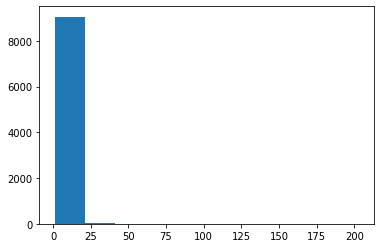

Transcriptions_amount  Videos_amount
0                       1           6784
1                       2           1255
2                       3            336
4                       4            162
3                       5            103
6                       6             87
5                       7             88
8                       8             64
10                      9             41
15                     10             26
16                     11             22
21                     12             12
9                      13             19
12                     14             16
7                      15              9
14                     16              5
20                     17              4
13                     18              6
31                     19              4
26                     20              3
25                     21              6
24                     22              5
27                     23              3
22                     24              5
28                     25              4
34                     26              1
19                     27              2
11                     28              4
33                     29              2
23                     30              1
37                     31              1
38                     32              1
30                     35              1
17                     39              1
32                     41              1
36                     43              1
18                     71              1
29                     75              1
35                    203              1

In [124]:
from matplotlib import pyplot as plt
from collections import Counter
import pandas as pd


histogram_prep=[len(videos[i]) for i in videos.keys()]
histogram_prep
c = Counter(histogram_prep)
plt.hist(histogram_prep)
plt.show() 
df = pd.DataFrame(c.items(), columns=['Transcriptions_amount', 'Videos_amount']).sort_values("Transcriptions_amount")
display(df)

# Hours one transcription 

In [1]:
import json
with open("wikimedia.json" , 'r') as file:
        previous_json = json.load(file)

with open("correspondence.json" , 'r') as file:
        videos = json.load(file)

In [5]:
import re

def split_with_last_dot(string):
    for character in range(len(string)-1,0,-1):
        if string[character]==".":
            left = string[:character]
            right = string[character+1:]
            return [left,right]
        
one_transcription = []
lang_one_transcription = {}
for video in videos.keys():
    #if len(videos[video])==1:
    one_transcription.append(videos[video][0])
    x,_ = split_with_last_dot(videos[video][0])
    _,lang = split_with_last_dot(x)
    if lang not in lang_one_transcription.keys():
        lang_one_transcription[lang] = {"hour":0,
                                       "minutes":0,
                                       "secounds":0}
one_transcription=set(one_transcription)
        
hour = 0
minutes = 0
secounds = 0
no_text = []

for register in range(len(previous_json)):
    if previous_json[register]["page"]["title"] in one_transcription:
        try:
            x,_ = split_with_last_dot(previous_json[register]["page"]["title"])
            _,y = split_with_last_dot(x)
            time = re.findall("(?:([01]?\d|2[0-3]):([0-5]?\d):)?([0-5]?\d)", previous_json[register]["text"])
            for i in reversed(time):
                if i[0]!="" and i[1]!="" and i[2]!="":
                    lang_one_transcription[y]["hour"]=lang_one_transcription[y]["hour"]+int(i[0])
                    lang_one_transcription[y]["minutes"]=lang_one_transcription[y]["minutes"]+int(i[1])
                    lang_one_transcription[y]["secounds"]=lang_one_transcription[y]["secounds"]+int(i[2])
                    #hour += int(i[0])
                    #minutes += int(i[1])
                    #secounds += int(i[2])
                    break
        except:
            no_text.append(register)
            
for i in lang_one_transcription.keys():
    temp_minutes = lang_one_transcription[i]["minutes"] + lang_one_transcription[i]["secounds"]//60
    reformated_secounds = lang_one_transcription[i]["secounds"]%60
    reformated_hour = lang_one_transcription[i]["hour"] + temp_minutes//60
    reformated_minutes = lang_one_transcription[i]["minutes"] % 60
    
    lang_one_transcription[i]["minutes"]=reformated_minutes
    lang_one_transcription[i]["secounds"]=reformated_secounds
    lang_one_transcription[i]["hour"]=reformated_hour

In [6]:
lang_one_transcription

{'en': {'hour': 1995, 'minutes': 42, 'secounds': 59},
 'fr': {'hour': 17, 'minutes': 31, 'secounds': 24},
 'ar': {'hour': 23, 'minutes': 7, 'secounds': 24},
 'it': {'hour': 4, 'minutes': 10, 'secounds': 36},
 'nn': {'hour': 0, 'minutes': 28, 'secounds': 48},
 'hu': {'hour': 1, 'minutes': 38, 'secounds': 36},
 'ru': {'hour': 20, 'minutes': 2, 'secounds': 26},
 'ro': {'hour': 0, 'minutes': 7, 'secounds': 51},
 'de': {'hour': 61, 'minutes': 40, 'secounds': 54},
 'es': {'hour': 26, 'minutes': 27, 'secounds': 0},
 'pt': {'hour': 2, 'minutes': 16, 'secounds': 22},
 'hr': {'hour': 0, 'minutes': 6, 'secounds': 42},
 'undefined': {'hour': 0, 'minutes': 11, 'secounds': 41},
 'sv': {'hour': 3, 'minutes': 17, 'secounds': 42},
 'zh-hant': {'hour': 0, 'minutes': 28, 'secounds': 40},
 'pl': {'hour': 9, 'minutes': 56, 'secounds': 42},
 'is': {'hour': 0, 'minutes': 11, 'secounds': 5},
 'la': {'hour': 1, 'minutes': 16, 'secounds': 32},
 'pt-br': {'hour': 22, 'minutes': 25, 'secounds': 29},
 'ea': {'hour

In [22]:
#Este es uno
import pandas as pd
df = pd.DataFrame.from_dict(lang_one_transcription, orient="index").sort_values(["hour","minutes","secounds"],ascending=False).head(20)
df

hour  minutes  secounds
en      1995       42        59
de        61       40        54
nl        29        6        25
es        26       27         0
ar        23        7        24
pt-br     22       25        29
hi        20       22        31
ru        20        2        26
fr        17       31        24
pl         9       56        42
nb         7       16        15
it         4       10        36
eo         3       36        56
sv         3       17        42
pt         2       16        22
bn         2        6        47
nl-be      1       59        10
zh-cn      1       57        44
sk         1       49        14
es-419     1       44        46

In [12]:
df.sum(axis =0)

hour        2247
minutes      568
secounds     646
dtype: int64

In [18]:
678%60

18

In [131]:
temp_minutes = minutes + secounds//60
reformated_secounds = secounds%60
reformated_hour = hour + temp_minutes//60
reformated_minuts = minutes % 60

{'en': {'hour': 450, 'minutes': 55977, 'secounds': 136212},
 'it': {'hour': 0, 'minutes': 75, 'secounds': 649},
 'id': {'hour': 0, 'minutes': 21, 'secounds': 352},
 'ceb': {'hour': 0, 'minutes': 2, 'secounds': 17},
 'nap': {'hour': 0, 'minutes': 4, 'secounds': 43},
 'nl': {'hour': 0, 'minutes': 1293, 'secounds': 6035},
 'my': {'hour': 0, 'minutes': 6, 'secounds': 33},
 'en-gb': {'hour': 0, 'minutes': 67, 'secounds': 362},
 'fr': {'hour': 1, 'minutes': 259, 'secounds': 1818},
 'ja': {'hour': 0, 'minutes': 37, 'secounds': 610},
 'pl': {'hour': 1, 'minutes': 340, 'secounds': 919},
 'pt-pt': {'hour': 0, 'minutes': 7, 'secounds': 26},
 'sv': {'hour': 0, 'minutes': 133, 'secounds': 1279},
 'eo': {'hour': 0, 'minutes': 96, 'secounds': 1199},
 'ru': {'hour': 1, 'minutes': 116, 'secounds': 5686},
 'pt': {'hour': 0, 'minutes': 94, 'secounds': 578},
 'de': {'hour': 17, 'minutes': 1212, 'secounds': 10148},
 'eu': {'hour': 0, 'minutes': 20, 'secounds': 122},
 'ar': {'hour': 1, 'minutes': 1113, 'sec

In [106]:
previous_json

[{'id': 96449667,
  'timestamp': '2013-05-18T13:43:46Z',
  'user': {'id': 2010648, 'text': 'TsamiW'},
  'page': {'id': 8368107,
   'title': 'Yochai Benkler - On Autonomy, Control and Cultural Experience.ogg.en.srt',
   'namespace': 102,
   'restrictions': []},
  'minor': False,
  'text': '0\n00:00:00,000 --> 00:00:05,000\nInterview with [[w:Yochai Benkler|Yochai Benkler]]\n\n1\n00:00:06,080 --> 00:00:08,040\nWhen I say user autonomy, what I\'m talking about,\n\n2\n00:00:08,040 --> 00:00:15,920\nis at the simplest level the ability \nof people to do more for themselves,\n\n3\n00:00:15,920 --> 00:00:19,920\nby themselves, \nwithout having to ask anyone\'s permission\n\n4\n00:00:19,920 --> 00:00:27,800\nand without having to submit to anyone\'s\n\n5\n00:00:27,800 --> 00:00:29,840\ncontrol over what it is they are doing. \n\n6\n00:00:30,280 --> 00:00:39,480\nWhat happened in the [[w:Industrial_information_economy|industrial \ninformation and cultural economy]]\n\n7\n00:00:39,480 --> 00:00:

In [82]:
print(f"{reformated_hour}:{reformated_minuts}:{reformated_secounds}")

1583:59:41


# Language one transcription

In [87]:
def get_transcription_language(name):
    w,_ = split_with_last_dot(name)
    _,language = split_with_last_dot(w)
    return language

one_transcription_language = []
for i in videos.keys():
    if len(videos[i])==1:
        language = get_transcription_language(videos[i][0])
        one_transcription_language.append(language)
        

In [103]:
c_1 = Counter(one_transcription_language)
df_1 = pd.DataFrame(c_1.items(), columns=['Language', 'Videos_amount']).sort_values("Videos_amount", ascending=False)
display(df_1.head(20))


Language  Videos_amount
0        en           4851
16       de            435
14       ru            225
5        nl            213
18       ar            185
8        fr            115
26       es             98
24    pt-br             82
13       eo             45
12       sv             43
10       pl             40
22       or             35
1        it             26
23       tr             24
21       ko             21
9        ja             21
15       pt             21
29       ca             20
31       hi             13
7     en-gb             12

In [96]:
len(dict(c_1).keys())

110

# Split audios 

In [102]:
!pip install soundfile
from pydub.silence import split_on_silence
import soundfile as sf

data, samplerate = sf.read("loyalty.flac")

audio_chunks = split_on_silence(data, min_silence_len=500, silence_thresh=-40 )


     |████████████████████████████████| 1.2 MB 1.1 MB/s eta 0:00:01


AttributeError: 'numpy.ndarray' object has no attribute 'max_possible_amplitude'

In [104]:
previous_json

[{'id': 96449667,
  'timestamp': '2013-05-18T13:43:46Z',
  'user': {'id': 2010648, 'text': 'TsamiW'},
  'page': {'id': 8368107,
   'title': 'Yochai Benkler - On Autonomy, Control and Cultural Experience.ogg.en.srt',
   'namespace': 102,
   'restrictions': []},
  'minor': False,
  'text': '0\n00:00:00,000 --> 00:00:05,000\nInterview with [[w:Yochai Benkler|Yochai Benkler]]\n\n1\n00:00:06,080 --> 00:00:08,040\nWhen I say user autonomy, what I\'m talking about,\n\n2\n00:00:08,040 --> 00:00:15,920\nis at the simplest level the ability \nof people to do more for themselves,\n\n3\n00:00:15,920 --> 00:00:19,920\nby themselves, \nwithout having to ask anyone\'s permission\n\n4\n00:00:19,920 --> 00:00:27,800\nand without having to submit to anyone\'s\n\n5\n00:00:27,800 --> 00:00:29,840\ncontrol over what it is they are doing. \n\n6\n00:00:30,280 --> 00:00:39,480\nWhat happened in the [[w:Industrial_information_economy|industrial \ninformation and cultural economy]]\n\n7\n00:00:39,480 --> 00:00: